In [10]:
import pandas as pd
import read_msalign

a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/ABBA100_ms2.msalign")

pairs = []
for spec in a_spec_list:
    pairs.append(frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)))

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessA[pair] = spec.header.spec_scan

a_spec_dict = {}
for spec in a_spec_list:
    a_spec_dict[str(spec.header.spec_scan)] = spec

for pair in pairs:
    spec = a_spec_dict[str(accessA[pair])]
    title = int(spec.header.title) % 100000
    spec.header.title = str(spec.header.spec_scan % 100000)
    spec.header.spec_scan = title
    spec.header.spec_id = title
    pre_mz_list = spec.header.pre_mz_list
    pre_charge_list = spec.header.pre_charge_list
    pre_mass_list = spec.header.pre_mass_list
    pre_inte_list = spec.header.pre_inte_list
    pre_id_list = spec.header.pre_id_list

    pre_mz_list[0], pre_mz_list[1] = pre_mz_list[1], pre_mz_list[0]
    pre_charge_list[0], pre_charge_list[1] = pre_charge_list[1], pre_charge_list[0]
    pre_mass_list[0], pre_mass_list[1] = pre_mass_list[1], pre_mass_list[0]
    pre_inte_list[0], pre_inte_list[1] = pre_inte_list[1], pre_inte_list[0]
    pre_id_list[0], pre_id_list[1] = pre_id_list[1], pre_id_list[0]

    spec.header.pre_mz_list = pre_mz_list
    spec.header.pre_charge_list = pre_charge_list
    spec.header.pre_mass_list = pre_mass_list
    spec.header.pre_inte_list = pre_inte_list
    spec.header.pre_id_list = pre_id_list

output_spec_list = read_msalign.sortScans(a_spec_list)

read_msalign.write_spec_file("fixed_ms2.msalign", output_spec_list)


In [29]:
import pandas as pd
import read_msalign

a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/A_ms2.msalign")

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result.tsv", delimiter="\t")

pairs = []
for spec in a_spec_list:
    pairs.append(frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)))

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessA[pair] = spec.header.spec_scan

fulltable = result.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])

import json
import random

random.seed(0)

fulllist = fulltable.get_group(("A", "B", "B", "A"))["Pair"].to_list()

dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_html/toppic_prsm_cutoff/data_js/prsms/prsm"

reference = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")

a_spec_dict = {}
for spec in a_spec_list:
    a_spec_dict[int(spec.header.spec_scan)] = spec

percentage = 1.0

outputList = []

for pair in fulllist:
    spec = a_spec_dict[accessA[eval(pair)]]
    curr_peak_list = spec.peak_list
    currecscore = 1
    for idx in range(0, len(curr_peak_list)):
        if currecscore >= curr_peak_list[idx].ecscore:
            currecscore = curr_peak_list[idx].ecscore
        else:
            break
    a_peaks = curr_peak_list[0:idx]
    b_peaks = curr_peak_list[idx:]
    if (len(a_spec_list) == len(curr_peak_list)):
        print("wtf something is wrong and scan is " + spec.header.spec_scan)

    prsmID = reference[reference["Scan(s)"] == int(spec.header.title)].iloc[0]["Prsm ID"]
    b_matched = []
    b_non_matched = []
    with open(dir + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        b_peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        for idx in range(0, len(b_peak_list)):
            if "matched_ions" in b_peak_list[idx]:
                b_matched.append(idx)
            else:
                b_non_matched.append(idx)

    b_random_idx = sorted(random.sample(b_matched, int(len(b_matched) * (1 - percentage))) + random.sample(b_non_matched, int(len(b_non_matched) * (1 - percentage))))

    for idx in b_random_idx:
        a_peaks.append(b_peaks[idx])

    spec.peak_list = a_peaks

    outputList.append(spec)

read_msalign.write_spec_file("ABBA" + str(int(percentage*100)) + "_ms2.msalign", a_spec_list)

1906
128


<Axes: >

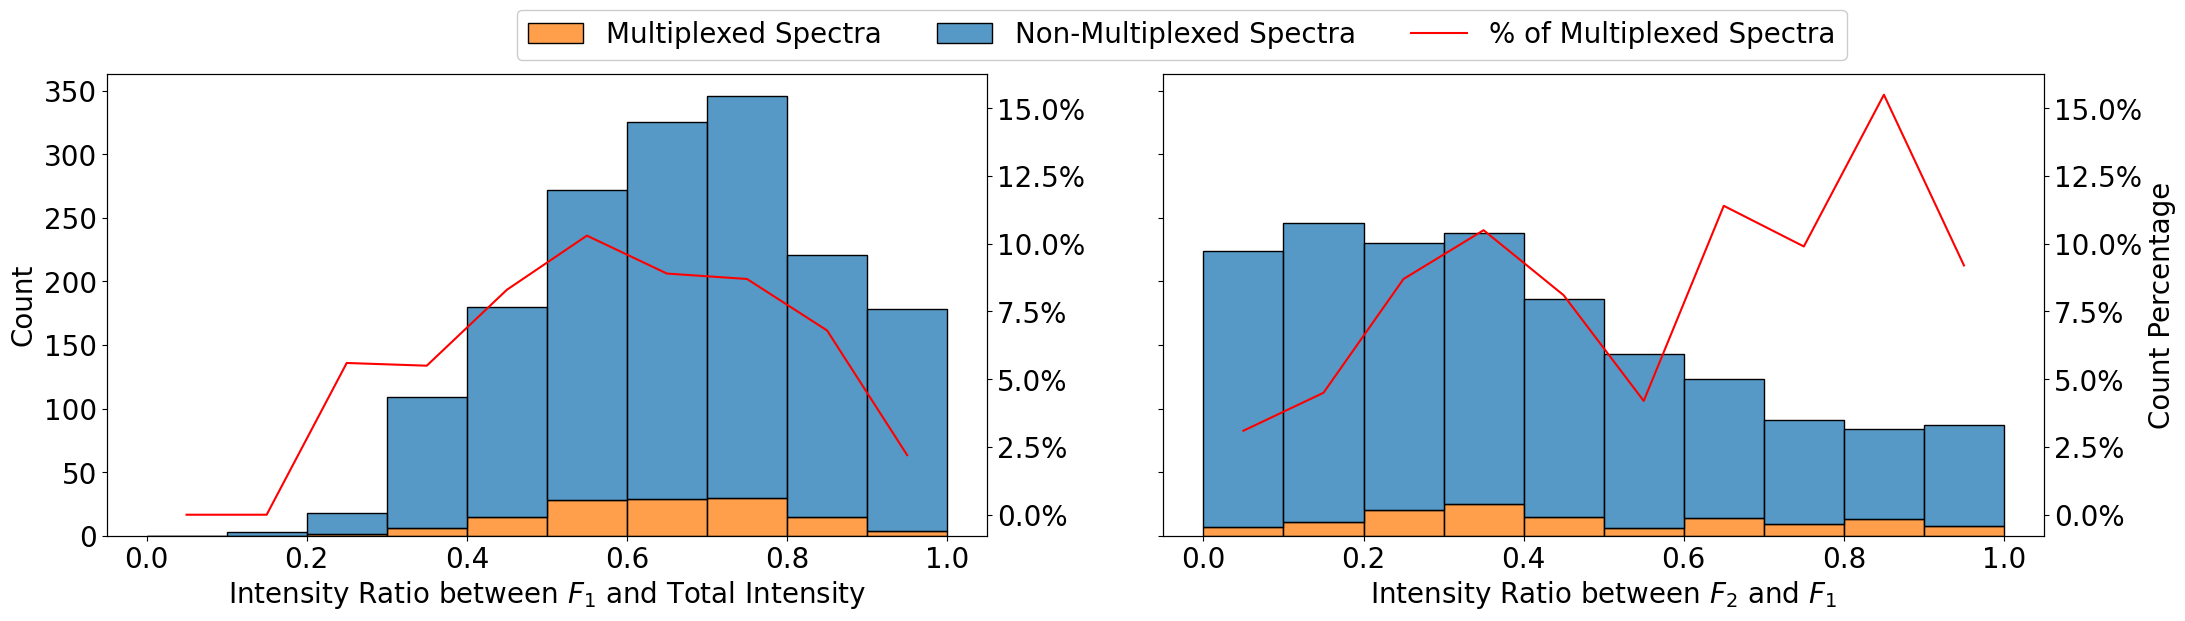

In [18]:
import read_msalign
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2.msalign")

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Multiplex/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")

temp = r1.merge(r2, how="outer", on=["Scan(s)"])
print(temp.shape[0])
merge = r1.merge(r2, how="inner", on=["Scan(s)"])
print(merge.shape[0])

fig, (ax0, ax2) = plt.subplots(1, 2, figsize=(25, 6), sharex=True, sharey=True)

r1scanlist = r1["Scan(s)"].tolist()
r2scanlist = r2["Scan(s)"].tolist()
mergescanlist = merge["Scan(s)"].tolist()
#or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0)
intensity_percent = []
merged_percent = []
for spec in spec_list:
    if spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0):
        continue
    if not ((spec.header.spec_scan in r1scanlist or spec.header.spec_scan in r2scanlist)):
        continue
    total = sum(map(float, spec.header.pre_inte_list))
    if spec.header.spec_scan in mergescanlist:
        merged_percent.append(float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]))
    else:
        intensity_percent.append(float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]) )

df = pd.DataFrame(columns=["Intensity Ratio between $F_2$ and $F_1$", "Type of Spectra"])
for num in intensity_percent:
    df.loc[len(df)] = [num, "Spectra with at least 2 Features"]

for num in merged_percent:
    df.loc[len(df)] = [num, "Multiplexed Spectra"]

plt.rcParams.update({'font.size': 20})

ax1 = ax0.twinx()
ax3 = ax2.twinx()

# share the secondary axes
ax1.sharey(ax3)
sns.histplot(data=df, x="Intensity Ratio between $F_2$ and $F_1$", hue="Type of Spectra", multiple="stack", stat="count", binwidth=0.1, binrange=(0, 1), label="435", legend=False, ax=ax2)

labels = [int(v) if v else 0 for v in ax2.containers[0].datavalues]
labelsnon = [int(v) if v else 0 for v in ax2.containers[1].datavalues]
total = [sum(x) for x in zip(labels, labelsnon)]
result = [round((x / y) * 100, 1) if not y == 0 else 0 for x,y in zip(labels, total)]

sns.lineplot(x=[x / 100.0 + 0.05 for x in range(0, 100, 10)], y=result, ax=ax3, color="red", label="% of Multiplexed Spectra", legend=False)

ax3.yaxis.set_major_formatter(mtick.PercentFormatter())

ax3.set_ylabel("Count Percentage")


handles1, labels1 = ax2.get_legend_handles_labels()
handles2, labels2 = ax3.get_legend_handles_labels()
labels1 = ["Multiplexed Spectra", "Non-Multiplexed Spectra"]
ax2.legend(handles1+handles2, 
           [text for text in labels1+labels2], 
           loc='lower left', fancybox=True, framealpha=1, bbox_to_anchor=(-0.75, 1), ncol = 3)


intensity_percent = []
merged_percent = []
for spec in spec_list:
    if spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0):
        continue
    if not ((spec.header.spec_scan in r1scanlist or spec.header.spec_scan in r2scanlist)):
        continue
    total = sum(map(float, spec.header.pre_inte_list))
    if spec.header.spec_scan in mergescanlist:
        merged_percent.append(float(spec.header.pre_inte_list[0]) / total)
    else:
        intensity_percent.append(float(spec.header.pre_inte_list[0]) / total )

df = pd.DataFrame(columns=["Intensity Ratio between $F_1$ and Total Intensity", "Type of Spectra"])
for num in intensity_percent:
    df.loc[len(df)] = [num, "Spectra with at least 2 Features"]

for num in merged_percent:
    df.loc[len(df)] = [num, "Multiplexed Spectra"]

sns.histplot(data=df, x="Intensity Ratio between $F_1$ and Total Intensity", hue="Type of Spectra", multiple="stack", stat="count", binwidth=0.1, binrange=(0, 1), label="435", legend=False, ax=ax0)

labels = [int(v) if v else 0 for v in ax0.containers[0].datavalues]
labelsnon = [int(v) if v else 0 for v in ax0.containers[1].datavalues]
total = [sum(x) for x in zip(labels, labelsnon)]
result = [round((x / y) * 100, 1) if not y == 0 else 0 for x,y in zip(labels, total)]

sns.lineplot(x=[x / 100.0 + 0.05 for x in range(0, 100, 10)], y=result, ax=ax1, color="red", label="% of Multiplexed", legend=False)

In [21]:
import pandas as pd

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation4/FDR_No_Limit/remove_ions_new/Result.tsv", delimiter="\t", index_col=0)

df.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"]).count()

Pair  A+B_1 peaks  A+B_1 E-value  A+B_2 peaks  \
A+B_1 A+B_2 B+A_1 B+A_2                                                  
-     B     B     -         2            2              2            2   
                  A        11           11             11           11   
                  C         1            1              1            1   
A     -     -     A         3            3              3            3   
            A     A         7            7              7            7   
            B     A         2            2              2            2   
            C     A         1            1              1            1   
      B     -     A         2            2              2            2   
            A     -         8            8              8            8   
                  A        86           86             86           86   
                  C         3            3              3            3   
            B     -         2            2              2            2   
                  A      1036         1036           1036         1036   
            C     A         3            3              3            3   
      C     -     A         1            1              1            1   
            A     A         1            1              1            1   
B     -     B     -         2            2              2            2   
                  A         6            6              6            6   
                  C         1            1              1            1   
      A     B     A         2            2              2            2   
      B     B     -         9            9              9            9   
                  A       120          120            120          120   
                  C         4            4              4            4   
      C     B     A         4            4              4            4   
C     B     B     A         4            4              4            4   
                  C         2            2              2            2   

                         A+B_2 E-value  B+A_1 peaks  B+A_1 E-value  \
A+B_1 A+B_2 B+A_1 B+A_2                                              
-     B     B     -                  2            2              2   
                  A                 11           11             11   
                  C                  1            1              1   
A     -     -     A                  3            3              3   
            A     A                  7            7              7   
            B     A                  2            2              2   
            C     A                  1            1              1   
      B     -     A                  2            2              2   
            A     -                  8            8              8   
                  A                 86           86             86   
                  C                  3            3              3   
            B     -                  2            2              2   
                  A               1036         1036           1036   
            C     A                  3            3              3   
      C     -     A                  1            1              1   
            A     A                  1            1              1   
B     -     B     -                  2            2              2   
                  A                  6            6              6   
                  C                  1            1              1   
      A     B     A                  2            2              2   
      B     B     -                  9            9              9   
                  A                120          120            120   
                  C                  4            4              4   
      C     B     A                  4            4              4   
C     B     B     A                  4            4              4   
                  C                  2            2           

In [119]:
import pandas as pd
import csv
import copy

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result_1Peaks.tsv", delimiter="\t")

with open("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result_1Peaks.tsv") as f:
    prsmspeaks = [{k: v for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace=True, delimiter="\t")]
    
prsmsvalue = copy.deepcopy(prsmspeaks)

prsmcombined = copy.deepcopy(prsmspeaks)

In [109]:
#P1 and P2
query = df[(df["A+B_1"] == "B") & (df["A+B_2"] == "B") & (df["B+A_1"] == "B") & (df["B+A_2"] == "A")]

query["#matched peaks"] = query["A+B_1 peaks"] >= query["A+B_2 peaks"]

query["E-value"] = query["A+B_1 E-value"] <= query["A+B_2 E-value"]

query["Difference"] = ~(query["#matched peaks"] == query["E-value"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Difference"]].shape[0])

21 60
17 64
12


/tmp/ipykernel_33159/3165887939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["A+B_1 peaks"] >= query["A+B_2 peaks"]
/tmp/ipykernel_33159/3165887939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["A+B_1 E-value"] <= query["A+B_2 E-value"]
/tmp/ipykernel_33159/3165887939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [110]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_2"] = "-"
    prsmspeaks[idx]["A+B_2 peaks"] = 0
    prsmspeaks[idx]["A+B_2 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_1"] = "-"
    prsmspeaks[idx]["A+B_1 peaks"] = 0
    prsmspeaks[idx]["A+B_1 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_2"] = "-"
    prsmsvalue[idx]["A+B_2 peaks"] = 0
    prsmsvalue[idx]["A+B_2 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_1"] = "-"
    prsmsvalue[idx]["A+B_1 peaks"] = 0
    prsmsvalue[idx]["A+B_1 E-value"] = 1

In [105]:
#P3 and P4
query = df[(df["A+B_1"] == "A") & (df["A+B_2"] == "B") & (df["B+A_1"] == "A") & (df["B+A_2"] == "A")]

query["#matched peaks"] = query["B+A_1 peaks"] >= query["B+A_2 peaks"]

query["E-value"] = query["B+A_1 E-value"] <= query["B+A_2 E-value"]

query["Difference"] = ~(query["#matched peaks"] == query["E-value"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Difference"]].shape[0])

26 58
22 62
10


/tmp/ipykernel_33159/2239245553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["B+A_1 peaks"] >= query["B+A_2 peaks"]
/tmp/ipykernel_33159/2239245553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["B+A_1 E-value"] <= query["B+A_2 E-value"]
/tmp/ipykernel_33159/2239245553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [106]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_2"] = "-"
    prsmspeaks[idx]["B+A_2 peaks"] = 0
    prsmspeaks[idx]["B+A_2 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_1"] = "-"
    prsmspeaks[idx]["B+A_1 peaks"] = 0
    prsmspeaks[idx]["B+A_1 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_2"] = "-"
    prsmsvalue[idx]["B+A_2 peaks"] = 0
    prsmsvalue[idx]["B+A_2 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_1"] = "-"
    prsmsvalue[idx]["B+A_1 peaks"] = 0
    prsmsvalue[idx]["B+A_1 E-value"] = 1

In [126]:
#P1 and P4
query = df[(df["A+B_1"] == "B") & (df["A+B_2"] == "-") & (df["B+A_1"] == "B") & (df["B+A_2"] == "A")]

query["#matched peaks"] = query["A+B_1 peaks"] >= query["B+A_2 peaks"]

query["E-value"] = query["A+B_1 E-value"] <= query["B+A_2 E-value"]

query["Combined"] = (query["A+B_1 peaks"] + query["A+B_2 peaks"]) >= (query["B+A_1 peaks"] + query["B+A_2 peaks"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Combined"]].shape[0], query[~query["Combined"]].shape[0])

40 0
35 5
0 40


/tmp/ipykernel_33159/1887306537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["A+B_1 peaks"] >= query["B+A_2 peaks"]
/tmp/ipykernel_33159/1887306537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["A+B_1 E-value"] <= query["B+A_2 E-value"]
/tmp/ipykernel_33159/1887306537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [127]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_2"] = "-"
    prsmspeaks[idx]["B+A_2 peaks"] = 0
    prsmspeaks[idx]["B+A_2 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_1"] = "-"
    prsmspeaks[idx]["A+B_1 peaks"] = 0
    prsmspeaks[idx]["A+B_1 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_2"] = "-"
    prsmsvalue[idx]["B+A_2 peaks"] = 0
    prsmsvalue[idx]["B+A_2 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_1"] = "-"
    prsmsvalue[idx]["A+B_1 peaks"] = 0
    prsmsvalue[idx]["A+B_1 E-value"] = 1

In [134]:
#P2 and P3
query = df[(df["A+B_1"] == "A") & (df["A+B_2"] == "B") & (df["B+A_1"] == "A") & (df["B+A_2"] == "-")]

query["#matched peaks"] = query["A+B_2 peaks"] >= query["B+A_1 peaks"]

query["E-value"] = query["A+B_2 E-value"] <= query["B+A_1 E-value"]

query["Combined"] = (query["A+B_1 peaks"] + query["A+B_2 peaks"]) >= (query["B+A_1 peaks"] + query["B+A_2 peaks"])

print(query[query["#matched peaks"]].shape[0], query[~query["#matched peaks"]].shape[0])

print(query[query["E-value"]].shape[0], query[~query["E-value"]].shape[0])

print(query[query["Combined"]].shape[0], query[~query["Combined"]].shape[0])

1 58
9 50
59 0


/tmp/ipykernel_33159/827121865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["#matched peaks"] = query["A+B_2 peaks"] >= query["B+A_1 peaks"]
/tmp/ipykernel_33159/827121865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query["E-value"] = query["A+B_2 E-value"] <= query["B+A_1 E-value"]
/tmp/ipykernel_33159/827121865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [135]:
for idx in query[query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["B+A_1"] = "-"
    prsmspeaks[idx]["B+A_1 peaks"] = 0
    prsmspeaks[idx]["B+A_1 E-value"] = 1

for idx in query[~query["#matched peaks"]].index.tolist():
    prsmspeaks[idx]["A+B_2"] = "-"
    prsmspeaks[idx]["A+B_2 peaks"] = 0
    prsmspeaks[idx]["A+B_2 E-value"] = 1

for idx in query[query["E-value"]].index.tolist():
    prsmsvalue[idx]["B+A_1"] = "-"
    prsmsvalue[idx]["B+A_1 peaks"] = 0
    prsmsvalue[idx]["B+A_1 E-value"] = 1

for idx in query[~query["E-value"]].index.tolist():
    prsmsvalue[idx]["A+B_2"] = "-"
    prsmsvalue[idx]["A+B_2 peaks"] = 0
    prsmsvalue[idx]["A+B_2 E-value"] = 1

In [136]:
outputdf_peaks = pd.DataFrame(prsmspeaks)
outputdf_values = pd.DataFrame(prsmsvalue)
outputdf_combined = pd.DataFrame(prsmcombined)

outputdf_peaks.to_csv("Result_1Peaks_2Peaks.tsv", sep="\t")
outputdf_values.to_csv("Result_1Peaks_2Value.tsv", sep="\t")
outputdf_combined.to_csv("Result_1Peaks_2Combined.tsv", sep="\t")

In [129]:
import pandas as pd
import read_msalign

intputfileA = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/ABBA_ms2_toppic_prsm_single.tsv"
intputfileAB = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/AB_ms2_toppic_prsm_single.tsv"
intputfileB = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/B_ms2_toppic_prsm.tsv"
intputfileBA = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/BA_ms2_toppic_prsm.tsv"


a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/A_ms2.msalign")

b_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/B_ms2.msalign")

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/Result.tsv", delimiter="\t")

pairs = []
for spec in a_spec_list:
    pairs.append(frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)))

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessA[pair] = spec.header.spec_scan

accessB = {}
for pair in pairs:
    for spec in b_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == pair:
            accessB[pair] = spec.header.spec_scan

fulltable = result.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])

fulllist = fulltable.get_group(("A", "B", "B", "A"))["Pair"].to_list()

a_scans = []
for pair in fulllist:
    a_scans.append(accessA[eval(pair)])

b_scans = []
for pair in fulllist:
    b_scans.append(accessB[eval(pair)])


file = pd.read_csv(intputfileA, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(a_scans)]
outputfile.to_csv(intputfileA, sep="\t")

file = pd.read_csv(intputfileAB, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(a_scans)]
outputfile.to_csv(intputfileAB, sep="\t")

file = pd.read_csv(intputfileB, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(b_scans)]
outputfile.to_csv(intputfileB, sep="\t")

file = pd.read_csv(intputfileBA, delimiter="\t")

outputfile = file[file["Scan(s)"].isin(b_scans)]
outputfile.to_csv(intputfileBA, sep="\t")

<Figure size 1000x600 with 0 Axes>

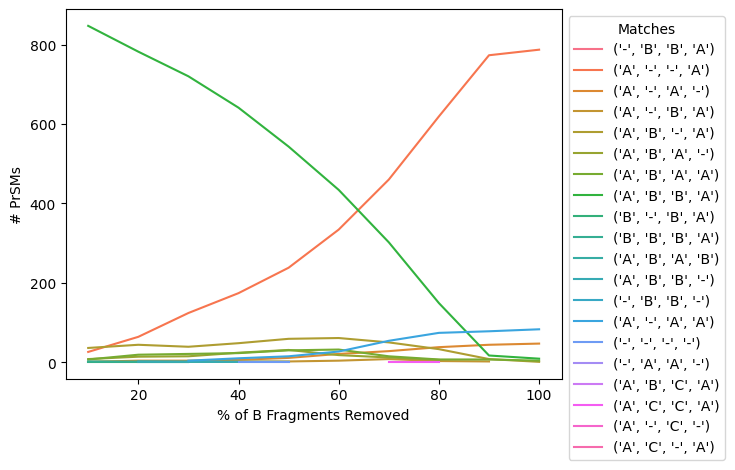

<Figure size 1000x600 with 0 Axes>

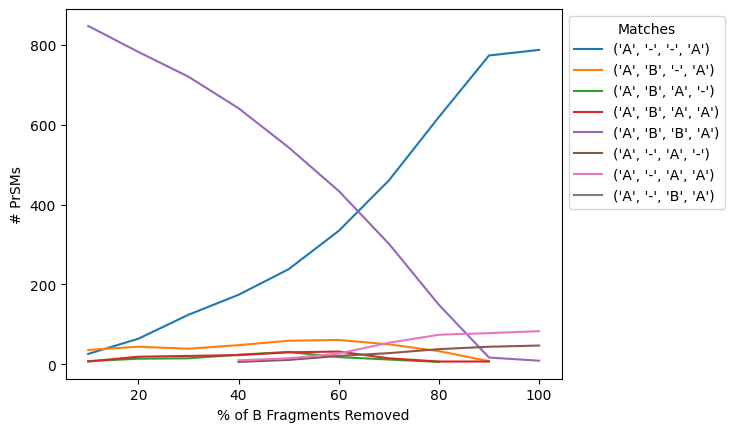

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/10%/Result.tsv", delimiter="\t")
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/20%/Result.tsv", delimiter="\t")
r3 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/30%/Result.tsv", delimiter="\t")
r4 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/40%/Result.tsv", delimiter="\t")
r5 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/50%/Result.tsv", delimiter="\t")
r6 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/60%/Result.tsv", delimiter="\t")
r7 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/70%/Result.tsv", delimiter="\t")
r8 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/80%/Result.tsv", delimiter="\t")
r9 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/90%/Result.tsv", delimiter="\t")
r10 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation3/noisetest/ABBA/100%/Result.tsv", delimiter="\t")

df = pd.DataFrame(columns=["Matches", "% of B Fragments Removed", "# PrSMs"])

r1 = r1.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r1.groups.keys():
    df.loc[len(df)] = [key,10,len(r1.get_group(key))]

r2 = r2.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r2.groups.keys():
    df.loc[len(df)] = [key,20,len(r2.get_group(key))]

r3 = r3.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r3.groups.keys():
    df.loc[len(df)] = [key,30,len(r3.get_group(key))]

r4 = r4.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r4.groups.keys():
    df.loc[len(df)] = [key,40,len(r4.get_group(key))]

r5 = r5.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r5.groups.keys():
    df.loc[len(df)] = [key,50,len(r5.get_group(key))]

r6 = r6.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r6.groups.keys():
    df.loc[len(df)] = [key,60,len(r6.get_group(key))]

r7 = r7.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r7.groups.keys():
    df.loc[len(df)] = [key,70,len(r7.get_group(key))]

r8 = r8.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r8.groups.keys():
    df.loc[len(df)] = [key,80,len(r8.get_group(key))]

r9 = r9.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r9.groups.keys():
    df.loc[len(df)] = [key,90,len(r9.get_group(key))]

r10 = r10.groupby(by=["A+B_1", "A+B_2", "B+A_1", "B+A_2"])
for key in r10.groups.keys():
    df.loc[len(df)] = [key,100,len(r10.get_group(key))]

new_df = df[df['# PrSMs'] >= 5]


plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
sns.lineplot(data=df, x="% of B Fragments Removed", y="# PrSMs", hue="Matches")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
sns.lineplot(data=new_df, x="% of B Fragments Removed", y="# PrSMs", hue="Matches")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [161]:
r1 = []
r1a = []
r1b = []

r1g0 = []
r1ag0 = []
r1bg0 = []

r1g1 = []
r1ag1 = []
r1bg1 = []

r1g2 = []
r1ag2 = []
r1bg2 = []

r1g3 = []
r1ag3 = []
r1bg3 = []

r2 = []
r2a = []
r2b = []

r2g0 = []
r2ag0 = []
r2bg0 = []

r2g1 = []
r2ag1 = []
r2bg1 = []

r2g2 = []
r2ag2 = []
r2bg2 = []

r2g3 = []
r2ag3 = []
r2bg3 = []

g0size = 0
g1size = 0
g2size = 0
g3size = 0

In [63]:
import sys
import pandas as pd
import read_msalign

verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/"

result = pd.read_csv(dir + "resolved_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

spec_list = read_msalign.read_spec_file(dir + "resolved_ms2.msalign")

spec_dict = {}
for spec in spec_list:
    spec_dict[str(spec.header.spec_scan)] = spec

for index, row in result.iterrows():
    result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)

verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications"]], left_on='Scan(s)', right_on="Scan(s)", how='left', suffixes=("", "_True"))

joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Other"))

joined["Verified_ProteinCorrect"] = (joined["Protein accession"] == joined["Protein accession_True"])

joined["Verified_ProteinOther"] = (joined["Protein accession"] == joined["Protein accession_Other"])

joined["proteoform_ppm"] = joined["Proteoform mass"] * 10 / 1e6
joined.loc[joined["proteoform_ppm"] < 0.01] = 0.01

joined["Verified_ProteoformCorrect"] = (joined["Verified_ProteinCorrect"] == True) & (abs(joined["Proteoform mass"] - joined["Proteoform mass_True"]) < joined["proteoform_ppm"])

joined["Verified_ProteoformOther"] = (joined["Verified_ProteinOther"] == True) & (abs(joined["Proteoform mass"] - joined["Proteoform mass_Other"]) < joined["proteoform_ppm"])


joined["Group"] = ""

joined.loc[(joined["#unexpected modifications_True"] == 0) & (joined["#unexpected modifications_Other"] == 0), "Group"] = 0
joined.loc[(joined["#unexpected modifications_True"] == 0) & (joined["#unexpected modifications_Other"] == 1), "Group"] = 1
joined.loc[(joined["#unexpected modifications_True"] == 1) & (joined["#unexpected modifications_Other"] == 0), "Group"] = 2
joined.loc[(joined["#unexpected modifications_True"] == 1) & (joined["#unexpected modifications_Other"] == 1), "Group"] = 3

# r1.append(len(finalResult))
# r1a.append(finalResult[finalResult["Verified_ProteinCorrect"] == True].shape[0] / len(finalResult) * 100)
# r1b.append(finalResult[finalResult["Verified_ProteinOther"] == True].shape[0] / len(finalResult) * 100)

# g0 = finalResult[finalResult["Group"] == 0]
# g1 = finalResult[finalResult["Group"] == 1]
# g2 = finalResult[finalResult["Group"] == 2]
# g3 = finalResult[finalResult["Group"] == 3]

# r1g0.append(len(g0))
# r1ag0.append(g0[g0["Verified_ProteinCorrect"] == True].shape[0] / len(g0) * 100)
# r1bg0.append(g0[g0["Verified_ProteinOther"] == True].shape[0] / len(g0) * 100)

# r1g1.append(len(g1))
# r1ag1.append(g1[g1["Verified_ProteinCorrect"] == True].shape[0] / len(g1) * 100)
# r1bg1.append(g1[g1["Verified_ProteinOther"] == True].shape[0] / len(g1) * 100)

# r1g2.append(len(g2))
# r1ag2.append(g2[g2["Verified_ProteinCorrect"] == True].shape[0] / len(g2) * 100)
# r1bg2.append(g2[g2["Verified_ProteinOther"] == True].shape[0] / len(g2) * 100)

# r1g3.append(len(g3))
# r1ag3.append(g3[g3["Verified_ProteinCorrect"] == True].shape[0] / len(g3) * 100)
# r1bg3.append(g3[g3["Verified_ProteinOther"] == True].shape[0] / len(g3) * 100)

# r2.append(len(finalResult[finalResult["Verified_ProteinCorrect"] == True]))
# r2a.append(finalResult[finalResult["Verified_ProteinCorrect"] == True].shape[0] /  * 100)
# r2b.append(finalResult[finalResult["Verified_ProteinOther"] == True].shape[0] / len(finalResult) * 100)

g0 = joined[joined["Group"] == 0]
g1 = joined[joined["Group"] == 1]
g2 = joined[joined["Group"] == 2]
g3 = joined[joined["Group"] == 3]

# g0size = len(g0)
# g1size = len(g1)
# g2size = len(g2)
# g3size = len(g3)

r2g0.append(g0[g0["Verified_ProteinCorrect"] == True].shape[0])
r2ag0.append(g0[g0["Verified_ProteinCorrect"] == True].shape[0] / g0size * 100)
r2bg0.append(g0[g0["Verified_ProteinOther"] == True].shape[0] / g0size * 100)

r2g1.append(g1[g1["Verified_ProteinCorrect"] == True].shape[0])
r2ag1.append(g1[g1["Verified_ProteinCorrect"] == True].shape[0] / g1size * 100)
r2bg1.append(g1[g1["Verified_ProteinOther"] == True].shape[0] / g1size * 100)

r2g2.append(g2[g2["Verified_ProteinCorrect"] == True].shape[0])
r2ag2.append(g2[g2["Verified_ProteinCorrect"] == True].shape[0] / g2size * 100)
r2bg2.append(g2[g2["Verified_ProteinOther"] == True].shape[0] / g2size * 100)

r2g3.append(g3[g3["Verified_ProteinCorrect"] == True].shape[0])
r2ag3.append(g3[g3["Verified_ProteinCorrect"] == True].shape[0] / g3size * 100)
r2bg3.append(g3[g3["Verified_ProteinOther"] == True].shape[0] / g3size * 100)

In [2]:
class EquivalenceObject:
    def __init__(self, string, number):
        self.string = string
        self.number = number

    def __eq__(self, other):
        return self.string == other.string

    def is_within_threshold(self, other, threshold):
        return abs(self.number - other.number) < threshold

class EquivalenceClass:
    def __init__(self, objects=None):
        self.objects = objects or []

    def add(self, obj):
        self.objects.append(obj)

    def union(self, other, threshold):
        union_set = EquivalenceClass(self.objects[:])
        for obj in other.objects:
            if not any(e_obj.is_within_threshold(obj, threshold) for e_obj in self.objects if e_obj == obj):
                union_set.add(obj)
        return union_set

    def subtraction(self, other, threshold):
        sub_set = EquivalenceClass()
        for obj in self.objects:
            if not any(e_obj.is_within_threshold(obj, threshold) for e_obj in other.objects if e_obj == obj):
                sub_set.add(obj)
        return sub_set

    def intersection(self, other, threshold):
        intersect_set = EquivalenceClass()
        for obj in self.objects:
            if any(e_obj.is_within_threshold(obj, threshold) for e_obj in other.objects if e_obj == obj):
                intersect_set.add(obj)
        return intersect_set
    
with open("/home/daniel/Desktop/r1proteoform.txt", 'r') as file:
    r1proteoform = file.read().splitlines()

with open("/home/daniel/Desktop/r1mass.txt", 'r') as file:
    r1mass = file.read().splitlines()

with open("/home/daniel/Desktop/r2proteoform.txt", 'r') as file:
    r2proteoform = file.read().splitlines()

with open("/home/daniel/Desktop/r2mass.txt", 'r') as file:
    r2mass = file.read().splitlines()

# with open("/home/daniel/Desktop/r3proteoform.txt", 'r') as file:
#     r3proteoform = file.read().splitlines()

# with open("/home/daniel/Desktop/r3mass.txt", 'r') as file:
#     r3mass = file.read().splitlines()

set1 = []
set2 = []
# set3 = []
for idx in range(0, len(r1proteoform)):
    set1.append(EquivalenceObject(r1proteoform[idx], float(r1mass[idx])))

for idx in range(0, len(r2proteoform)):
    set2.append(EquivalenceObject(r2proteoform[idx], float(r2mass[idx])))

# for idx in range(0, len(r3proteoform)):
#     set3.append(EquivalenceObject(r3proteoform[idx], float(r3mass[idx])))

class1 = EquivalenceClass(set1)
class2 = EquivalenceClass(set2)
# class3 = EquivalenceClass(set3)

intersect_12 = class1.intersection(class2, 1)

left = class1.subtraction(intersect_12, 1)
right = class2.subtraction(intersect_12, 1)

# intersect_123 = class1.intersection(class2, 1).intersection(class3, 1)
# intersect_12 = class1.intersection(class2, 1)
# intersect_23 = class2.intersection(class3, 1)
# intersect_13 = class1.intersection(class3, 1)
# subtraction_12 = intersect_12.subtraction(intersect_123, 1)
# subtraction_13 = intersect_13.subtraction(intersect_123, 1)
# subtraction_23 = intersect_23.subtraction(intersect_123, 1)

# left1 = class1.subtraction(intersect_123, 1).subtraction(subtraction_12, 1).subtraction(subtraction_13, 1)
# left2 = class2.subtraction(intersect_123, 1).subtraction(subtraction_12, 1).subtraction(subtraction_23, 1)
# left3 = class3.subtraction(intersect_123, 1).subtraction(subtraction_13, 1).subtraction(subtraction_23, 1)

# # Printing results
# print("Intersection Result:")
# print(len(intersect_123.objects))

# print("\nSubtraction 12 Result:")
# print(len(subtraction_12.objects))

# print("\nSubtraction 23 Result:")
# print(len(subtraction_23.objects))

# print("\nSubtraction 13 Result:")
# print(len(subtraction_13.objects))

# print("\nLeft 1 is :")
# print(len(left1.objects))

# print("\nLeft 1 is :")
# print(len(left2.objects))

# print("\nLeft 1 is :")
# print(len(left3.objects))

print("\nIntersect is :")
print(len(intersect_12.objects))

print("\nLeft is :")
print(len(left.objects))

print("\nRight is :")
print(len(right.objects))


Intersect is :
57

Left is :
8

Right is :
87


In [48]:
import pandas as pd

alpha = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/MSDeplex/resolved1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)
beta = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/MSDeplex/resolved2_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

result = alpha.merge(beta, how="inner", on="Scan(s)")

print(len(result))

proteinlist = result["Protein accession_y"].tolist()

masslist = result["Proteoform mass_y"].tolist()

multiplexset = []
for idx in range(0, len(proteinlist)):
    multiplexset.append(EquivalenceObject(proteinlist[idx], float(masslist[idx])))

multiplexclass = EquivalenceClass(multiplexset)

uniqueproteoforms = multiplexclass.intersection(class3, 1)

print(len(uniqueproteoforms.objects))

print(len(uniqueproteoforms.subtraction(class1, 1).objects))

556
268
166


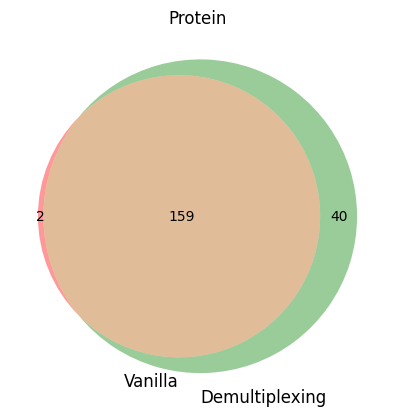

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import itertools

venn2(subsets=(2, 40, 159), set_labels=("Vanilla", "Demultiplexing"))
# venn3(subsets = (0, 0, 13, 162, 0, 11, 100), set_labels = ('TopPIC v1.7.4', 'Old Method (2 Rounds)', "New Method (4 Rounds)"))
plt.title("Protein")

plt.savefig("Protein.png", dpi=300)


In [23]:
import pandas as pd


vanilla = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/SW480/Experiment3/Experiment_3_SW480_04_01_ms2_toppic_proteoform_single.tsv", sep="\t", skiprows=26)
demultiplexing = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/SW480/Experiment3/Experiment_3_SW480_04_01_MSDeplex/Proteoform.csv", sep="\t")


# vanilla.drop_duplicates(subset="Protein accession", inplace=True)
# demultiplexing.drop_duplicates(subset="Protein accession", inplace=True)

# newProtein = demultiplexing[~demultiplexing["Protein accession"].isin(vanilla["Protein accession"])]
vanilla[vanilla["Protein accession"] == "sp|P14866|HNRPL_HUMAN"]
# newProtein.to_csv("NewProtein.csv", sep="\t")

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


newproteins = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/SW480/CRC_SW480_SEC1_RPLC1_MSDeplex/NewProtein.csv", sep="\t")

totalresult = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/SW480/CRC_SW480_SEC1_RPLC1_MSDeplex/Result_resolved.tsv", sep="\t")

newproteins["Round"] = 0

newproteins.loc[0:15, "Round"] = 1

newproteins.loc[15:, "Round"] = 2

df = newproteins.merge(totalresult, how="left", left_on="Scan(s)", right_on="Scan")

df[(df["Round"] == 2) & (df["choice"] == "A") & (df["Protein accession"] == df["A+B_2"]) & (df["A+B_2 E-value"] < 0.1)]

# evalues = []
# for idx, row in df.iterrows():
#     if (row["Round"] == 1) and (row["choice"] == "A"):
#         evalues.append((row["E-value"], row["A+B_1 E-value"]))
#     elif (row["Round"] == 2) and (row["choice"] == "A"):
#         evalues.append((row["E-value"], row["A+B_2 E-value"]))
#     elif (row["Round"] == 1) and (row["choice"] == "B"):
#         evalues.append((row["E-value"], row["B+A_1 E-value"]))
#     elif (row["Round"] == 2) and (row["choice"] == "B"):
#         evalues.append((row["E-value"], row["B+A_1 E-value"]))

# print(evalues)

# x, y = zip(*evalues)

# max_val = max(max(x), max(y))
# min_val = min(min(x), min(y))
# plt.xlim(min_val, max_val)
# plt.ylim(min_val, max_val)

# plt.xscale('log')
# plt.yscale('log')
    
# # Create a scatter plot
# plt.scatter(x, y)

# plt.axhline(y=0.01, color='r', linestyle='-', label='y=0.01')
# plt.axvline(x=0.01, color='r', linestyle='-', label='x=0.01')

# # Adding titles and labels
# plt.title('E-values of the New Proteins')
# plt.xlabel('After Recalculations')
# plt.ylabel('Before Recalculations')
    
#     # Show the plot
# plt.show()

,Unnamed: 0_x,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,...,A+B_2 E-value,B+A_1,B+A_1_mass,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2_mass,B+A_2 peaks,B+A_2 E-value,choice
38,129,/home/daniel/Desktop/datafiles/RealData/SW480/...,121,2705,HCD,2705,2321.32,48,16,10563.52988,...,0.035638,-,0.000000,0,1.000000e+00,sp|P05114|HMGN1_HUMAN,10536.55208,10,1.562275e+00,A
45,139,/home/daniel/Desktop/datafiles/RealData/SW480/...,146,3691,HCD,3691,3150.80,27,3,1854.96930,...,0.000783,sp|P05089|ARGI1_HUMAN,1854.968706,10,7.852941e-04,sp|P05114|HMGN1_HUMAN,10521.55277,13,7.954800e-09,A
48,143,/home/daniel/Desktop/datafiles/RealData/SW480/...,153,4126,HCD,4126,3533.11,36,17,10618.48835,...,0.009342,sp|P05114|HMGN1_HUMAN,10619.560700,18,9.226446e-07,sp|A3KN83|SBNO1_HUMAN,10602.56035,5,6.001209e+01,A
50,147,/home/daniel/Desktop/datafiles/RealData/SW480/...,163,4271,HCD,4271,3650.97,37,3,2427.14631,...,0.000127,sp|O60830|TI17B_HUMAN,2427.149524,10,1.547266e-04,sp|P05114|HMGN1_HUMAN,10521.55277,8,4.232200e-05,A


In [2]:
import read_msalign

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/MSDeplex/A_ms2.msalign")

for spec in spec_list:
    if len(spec.header.pre_mz_list) == 1:
        print(spec.header.spec_scan)

In [2]:
import read_msalign

refernencealign = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2.msalign")

referenceDict = {}
for spec in refernencealign:
    referenceDict[str(spec.header.spec_scan)] = spec



spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/noisetest/dataset2/0/20231215_ecoli_400ng_daniel_1_ms2.msalign")

maxdiff = 0
for spec in spec_list:
    basescan = str(spec.header.spec_scan)
    noisescan = str(spec.header.title)
    massdiff = float(referenceDict[basescan].header.pre_mass_list[0]) - float(referenceDict[noisescan].header.pre_mass_list[0])
    if massdiff > maxdiff:
        maxdiff = massdiff

print(maxdiff)

15936.211970000002


In [4]:
import read_msalign

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Multiplex/A_ms2.msalign")

print(len(spec_list))

10320


In [28]:
import pandas as pd

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Multiplex/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

result = r1.merge(r2, how="outer", on="Scan(s)")

# result[result["Protein accession_x"] != result["Protein accession_y"]]
result


,Data file name_x,Prsm ID_x,Spectrum ID_x,Fragmentation_x,Scan(s),Retention time_x,#peaks_x,Charge_x,Precursor mass_x,Adjusted precursor mass_x,...,#unexpected modifications_y,unexpected modifications_y,#variable PTMs_y,variable PTMs_y,MIScore_y,#matched peaks_y,#matched fragment ions_y,E-value_y,Spectrum-level Q-value_y,Proteoform-level Q-value_y
0,/home/daniel/Desktop/datafiles/RealData/ecoli/...,0.0,1453.0,HCD,1698,1314.73,20.0,2.0,1486.77280,1486.762736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/home/daniel/Desktop/datafiles/RealData/ecoli/...,1.0,1481.0,HCD,1730,1338.75,22.0,3.0,2469.98007,2469.960070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/home/daniel/Desktop/datafiles/RealData/ecoli/...,2.0,1483.0,HCD,1733,1341.64,16.0,3.0,2599.02363,2600.075980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3.0,1501.0,HCD,1754,1357.88,13.0,3.0,2523.13205,2523.114989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/home/daniel/Desktop/datafiles/RealData/ecoli/...,4.0,1513.0,HCD,1768,1369.05,27.0,5.0,3621.94079,3621.915790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,NaN,NaN,NaN,NaN,9378,NaN,NaN,NaN,NaN,NaN,...,1.0,-10.0014:[21-31],0.0,NaN,-,16.0,13.0,0.005334,-,-
1921,NaN,NaN,NaN,NaN,9398,NaN,NaN,NaN,NaN,NaN,...,1.0,-10.0364:[22-31],0.0,NaN,-,12.0,12.0,0.001999,-,-
1922,NaN,NaN,NaN,NaN,9632,NaN,NaN,NaN,NaN,NaN,...,1.0,+15.9990:[4-7],0.0,NaN,-,14.0,13.0,0.000001,-,-
1923,NaN,NaN,NaN,NaN,11617,NaN,NaN,NaN,NaN,NaN,...,1.0,-1.9936:[87],0.0,NaN,-,9.0,9.0,0.001536,-,-


In [67]:
r2bg3

[0.0,
 0.0,
 0.0,
 0.0,
 0.7633587786259541,
 1.5267175572519083,
 3.816793893129771,
 4.580152671755725,
 5.343511450381679,
 6.870229007633588,
 9.923664122137405]

In [18]:
g0size = 0
g1size = 0
g2size = 0
g3size = 0

r2g0 = []
r2ag0 = []
r2bg0 = []

r2g1 = []
r2ag1 = []
r2bg1 = []

r2g2 = []
r2ag2 = []
r2bg2 = []

r2g3 = []
r2ag3 = []
r2bg3 = []

In [31]:
r2bg3

[0.0,
 0.0,
 0.5050505050505051,
 1.0101010101010102,
 1.5151515151515151,
 2.0202020202020203,
 3.535353535353535,
 3.535353535353535,
 4.040404040404041,
 4.545454545454546,
 4.545454545454546]

In [1]:
#Combined Code
g0size = 213
g1size = 213
g2size = 198
g3size = 198

r2g0 = [212, 211, 209, 207, 199, 194, 193, 187, 184, 183, 180]
r2ag0 = [99.53051643192488,
 99.06103286384976,
 98.12206572769952,
 97.1830985915493,
 93.42723004694837,
 91.07981220657277,
 90.61032863849765,
 87.79342723004694,
 86.3849765258216,
 85.91549295774648,
 84.50704225352112]
r2bg0 = [0.0,
 0.0,
 0.0,
 0.4694835680751174,
 1.8779342723004695,
 2.3474178403755865,
 2.8169014084507045,
 4.225352112676056,
 6.572769953051644,
 7.042253521126761,
 7.511737089201878]

r2g1 = [212, 210, 208, 203, 200, 198, 195, 194, 193, 187, 182]
r2ag1 = [99.53051643192488,
 98.59154929577466,
 97.65258215962442,
 95.30516431924883,
 93.89671361502347,
 92.95774647887323,
 91.54929577464789,
 91.07981220657277,
 90.61032863849765,
 87.79342723004694,
 85.44600938967136]
r2bg1 = [0.0,
 0.0,
 0.5050505050505051,
 1.0101010101010102,
 3.0303030303030303,
 3.535353535353535,
 3.535353535353535,
 4.545454545454546,
 9.090909090909092,
 10.606060606060606,
 13.636363636363635]

r2g2 = [198, 190, 177, 172, 168, 161, 153, 146, 133, 127, 117]
r2ag2 = [100.0,
 95.95959595959596,
 89.39393939393939,
 86.86868686868688,
 84.84848484848484,
 81.31313131313132,
 77.27272727272727,
 73.73737373737373,
 67.17171717171718,
 64.14141414141415,
 59.09090909090909]
r2bg2 = [0.0,
 0.0,
 0.5050505050505051,
 1.0101010101010102,
 3.0303030303030303,
 3.535353535353535,
 3.535353535353535,
 4.545454545454546,
 9.090909090909092,
 10.606060606060606,
 13.636363636363635]

r2g3 = [198, 186, 180, 170, 163, 154, 146, 138, 134, 132, 126]
r2ag3 = [100.0,
 93.93939393939394,
 90.9090909090909,
 85.85858585858585,
 82.32323232323232,
 77.77777777777779,
 73.73737373737373,
 69.6969696969697,
 67.67676767676768,
 66.66666666666666,
 63.63636363636363]
r2bg3 = [0.0,
 0.0,
 0.5050505050505051,
 1.0101010101010102,
 1.5151515151515151,
 2.0202020202020203,
 3.535353535353535,
 3.535353535353535,
 4.040404040404041,
 4.545454545454546,
 4.545454545454546]

In [13]:
g0size = 0
g1size = 0
g2size = 0
g3size = 0

r2g0 = []
r2ag0 = []
r2bg0 = []

r2g1 = []
r2ag1 = []
r2bg1 = []

r2g2 = []
r2ag2 = []
r2bg2 = []

r2g3 = []
r2ag3 = []
r2bg3 = []

In [1]:
import pandas as pd
import read_msalign

def getPercentage(noiserate, g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n):
    verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")
    dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/noisetest/"
    result = pd.read_csv(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

    spec_list = read_msalign.read_spec_file(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_ms2.msalign")

    spec_dict = {}
    for spec in spec_list:
        spec_dict[str(spec.header.spec_scan)] = spec

    for index, row in result.iterrows():
        result.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
        result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)

    verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_True"))

    joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Other"))

    joined["Verified_ProteinCorrect"] = (joined["Protein accession"] == joined["Protein accession_True"])

    joined["Verified_ProteinOther"] = (joined["Protein accession"] == joined["Protein accession_Other"])

    joined["Group"] = ""

    joined.loc[(joined["#unexpected modifications_True"] == 0) & (joined["#unexpected modifications_Other"] == 0), "Group"] = 0
    joined.loc[(joined["#unexpected modifications_True"] == 0) & (joined["#unexpected modifications_Other"] == 1), "Group"] = 1
    joined.loc[(joined["#unexpected modifications_True"] == 1) & (joined["#unexpected modifications_Other"] == 0), "Group"] = 2
    joined.loc[(joined["#unexpected modifications_True"] == 1) & (joined["#unexpected modifications_Other"] == 1), "Group"] = 3

    # print(joined[(joined["#unexpected modifications_Other"] == 1)])
    
    a1 = joined[(joined["Group"] == 0) & (joined["Verified_ProteinCorrect"] == True)].shape[0]
    f1 = joined[(joined["Group"] == 0) & (joined["Verified_ProteinOther"] == True)].shape[0]
    o1 = joined[joined["Group"] == 0].shape[0] - a1 - f1
    g1f.append(f1)
    g1o.append(o1)
    g1n.append(g0size - a1 - f1 - o1)

    a2 = joined[(joined["Group"] == 1) & (joined["Verified_ProteinCorrect"] == True)].shape[0]
    f2 = joined[(joined["Group"] == 1) & (joined["Verified_ProteinOther"] == True)].shape[0]
    o2 = joined[joined["Group"] == 1].shape[0] - a2 - f2
    g2f.append(f2)
    g2o.append(o2)
    g2n.append(g1size - a2 - f2 - o2)

    a3 = joined[(joined["Group"] == 2) & (joined["Verified_ProteinCorrect"] == True)].shape[0]
    f3 = joined[(joined["Group"] == 2) & (joined["Verified_ProteinOther"] == True)].shape[0]
    o3 = joined[joined["Group"] == 2].shape[0] - a3 - f3
    g3f.append(f3)
    g3o.append(o3)
    g3n.append(g2size - a3 - f3 - o3)

    a4 = joined[(joined["Group"] == 3) & (joined["Verified_ProteinCorrect"] == True)].shape[0]
    f4 = joined[(joined["Group"] == 3) & (joined["Verified_ProteinOther"] == True)].shape[0]
    o4 = joined[joined["Group"] == 3].shape[0] - a4 - f4
    g4f.append(f4)
    g4o.append(o4)
    g4n.append(g3size - a4 - f4 - o4)

g0size = 134
g1size = 134
g2size = 122
g3size = 122

g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n = [[] for _ in range(12)]

for noiserate in range(0, 201, 20):
    getPercentage(noiserate, g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n)

g1fp1 = [x / g0size * 100 for x in g1f]
g1op1 = [x / g0size * 100 for x in g1o]
g1np1 = [x / g0size * 100 for x in g1n]

g2fp1 = [x / g1size * 100 for x in g2f]
g2op1 = [x / g1size * 100 for x in g2o]
g2np1 = [x / g0size * 100 for x in g2n]

g3fp1 = [x / g2size * 100 for x in g3f]
g3op1 = [x / g2size * 100 for x in g3o]
g3np1 = [x / g0size * 100 for x in g3n]

g4fp1 = [x / g3size * 100 for x in g4f]
g4op1 = [x / g3size * 100 for x in g4o]
g4np1 = [x / g0size * 100 for x in g4n]

# data = [g1fp1, g1op1, g1np1, g2fp1, g2op1, g2np1, g3fp1, g3op1, g3np1, g4fp1, g4op1, g4np1]
data = [g1fp1, g1op1, g2fp1, g2op1, g3fp1, g3op1, g4fp1, g4op1]

In [167]:
import pandas as pd
import read_msalign

def getMPIPercentage(noiserate, g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n):
    verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")
    dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/noisetest/"
    result1 = pd.read_csv(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", delimiter="\t")
    result2 = pd.read_csv(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

    result1 = result1[~result1["Protein accession"].str.contains("DECOY")]

    spec_list = read_msalign.read_spec_file(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/FirstPrSM_ms2.msalign")

    switchlist = result1[result1["Data file name"].str.contains("B_ms2.msalign")]["Scan(s)"].tolist()

    spec_dict = {}
    for spec in spec_list:
        spec_dict[str(spec.header.spec_scan)] = spec

    result1 = result1[~result1["Scan(s)"].isin(switchlist)]
    result2 = result2[result2["Scan(s)"].isin(switchlist)]

    result = pd.concat([result1, result2]).sort_values("Scan(s)").reset_index(drop=True)
    
    for index, row in result.iterrows():
        result.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
        result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)


    verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_First"))

    joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Second"))

    joined["Verified_ProteinFirst"] = (joined["Protein accession"] == joined["Protein accession_First"])
    joined["Verified_ProteinSecond"] = (joined["Protein accession"] == joined["Protein accession_Second"])

    # mask = joined["Scan(s)"].isin(switchlist)  # Define the mask once
    # joined.loc[mask, "Verified_ProteinCorrect"] = (
    #     joined.loc[mask, "Protein accession"] == joined.loc[mask, "Protein accession_Other"]
    # )
    # joined.loc[mask, "Verified_ProteinOther"] = (
    #     joined.loc[mask, "Protein accession"] == joined.loc[mask, "Protein accession_True"]
    # )

    joined["Group"] = ""

    joined.loc[(joined["#unexpected modifications_First"] == 0) & (joined["#unexpected modifications_Second"] == 0), "Group"] = 0
    joined.loc[(joined["#unexpected modifications_First"] == 0) & (joined["#unexpected modifications_Second"] == 1), "Group"] = 1
    joined.loc[(joined["#unexpected modifications_First"] == 1) & (joined["#unexpected modifications_Second"] == 0), "Group"] = 2
    joined.loc[(joined["#unexpected modifications_First"] == 1) & (joined["#unexpected modifications_Second"] == 1), "Group"] = 3

    joined[(joined["Group"] == 2) & ~(joined["Verified_ProteinSecond"]) & ~(joined["Verified_ProteinFirst"])].to_csv("temp.csv", sep="\t")

    # print(joined[(joined["#unexpected modifications_Other"] == 1)])
    
    a1 = joined[(joined["Group"] == 0) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f1 = joined[(joined["Group"] == 0) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o1 = joined[joined["Group"] == 0].shape[0] - a1 - f1
    g1f.append(f1)
    g1o.append(o1)
    g1n.append(g0size - a1 - f1 - o1)

    a2 = joined[(joined["Group"] == 1) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f2 = joined[(joined["Group"] == 1) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o2 = joined[joined["Group"] == 1].shape[0] - a2 - f2
    g2f.append(f2)
    g2o.append(o2)
    g2n.append(g1size - a2 - f2 - o2)

    a3 = joined[(joined["Group"] == 2) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f3 = joined[(joined["Group"] == 2) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o3 = joined[joined["Group"] == 2].shape[0] - a3 - f3
    g3f.append(f3)
    g3o.append(o3)
    g3n.append(g2size - a3 - f3 - o3)

    a4 = joined[(joined["Group"] == 3) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f4 = joined[(joined["Group"] == 3) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o4 = joined[joined["Group"] == 3].shape[0] - a4 - f4
    g4f.append(f4)
    g4o.append(o4)
    g4n.append(g3size - a4 - f4 - o4)

g0size = 134
g1size = 134
g2size = 122
g3size = 122

g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n = [[] for _ in range(12)]

for noiserate in range(0, 201, 20):
    getMPIPercentage(noiserate, g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n)


g1fp2 = [x / g0size * 100 for x in g1f]
g1op2 = [x / g0size * 100 for x in g1o]
g1np2 = [x / g0size * 100 for x in g1n]

g2fp2 = [x / g1size * 100 for x in g2f]
g2op2 = [x / g1size * 100 for x in g2o]
g2np2 = [x / g0size * 100 for x in g2n]

g3fp2 = [x / g2size * 100 for x in g3f]
g3op2 = [x / g2size * 100 for x in g3o]
g3np2 = [x / g0size * 100 for x in g3n]

g4fp2 = [x / g3size * 100 for x in g4f]
g4op2 = [x / g3size * 100 for x in g4o]
g4np2 = [x / g0size * 100 for x in g4n]

# data2 = [g1fp2, g1op2, g1np2, g2fp2, g2op2, g2np2, g3fp2, g3op2, g3np2, g4fp2, g4op2, g4np2]
data2 = [g1fp2, g1op2, g2fp2, g2op2, g3fp2, g3op2, g4fp2, g4op2]

/tmp/ipykernel_373202/3990617287.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result1, result2]).sort_values("Scan(s)").reset_index(drop=True)
/tmp/ipykernel_373202/3990617287.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result1, result2]).sort_values("Scan(s)").reset_index(drop=True)
/tmp/ipykernel_373202/3990617287.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version

In [2]:
import pandas as pd
import read_msalign

def getMPIPercentage(noiserate, g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n):
    verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")
    dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/noisetestweight6/"
    result1 = pd.read_csv(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", delimiter="\t")
    result2 = pd.read_csv(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

    result1 = result1[~result1["Protein accession"].str.contains("DECOY")]

    spec_list = read_msalign.read_spec_file(dir + str(noiserate) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/FirstPrSM_ms2.msalign")

    switchlist = result1[result1["Data file name"].str.contains("B_ms2.msalign")]["Scan(s)"].tolist()

    spec_dict = {}
    for spec in spec_list:
        spec_dict[str(spec.header.spec_scan)] = spec

    result1 = result1[result1["Scan(s)"].isin(switchlist)]
    result2 = result2[~result2["Scan(s)"].isin(switchlist)]

    result = pd.concat([result1, result2]).sort_values("Scan(s)").reset_index(drop=True)
    
    for index, row in result.iterrows():
        result.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
        result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)


    verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_First"))

    joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Second"))

    joined["Verified_ProteinFirst"] = (joined["Protein accession"] == joined["Protein accession_First"])
    joined["Verified_ProteinSecond"] = (joined["Protein accession"] == joined["Protein accession_Second"])

    # mask = joined["Scan(s)"].isin(switchlist)  # Define the mask once
    # joined.loc[mask, "Verified_ProteinCorrect"] = (
    #     joined.loc[mask, "Protein accession"] == joined.loc[mask, "Protein accession_Other"]
    # )
    # joined.loc[mask, "Verified_ProteinOther"] = (
    #     joined.loc[mask, "Protein accession"] == joined.loc[mask, "Protein accession_True"]
    # )

    joined["Group"] = ""

    joined.loc[(joined["#unexpected modifications_First"] == 0) & (joined["#unexpected modifications_Second"] == 0), "Group"] = 0
    joined.loc[(joined["#unexpected modifications_First"] == 0) & (joined["#unexpected modifications_Second"] == 1), "Group"] = 1
    joined.loc[(joined["#unexpected modifications_First"] == 1) & (joined["#unexpected modifications_Second"] == 0), "Group"] = 2
    joined.loc[(joined["#unexpected modifications_First"] == 1) & (joined["#unexpected modifications_Second"] == 1), "Group"] = 3

    joined[(joined["Group"] == 2) & ~(joined["Verified_ProteinSecond"]) & ~(joined["Verified_ProteinFirst"])].to_csv("temp.csv", sep="\t")

    # print(joined[(joined["#unexpected modifications_Other"] == 1)])
    
    a1 = joined[(joined["Group"] == 0) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f1 = joined[(joined["Group"] == 0) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o1 = joined[joined["Group"] == 0].shape[0] - a1 - f1
    g1f.append(a1)
    g1o.append(o1)
    g1n.append(g0size - a1 - f1 - o1)

    a2 = joined[(joined["Group"] == 1) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f2 = joined[(joined["Group"] == 1) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o2 = joined[joined["Group"] == 1].shape[0] - a2 - f2
    g2f.append(a2)
    g2o.append(o2)
    g2n.append(g1size - a2 - f2 - o2)

    a3 = joined[(joined["Group"] == 2) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f3 = joined[(joined["Group"] == 2) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o3 = joined[joined["Group"] == 2].shape[0] - a3 - f3
    g3f.append(a3)
    g3o.append(o3)
    g3n.append(g2size - a3 - f3 - o3)

    a4 = joined[(joined["Group"] == 3) & (joined["Verified_ProteinFirst"] == True)].shape[0]
    f4 = joined[(joined["Group"] == 3) & (joined["Verified_ProteinSecond"] == True)].shape[0]
    o4 = joined[joined["Group"] == 3].shape[0] - a4 - f4
    g4f.append(a4)
    g4o.append(o4)
    g4n.append(g3size - a4 - f4 - o4)

g0size = 134
g1size = 134
g2size = 122
g3size = 122

g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n = [[] for _ in range(12)]

for noiserate in range(0, 201, 20):
    getMPIPercentage(noiserate, g1f, g1o, g1n, g2f, g2o, g2n, g3f, g3o, g3n, g4f, g4o, g4n)


g1fp2 = [x / g0size * 100 for x in g1f]
g1op2 = [x / g0size * 100 for x in g1o]
g1np2 = [x / g0size * 100 for x in g1n]

g2fp2 = [x / g1size * 100 for x in g2f]
g2op2 = [x / g1size * 100 for x in g2o]
g2np2 = [x / g0size * 100 for x in g2n]

g3fp2 = [x / g2size * 100 for x in g3f]
g3op2 = [x / g2size * 100 for x in g3o]
g3np2 = [x / g0size * 100 for x in g3n]

g4fp2 = [x / g3size * 100 for x in g4f]
g4op2 = [x / g3size * 100 for x in g4o]
g4np2 = [x / g0size * 100 for x in g4n]

# data2 = [g1fp2, g1op2, g1np2, g2fp2, g2op2, g2np2, g3fp2, g3op2, g3np2, g4fp2, g4op2, g4np2]
data2 = [g1fp2, g1op2, g2fp2, g2op2, g3fp2, g3op2, g4fp2, g4op2]

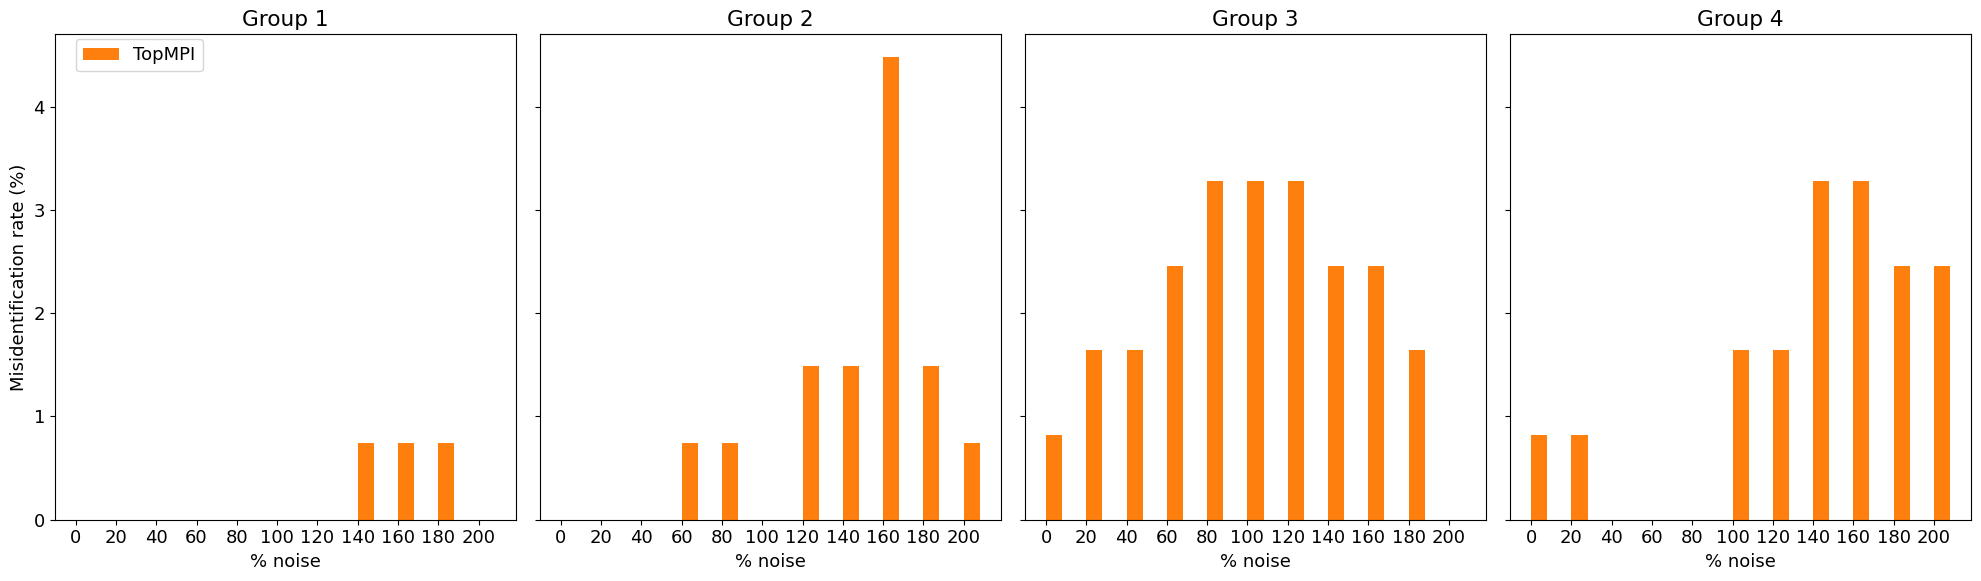

In [6]:
import numpy as np
import matplotlib.pyplot as plt

stacked_groups = [data[i:i + 2] for i in range(0, len(data), 2)]  # Groups of 3 lists per subplot
stacked_groups2 = [data2[i:i + 2] for i in range(0, len(data2), 2)]  # Groups of 3 lists for second bars

# Number of noise levels (columns)
n_columns = len(data[0])
noise_levels = np.arange(0, n_columns * 20, 20)  # Example noise levels (0, 20, ..., 200)

# Summing the components for each group
summed_groups = [np.sum(group, axis=0) for group in stacked_groups]  # Sum for Tool 1
summed_groups2 = [np.sum(group, axis=0) for group in stacked_groups2]  # Sum for Tool 2

# Offset for side-by-side bars
bar_offset = 4  # Offset between Tool 1 and Tool 2 bars

# Titles for subplots
titles = ["Group 1", "Group 2", "Group 3", "Group 4"]

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
plt.rcParams.update({'font.size': 13})

for i, ax in enumerate(axes):
    # Plot Tool 1 bars
    # ax.bar(noise_levels - bar_offset, summed_groups[i], width=8, color='#1f77b4', label="TopPIC" if i == 0 else None)

    # Plot Tool 2 bars
    ax.bar(noise_levels + bar_offset, summed_groups2[i], width=8, color='#ff7f0e', label="TopMPI" if i == 0 else None)

    # Customizing subplot
    ax.set_title(titles[i])
    ax.set_xlabel("% noise")
    ax.set_xticks(noise_levels)
    if i == 0:  # Add y-label to the first subplot only
        ax.set_ylabel("Misidentification rate (%)")

# Adding legends
fig.legend(loc="lower left", ncol=2, bbox_to_anchor=(0.038, 0.85))

plt.tight_layout()  # Leave space for the legend at the bottom

plt.savefig("noise.png", format="png", dpi=800)

plt.show()


In [1]:
import pandas as pd
import read_msalign

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/Result_resolved.tsv", sep="\t", index_col=0)

result_a = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved1_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result_b = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved2_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

pairs = result["Pair"].tolist()

a_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved1_ms2.msalign")
b_spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/resolved2_ms2.msalign")

accessA = {}
for pair in pairs:
    for spec in a_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == eval(pair):
            accessA[pair] = spec.header.spec_scan

accessB = {}
for pair in pairs:
    for spec in b_spec_list:
        if frozenset((spec.header.spec_scan % 100000, int(spec.header.title) % 100000)) == eval(pair):
            accessB[pair] = spec.header.spec_scan

Evalue1 = []
Evalue2 = []
for pair in pairs:
    if result[result["Pair"] == pair].iloc[0]["choice"] == "A":
        Evalue1.append(result_a[result_a["Scan(s)"] == accessA[pair]].iloc[0]["E-value"])
        Evalue2.append(result_b[result_b["Scan(s)"] == accessA[pair]].iloc[0]["E-value"])
    else:
        Evalue1.append(result_a[result_a["Scan(s)"] == accessB[pair]].iloc[0]["E-value"])
        Evalue2.append(result_b[result_b["Scan(s)"] == accessB[pair]].iloc[0]["E-value"])

result["E-value1"] = Evalue1
result["E-value2"] = Evalue2


In [2]:
import numpy as np
result["LoggedDifference1"] = np.where(result["choice"] == "A", np.log(result["E-value1"]) - np.log(result["A+B_1 E-value"]), np.log(result["E-value1"]) - np.log(result["B+A_1 E-value"]))
result["LoggedDifference2"] = np.where(result["choice"] == "A", np.log(result["E-value2"]) - np.log(result["A+B_2 E-value"]), np.log(result["E-value2"]) - np.log(result["B+A_2 E-value"]))
display(result[result["LoggedDifference1"] > 0])
display(result[result["LoggedDifference2"] > 0])

,Pair,A+B_1,A+B_1 peaks,A+B_1 E-value,A+B_2,A+B_2 peaks,A+B_2 E-value,B+A_1,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2 peaks,B+A_2 E-value,choice,E-value1,E-value2,LoggedDifference1,LoggedDifference2


,Pair,A+B_1,A+B_1 peaks,A+B_1 E-value,A+B_2,A+B_2 peaks,A+B_2 E-value,B+A_1,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2 peaks,B+A_2 E-value,choice,E-value1,E-value2,LoggedDifference1,LoggedDifference2
92,"frozenset({7304, 3986})",B,20,1.040755e+00,DECOY,5,55.216049,B,15,0.000001,C,7,1.492240e+00,A,4.442953e-03,1.000000e+300,-5.456382,686.764274
93,"frozenset({7304, 3993})",B,23,8.655435e-01,DECOY,5,87.501731,B,15,0.000005,C,8,1.089040e+00,A,9.315608e-02,1.000000e+300,-2.229081,686.303869
346,"frozenset({9651, 2374})",A,22,5.663328e-04,C,6,0.703922,DECOY,5,3.599487,A,22,3.406032e-04,A,2.915141e-05,6.525186e+00,-2.966679,2.226757
458,"frozenset({5524, 2374})",A,37,1.736502e-12,DECOY,7,706.699320,-,0,1.000000,A,23,1.160500e-06,A,5.045600e-14,1.000000e+300,-3.538527,684.214923
655,"frozenset({10412, 6164})",A,39,6.953040e-12,DECOY,6,51.831440,-,0,1.000000,A,27,6.438420e-07,A,1.016442e-12,1.276778e+02,-1.922871,0.901513


In [8]:
display(result[(result["LoggedDifference2"] < result["LoggedDifference1"]) & (result["LoggedDifference1"] > -5)])


,Pair,A+B_1,A+B_1 peaks,A+B_1 E-value,A+B_2,A+B_2 peaks,A+B_2 E-value,B+A_1,B+A_1 peaks,B+A_1 E-value,B+A_2,B+A_2 peaks,B+A_2 E-value,choice,E-value1,E-value2,LoggedDifference1,LoggedDifference2
0,"frozenset({1730, 2070})",A,12,1.221761e-07,B,8,3.818720e-07,B,8,1.499648e-06,A,12,1.221761e-07,A,8.429419e-08,6.797890e-08,-0.371151,-1.725888
1,"frozenset({1937, 10158})",A,35,5.540780e-17,B,13,1.007913e-06,-,0,1.000000e+00,A,15,2.532557e-08,A,3.026608e-17,3.323386e-09,-0.604693,-5.714653
2,"frozenset({2512, 2031})",A,19,2.280401e-12,B,7,2.109440e-05,B,7,4.607200e-04,A,19,1.894875e-12,A,9.749559e-13,1.125872e-06,-0.849714,-2.930450
3,"frozenset({1754, 2139})",A,8,8.560010e-07,B,7,1.934460e-09,B,7,4.305960e-09,A,8,7.965320e-08,B,1.199250e-09,1.095124e-08,-1.278304,-1.984230
4,"frozenset({8121, 2218})",A,38,1.350135e-20,B,6,4.344800e-04,-,0,1.000000e+00,A,26,1.239046e-11,A,2.119774e-21,1.576900e-06,-1.851480,-5.618689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,"frozenset({11260, 5254})",A,45,1.359072e-11,B,9,3.338000e-05,B,9,1.477540e-04,A,45,4.618891e-12,A,9.855120e-13,2.254577e-07,-2.623981,-4.997580
1319,"frozenset({5120, 2607})",A,62,2.486405e-15,B,12,3.558400e-06,-,0,1.000000e+00,A,45,9.060480e-10,A,1.001299e-16,1.112920e-08,-3.212125,-5.767494
1320,"frozenset({3090, 5127})",A,70,4.554792e-17,B,11,2.388800e-04,-,0,1.000000e+00,A,49,3.974731e-11,A,1.808717e-18,3.613400e-07,-3.226147,-6.493897
1321,"frozenset({5242, 11260})",A,57,4.691227e-14,B,7,9.100400e-04,-,0,1.000000e+00,A,42,7.730448e-09,A,7.520832e-15,1.771160e-06,-1.830603,-6.241854


<Figure size 640x480 with 0 Axes>

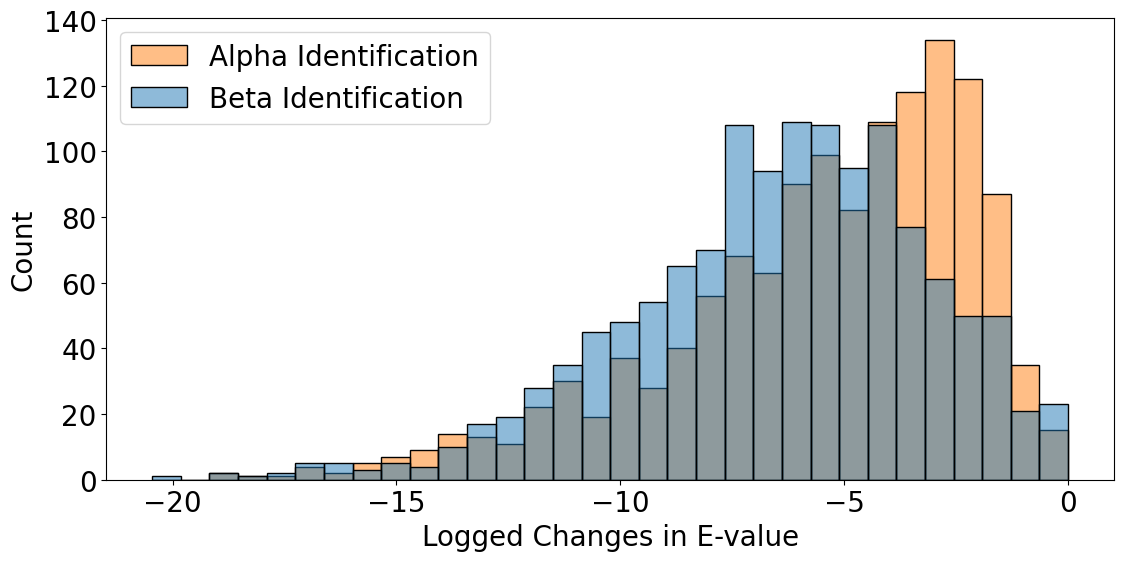

In [9]:
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

plt.clf()
result[result["LoggedDifference1"] > 0] = 0
result[result["LoggedDifference2"] > 0] = 0
differences1 = result["LoggedDifference1"].tolist()
differences2 = result["LoggedDifference2"].tolist()
plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 20})
sns.histplot([differences2, differences1])
plt.xlabel("Logged Changes in E-value")
plt.legend(["Alpha Identification", "Beta Identification"])

[0.1738410334124683,
 0.4400850616058671,
 0.09366420207443318,
 0.2924097029072314]

2.1007552922620834

3.2212004001657197

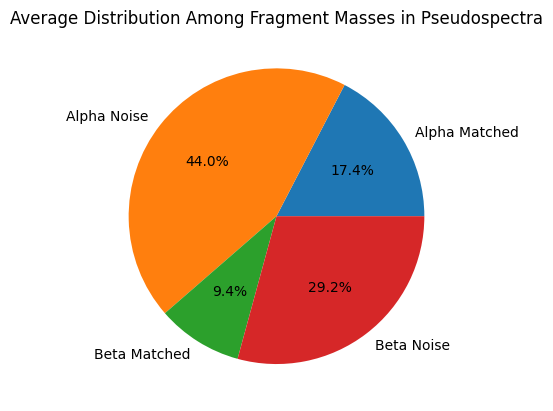

In [28]:
import read_msalign
import pandas as pd
from statistics import mean 
import matplotlib.pyplot as plt

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/Simulation5/Keep_Decoy/temp_ms2_modified.msalign")

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", sep="\t")

amatch = []
anon = []
bmatch = []
bnon = []
for spec in spec_list:
    ascan = int(spec.header.spec_scan) % 100000
    bscan = int(spec.header.title) % 100000
    atotal = int(df[df["Scan(s)"] == ascan].iloc[0]["#peaks"])
    a = int(df[df["Scan(s)"] == ascan].iloc[0]["#matched peaks"])
    btotal = int(df[df["Scan(s)"] == bscan].iloc[0]["#peaks"])
    b = int(df[df["Scan(s)"] == bscan].iloc[0]["#matched peaks"])

    total = atotal + btotal
    amatch.append(a / total)
    anon.append((atotal - a) / total)
    bmatch.append(b / total)
    bnon.append((btotal - b) / total)


list = [mean(amatch), mean(anon), mean(bmatch), mean(bnon)]
display(list)
mylabels = ["Alpha Matched", "Alpha Noise", "Beta Matched", "Beta Noise"]

plt.pie(list, labels=mylabels, autopct='%1.1f%%')
plt.title("Average Distribution Among Fragment Masses in Pseudospectra")

x = mean(amatch) / mean(bmatch)
y = (mean(anon) + mean(bnon)) / (x + 1)

display((mean(amatch) / (x*y)) / mean(amatch))
display((mean(bmatch) / y) / (mean(bmatch) / (1 - mean(amatch))))

plt.savefig("piechart.png", dpi=1200)

In [146]:

import sys
import pandas as pd
import numpy as np
import seaborn as sns
import read_msalign
import matplotlib.pyplot as plt

verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")

result1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulationFDR1%/A_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
# result = result[result["E-value"] < 0.01]

result2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulationFDR1%/B_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result2["Scan(s)"] = result2["Scan(s)"] + 10000000

result = pd.concat([result1, result2], ignore_index=True)

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/A_ms2.msalign")
# spec_list2 = read_msalign.read_spec_file(dir + "resolved2_ms2.msalign")

spec_dict = {}
for spec in spec_list:
    spec_dict[str(spec.header.spec_scan)] = spec

for index, row in result.iterrows():
    result.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
    result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"] % 10000000)].header.title) % 100000

# display(verifier)

verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_True"))

joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Other"))

joined["Verified_ProteinCorrect"] = "-"
joined.loc[(joined["Scan(s)"] < 10000000), "Verified_ProteinCorrect"] = (joined["Protein accession"] == joined["Protein accession_True"])
joined.loc[(joined["Scan(s)"] > 10000000), "Verified_ProteinCorrect"] = (joined["Protein accession"] == joined["Protein accession_Other"])

# joined["proteoform_ppm"] = joined["Proteoform mass"] * 10 / 1e6
# joined.loc[joined["proteoform_ppm"] < 0.01] = 0.01

# joined.loc[(joined["Scan(s)"] < 10000000), "Verified_ProteoformCorrect"] = (joined["Verified_ProteinCorrect"] == True) & (abs(joined["Proteoform mass"] - joined["Proteoform mass_True"]) < joined["proteoform_ppm"])
# joined.loc[(joined["Scan(s)"] > 10000000), "Verified_ProteoformCorrect"] = (joined["Verified_ProteinCorrect"] == True) & (abs(joined["Proteoform mass"] - joined["Proteoform mass_Other"]) < joined["proteoform_ppm"])

# # Correct protein for all
first = joined[joined["Scan(s)"] < 10000000]
second = joined[joined["Scan(s)"] > 10000000]

print(first[first["Verified_ProteinCorrect"] == True].shape[0])
print(first[(first["Protein accession"] == first["Protein accession_Other"]) & (first["Scan(s)"].isin(switchlist))].shape[0])

print(second[(second["Verified_ProteinCorrect"] == True) & (second["Scan(s)"].isin(switchlist))].shape[0])
# print(second[(second["Protein accession"] == second["Protein accession_True"]) & ].shape[0])


# #Correct protein for E-value < 0.01
# filtered = joined[joined["E-value"] < 0.01]
# filtered['pair'] = filtered.apply(lambda row: tuple(sorted((row['Scan_real'], row['Scan(other)']))), axis=1)
# # Step 2: Count the occurrences of each unique standardized pair
# pair_counts = filtered['pair'].value_counts()
# # Step 3: Determine how many unique pairs appeared once and how many appeared twice
# count_once = (pair_counts == 1).sum()
# count_twice = (pair_counts == 2).sum()
# print(f'Number of unique pairs that appeared once: {count_once}')
# print(f'Number of unique pairs that appeared twice: {count_twice}')
# filtered[filtered["Verified_ProteinCorrect"]]


722
0
0


Combination Counts:
 combination
Both identifications are reported      713
Only one identification is reported     12
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

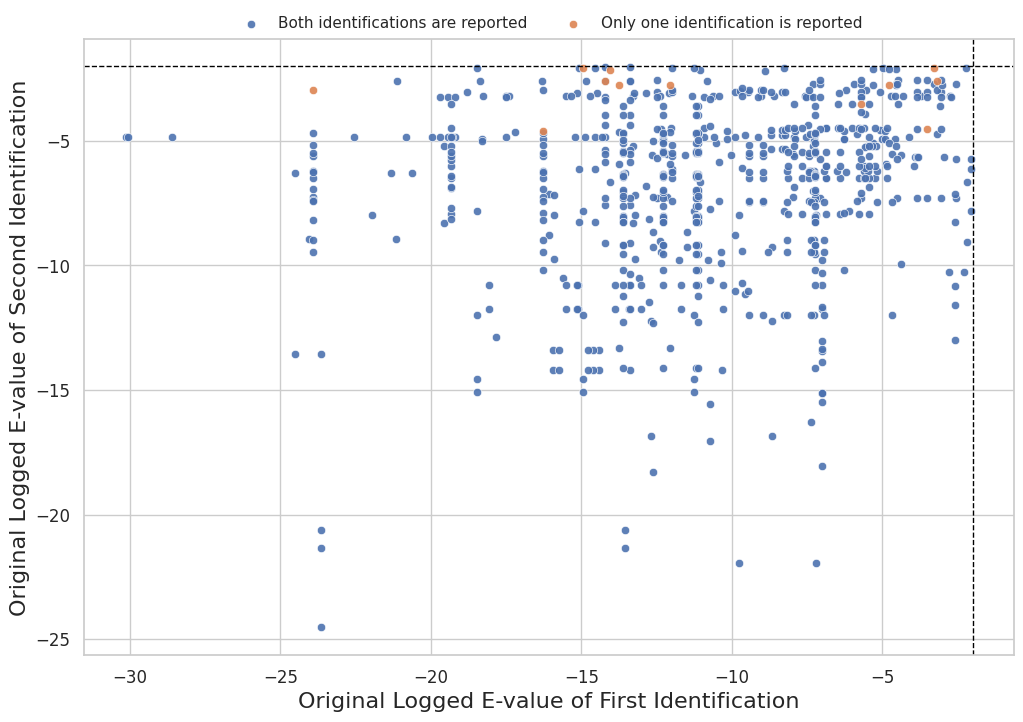

In [179]:

import sys
import pandas as pd
import numpy as np
import seaborn as sns
import read_msalign
import matplotlib.pyplot as plt

verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")

result1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulationTDNofilter/PrimaryPrSMs.tsv", delimiter="\t")
# result = result[result["E-value"] < 0.01]

result2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulationTDNofilter/SecondaryPrSM_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result2 = result2[~result2["Protein accession"].str.contains("DECOY")]

secondaryscans = result2["Scan(s)"].tolist()

# result2["Scan(s)"] = result2["Scan(s)"] + 10000000

# result = pd.concat([result1, result2], ignore_index=True)

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/A_ms2.msalign")
# spec_list2 = read_msalign.read_spec_file(dir + "resolved2_ms2.msalign")

spec_dict = {}
for spec in spec_list:
    spec_dict[str(spec.header.spec_scan)] = spec

for index, row in result1.iterrows():
    result1.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
    result1.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"] % 10000000)].header.title) % 100000

# display(verifier)

verifiedResult = pd.merge(result1,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_True"))

joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Other"))

# joined["Verified_ProteinCorrect"] = "-"
# joined.loc[(joined["Scan(s)"] < 10000000), "Verified_ProteinCorrect"] = (joined["Protein accession"] == joined["Protein accession_True"])
# joined.loc[(joined["Scan(s)"] > 10000000), "Verified_ProteinCorrect"] = (joined["Protein accession"] == joined["Protein accession_Other"])

# joined["proteoform_ppm"] = joined["Proteoform mass"] * 10 / 1e6
# joined.loc[joined["proteoform_ppm"] < 0.01] = 0.01

# joined.loc[(joined["Scan(s)"] < 10000000), "Verified_ProteoformCorrect"] = (joined["Verified_ProteinCorrect"] == True) & (abs(joined["Proteoform mass"] - joined["Proteoform mass_True"]) < joined["proteoform_ppm"])
# joined.loc[(joined["Scan(s)"] > 10000000), "Verified_ProteoformCorrect"] = (joined["Verified_ProteinCorrect"] == True) & (abs(joined["Proteoform mass"] - joined["Proteoform mass_Other"]) < joined["proteoform_ppm"])

# # Correct protein for all
# joined[joined["Verified_ProteinCorrect"] == True]

# #Correct protein for E-value < 0.01
# filtered = joined[joined["E-value"] < 0.01]
# filtered['pair'] = filtered.apply(lambda row: tuple(sorted((row['Scan_real'], row['Scan(other)']))), axis=1)
# # Step 2: Count the occurrences of each unique standardized pair
# pair_counts = filtered['pair'].value_counts()
# # Step 3: Determine how many unique pairs appeared once and how many appeared twice
# count_once = (pair_counts == 1).sum()
# count_twice = (pair_counts == 2).sum()
# print(f'Number of unique pairs that appeared once: {count_once}')
# print(f'Number of unique pairs that appeared twice: {count_twice}')
# filtered[filtered["Verified_ProteinCorrect"]]


#Graph for simulation data
joined["Logged E-value_x"] = np.log10(joined["E-value_True"])
joined["Logged E-value_y"] = np.log10(joined["E-value_Other"])

joined["Boolean_x"] = True
joined["Boolean_y"] = joined['Scan(s)'].isin(secondaryscans)

# Make sure both dataframes have the same number of rows for pairing
# min_length = min(len(df_x), len(df_y))
# df_x = df_x.iloc[:min_length]
# df_y = df_y.iloc[:min_length]

# Prepare the scatter plot data
scatter_data = pd.DataFrame({
    'x': joined['Logged E-value_x'],
    'y': joined['Logged E-value_y'],
    'scan1': joined["Scan_real"],
    'scan2': joined["Scan(other)"],
    'boolean_x': joined['Boolean_x'],
    'boolean_y': joined['Boolean_y']
})



# Define color mapping based on boolean pairs
scatter_data['combination'] = scatter_data.apply(lambda row: 
                                                 'Both identifications are reported' if row['boolean_x'] and row['boolean_y'] else
                                                 'Only one identification is reported' if row['boolean_x'] or row['boolean_y'] else
                                                 'No identifications are reported', axis=1)

sns.set(style='whitegrid')

# Plotting the scatter plot
plt.figure(figsize=(12, 8))

# Print the count of each combination
print("Combination Counts:\n", scatter_data['combination'].value_counts())

# Adding transparency for clarity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=scatter_data[scatter_data['combination'] == 'Both identifications are reported'], 
                x='x', y='y', label='Both identifications are reported', alpha=0.9)

sns.scatterplot(data=scatter_data[scatter_data['combination'] == 'Only one identification is reported'], 
                x='x', y='y', label='Only one identification is reported', alpha=0.9)

sns.scatterplot(data=scatter_data[scatter_data['combination'] == 'No identifications are reported'], 
                x='x', y='y', label='No identifications are reported', alpha=0.9)

# Customize plot
plt.xlabel('Original Logged E-value of First Identification', fontsize=16)
plt.ylabel('Original Logged E-value of Second Identification', fontsize=16)

plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3, frameon=False)

plt.axvline(x=-2, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-2, color='black', linestyle='--', linewidth=1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# plt.suptitle('Reported Identifications under 0.01 E-value Cutoff', fontsize=20)

plt.savefig("sensitivity.png", dpi=800, format="png")
plt.savefig("sensitivity.svg", dpi=800, format="svg")

plt.show()

In [ ]:
import pandas as pd 

newproteoforms = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/New proteoforms.tsv", sep="\t")



In [32]:
import pandas as pd

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/Result_final.tsv", sep="\t")

def choose_columns(row):
    if row['choice'] == 'A':  # Check if the value in the fifth column is 'A'
        return pd.Series([row['A+B_1'], row['A+B_2'], row['choice']])  # Return the first two columns
    else:  # Otherwise, it must be 'B'
        return pd.Series([row['B+A_1'], row['B+A_2'], row["choice"]])  # Return the second two columns

# Apply the function to each row in the dataframe
result_df = df.apply(choose_columns, axis=1)

result_df.columns = ['Selected_Col1', 'Selected_Col2', "choice"]

# # Count the number of rows with "-" in either of the two selected columns
# rows_with_dash = result_df[(result_df['Selected_Col1'] == '-') | (result_df['Selected_Col2'] == '-')].shape[0]

# # Display the count
# rows_with_dash

def count_rows_based_on_third_column(df):
    count_A = df[(df['choice'] == 'A') & (~(df['Selected_Col1'] == 'A') | ~(df['Selected_Col2'] == 'B'))]
    count_B = df[(df['choice'] == 'B') & (~(df['Selected_Col1'] == 'B') | ~(df['Selected_Col2'] == 'A'))]
    return count_A, count_B

# Get the counts
count_A, count_B = count_rows_based_on_third_column(result_df)

count_A, count_B

# result_df[(result_df['choice'] == 'B') & ~(result_df['Selected_Col1'] == 'B') | ~(result_df['Selected_Col2'] == 'A')]

(    Selected_Col1 Selected_Col2 choice
 89              A             C      A
 93              A             C      A
 146             A             C      A
 147             A             C      A
 157             A             C      A
 159             A             C      A
 188             A             C      A
 193             A             C      A
 207             A             C      A
 266             A             C      A
 315             A             C      A
 415             A             C      A
 426             A             C      A
 579             A             C      A
 594             A             C      A,
     Selected_Col1 Selected_Col2 choice
 265             C             A      B
 295             A             A      B)

In [35]:
import pandas as pd

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/Result_final.tsv", sep="\t")

def choose_columns(row):
    if row['choice'] == 'A':  # Check if the value in the fifth column is 'A'
        if (row["A+B_1 E-value"] < 0.01) & (row["A+B_2 E-value"] < 0.01):
            return pd.Series([row['A+B_1'], row["A+B_1 E-value"], row['A+B_2'], row["A+B_2 E-value"], row['choice']])  # Return the first two columns
        elif (row["A+B_1 E-value"] >= 0.01) & (row["A+B_2 E-value"] < 0.01):
            return pd.Series(["-", 1, row['A+B_2'], row["A+B_2 E-value"], row['choice']])
        elif (row["A+B_1 E-value"] < 0.01) & (row["A+B_2 E-value"] >= 0.01):
            return pd.Series([row['A+B_1'], row["A+B_1 E-value"], "-", 1, row['choice']])
        else:
            return pd.Series(["-", 1, "-", 1, row['choice']])
    else:  # Otherwise, it must be 'B'
        if (row["B+A_1 E-value"] < 0.01) & (row["B+A_2 E-value"] < 0.01):
            return pd.Series([row['B+A_1'], row["B+A_1 E-value"], row['B+A_2'], row["B+A_2 E-value"], row['choice']])  # Return the first two columns
        elif (row["B+A_1 E-value"] >= 0.01) & (row["B+A_2 E-value"] < 0.01):
            return pd.Series(["-", 1, row['B+A_2'], row["B+A_2 E-value"], row['choice']])
        elif (row["B+A_1 E-value"] < 0.01) & (row["B+A_2 E-value"] >= 0.01):
            return pd.Series([row['B+A_1'], row["B+A_1 E-value"], "-", 1, row['choice']])
        else:
            return pd.Series(["-", 1, "-", 1, row['choice']])

# Apply the function to each row in the dataframe
result_df = df.apply(choose_columns, axis=1)

result_df.columns = ['Protein 1', "E-value 1", 'Protein 2', "E-value 2", "choice"]

result_df

# # Count the number of rows with "-" in either of the two selected columns
# rows_with_dash = result_df[(result_df['Protein 1'] == '-') | (result_df['Protein 2'] == '-')].shape[0]

# # Display the count
# rows_with_dash

def count_rows_based_on_third_column(df):
    count_A = df[(df['choice'] == 'A') & ((~(df['Protein 1'] == 'A') & ~(df["Protein 1"] == "-"))| (~(df['Protein 2'] == 'B') & ~(df["Protein 2"] == "-")))]
    count_B = df[(df['choice'] == 'B') & ((~(df['Protein 1'] == 'B') & ~(df["Protein 1"] == "-"))| (~(df['Protein 2'] == 'A') & ~(df["Protein 2"] == "-")))]
    return count_A, count_B

# Get the counts
count_A, count_B = count_rows_based_on_third_column(result_df)

count_A, count_B


(Empty DataFrame
 Columns: [Protein 1, E-value 1, Protein 2, E-value 2, choice]
 Index: [],
 Empty DataFrame
 Columns: [Protein 1, E-value 1, Protein 2, E-value 2, choice]
 Index: [])

In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/Result_final.tsv", sep="\t")
result1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/resolved1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)
result2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/simulation/resolved2_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)


filteredA = df[(~(df["A+B_1"] == "-") & ~(df["A+B_2"] == "-") & (df["choice"] == "A"))][["Scan", "A+B_1", "A+B_1_mass", "A+B_1 E-value"]].rename(columns={'A+B_1': 'Old Protein', 'A+B_1 E-value': 'Old E-value', "A+B_1_mass": "Old Mass"})
filteredB = df[(~(df["B+A_1"] == "-") & ~(df["B+A_2"] == "-") & (df["choice"] == "B"))][["Scan", "B+A_1", "B+A_1_mass", "B+A_1 E-value"]].rename(columns={'B+A_1': 'Old Protein', 'B+A_1 E-value': 'Old E-value', "B+A_1_mass": "Old Mass"})

filtered = pd.concat([filteredA, filteredB])
joined = filtered.merge(result, left_on="Scan", right_on="Scan(s)", how="inner")

joined["proteoform_ppm"] = joined["Proteoform mass"] * 10 / 1e6
joined.loc[joined["proteoform_ppm"] < 0.01] = 0.01


joined["Verified_ProteinCorrect"] = (joined["Old Protein"] == joined["Protein accession"])
joined["ppm difference"] = abs(joined["Proteoform mass"] - joined["Old Mass"])
joined["Verified_ProteoformCorrect"] = (joined["Verified_ProteinCorrect"] == True) & (joined["ppm difference"] < joined["proteoform_ppm"])

joined[(joined["Old E-value"] >= 0.01)]
# joined["E-value improvement"] = np.log10(joined["Old E-value"] - joined["E-value"])
# joined[~(joined["Old Protein"] == joined["Protein accession"])]

,Scan,Old Protein,Old Mass,Old E-value,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
865,2181,sp|P28904|TREC_ECOLI,9107.359053,0.021775,/home/daniel/Desktop/datafiles/RealData/ecoli/...,70,2181,HCD,2181,1688.09,...,0,NaN,0,NaN,-,4,6,0.004569,-,-


,Scan,Old Protein,Old Mass,Old E-value,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,...,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value,proteoform_ppm,Verified_ProteinCorrect,ppm difference,Verified_ProteoformCorrect
9,2296,sp|P0A850|TIG_ECOLI,3914.114666,0.011411,/home/daniel/Desktop/datafiles/RealData/ecoli/...,103,2296,HCD,2296,1777.81,...,-,7,7,0.005134,-,-,0.039141,True,0.0,True
41,2801,sp|P64503|YEBV_ECOLI,8761.406630,0.010711,/home/daniel/Desktop/datafiles/RealData/ecoli/...,211,2801,HCD,2801,2170.28,...,-,6,5,0.000333,-,-,0.087614,True,0.0,True
47,3504,sp|P0ADU5|YGIW_ECOLI,11968.987350,0.017851,/home/daniel/Desktop/datafiles/RealData/ecoli/...,306,3504,HCD,3504,2720.78,...,-,7,6,0.007416,-,-,0.119690,True,0.0,True
65,3868,sp|P0A8G6|NQOR_ECOLI,20716.924340,0.030035,/home/daniel/Desktop/datafiles/RealData/ecoli/...,358,3868,HCD,3868,3006.63,...,-,9,7,0.007786,-,-,0.207169,True,0.0,True
139,4165,sp|P68066|GRCA_ECOLI,14307.430000,0.012648,/home/daniel/Desktop/datafiles/RealData/ecoli/...,502,4165,HCD,4165,3238.33,...,-,12,13,0.004763,-,-,0.143074,True,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,10164,sp|P68066|GRCA_ECOLI,14322.411510,0.026158,/home/daniel/Desktop/datafiles/RealData/ecoli/...,1881,10164,HCD,10164,7845.44,...,-,9,8,0.005021,-,-,0.143224,True,0.0,True
1274,10967,sp|P68206|YJBJ_ECOLI,8336.307340,0.010584,/home/daniel/Desktop/datafiles/RealData/ecoli/...,1924,10967,HCD,10967,8466.79,...,-,5,5,0.001465,-,-,0.083363,True,0.0,True
1279,11597,sp|P68066|GRCA_ECOLI,14323.413300,0.017458,/home/daniel/Desktop/datafiles/RealData/ecoli/...,1949,11597,HCD,11597,8955.24,...,-,7,7,0.005611,-,-,0.143234,True,0.0,True
1280,11631,sp|P0A6F9|CH10_ECOLI,10378.569670,0.049928,/home/daniel/Desktop/datafiles/RealData/ecoli/...,1958,11631,HCD,11631,8982.31,...,-,5,5,0.003473,-,-,0.103786,True,0.0,True


In [ ]:
import pandas as pd
import read_msalign

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved2_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

filter = result['Protein accession'].str.contains("DECOY")
filtered_df = result[~filter]

def getMatchedPeaks(prsmID, dir, spec):
    with open(dir + "prsm" + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        matched_list = []
        nonmatched_list = []
        if len(spec.peak_list) == 1:
            matched_list.append(copy.deepcopy(spec.peak_list[0]))
        else:
            for idx in range(0, len(peak_list)):
                if "matched_ions" in peak_list[idx]:
                    matched_list.append(copy.deepcopy(spec.peak_list[idx]))
                else:
                    nonmatched_list.append(copy.deepcopy(spec.peak_list[idx]))
        return matched_list, nonmatched_list
    
spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved1_ms2.msalign")

spec_dict = {}
for spec in spec_list:
    spec_dict[str(spec.header.spec_scan)] = spec
    
for index, row in filtered_df.iterrows():
    scan = row["Scan(s)"]

    main_spec = (spec_dict[str(scan)])
    main_matchedList, nonMatchedList = getMatchedPeaks(result_a[result_a["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], a_dir, main_spec)

In [17]:
import read_msalign
import pandas as pd

# speclist1_6 = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/DDA_560_640_1micoscan/1.6.5/DDA_560_640_1microscan_ms2.msalign")
speclist1_7 = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/DDA_560_640_1micoscan/DDA_560_640_1microscan_ms2.msalign")

result1_6 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/DDA_560_640_1micoscan/1.6.5/DDA_560_640_1microscan_ms2_toppic_prsm_single.tsv", skiprows=29, sep="\t")
result1_7 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/DDA_560_640_1micoscan/DDA_560_640_1microscan_ms2_toppic_prsm_single.tsv", skiprows=29, sep="\t")

# spec_dict1_6 = {}
# for spec in speclist1_6:
#     spec_dict1_6[str(spec.header.spec_scan)] = spec

spec_dict1_7 = {}
for spec in speclist1_7:
    spec_dict1_7[str(spec.header.spec_scan)] = spec

missingones = set(result1_6["Scan(s)"]).difference(set(result1_7["Scan(s)"]))

for scan in missingones:
    if int(result1_6[result1_6["Scan(s)"] == scan].iloc[0]["Charge"]) == spec_dict1_7

{4927,
 5416,
 5460,
 5485,
 5537,
 5641,
 5648,
 5654,
 5662,
 5687,
 5692,
 5729,
 5730,
 5835,
 5856,
 5857,
 6051,
 6062,
 6066,
 6084,
 6123,
 6130,
 6136,
 6153,
 6154,
 6199,
 6202,
 6205,
 6224,
 6335,
 6350,
 6615,
 6653,
 6698,
 6720,
 6768,
 6794,
 6811,
 6845,
 6891,
 7024,
 7032,
 7069,
 7075,
 7115,
 7127,
 7197,
 7201,
 7263,
 7329,
 7369,
 7395,
 7434,
 7438,
 7474,
 7526,
 7528,
 7577,
 7663,
 7670,
 7715,
 7756,
 7823,
 8004,
 8025,
 8130,
 8138,
 8161,
 8230,
 8239,
 8243,
 8382,
 8403,
 8415,
 8445,
 8452,
 8492,
 8512,
 8616,
 8651,
 8693,
 8775,
 8896,
 8959,
 8970,
 8985,
 9003,
 9033,
 9034,
 9049,
 9062,
 9068,
 9075,
 9078,
 9099,
 9121,
 9129,
 9131,
 9148,
 9153,
 9176,
 9191,
 9195,
 9218,
 9262,
 9267,
 9479,
 9544,
 9603,
 9615,
 9729,
 9730,
 9773,
 9779,
 9818,
 9827,
 9889,
 9926,
 9950,
 10022,
 10041,
 10044,
 10080,
 10137,
 10253,
 10274,
 10575,
 10602,
 10618,
 10620,
 10625,
 10777,
 10884,
 10975,
 10998,
 11003,
 11184,
 11199,
 11322,
 11372,

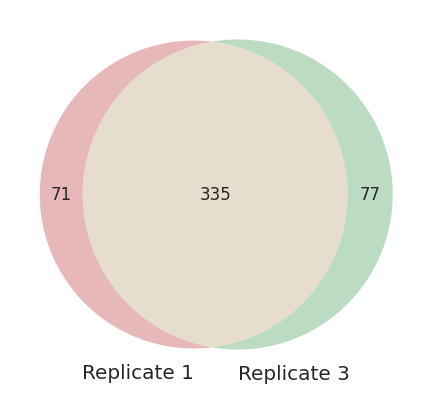

In [13]:
from matplotlib_venn import venn2

venn2(subsets=(71, 77, 335), set_labels=('Replicate 1', 'Replicate 3'))


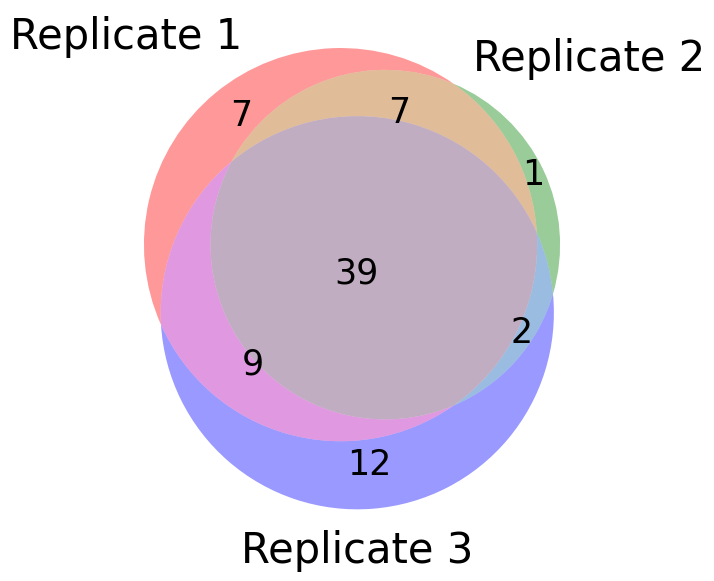

In [97]:
from matplotlib_venn import venn3

plt.figure(figsize=(11, 7))
venn3(subsets=(7, 1, 7, 12, 9, 2, 39),
        set_labels=('Replicate 1', 'Replicate 2', 'Replicate 3'))

plt.savefig("proteinoverlap.png", dpi=200)

In [10]:
import pandas as pd

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved2_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

combined_df = pd.concat([r1, r2], ignore_index=True)

combined_df = combined_df[~combined_df['Protein accession'].str.contains('DECOY')]

combined_df["Multiplexed"] = combined_df.groupby("Scan(s)")["Scan(s)"].transform("size")

combined_df[(combined_df["Data file name"] == "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved2_ms2.msalign") & combined_df["Multiplexed"] == 1]

# group_sizes = combined_df.groupby('Scan(s)').size()

# # Count the frequency of each group size
# group_size_counts = group_sizes.value_counts().sort_index()

# print(group_size_counts)


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value,Multiplexed
2087,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3,2665,HCD,2665,2064.01,12,5,4109.00007,4108.95507,...,-1.0128:[9-10],0,NaN,-,5,5,0.038799,0.009434,0.017857,1
2088,/home/daniel/Desktop/datafiles/RealData/ecoli/...,4,2950,HCD,2950,2287.40,25,8,8745.23843,8745.18343,...,-116.0523:[42-43],0,NaN,-,10,7,0.000005,0.000000,0.000000,1
2093,/home/daniel/Desktop/datafiles/RealData/ecoli/...,9,4184,HCD,4184,3253.67,74,12,12386.38120,12387.29355,...,-24.0369:[42-92],0,NaN,-,11,11,0.000235,0.000000,0.000000,1
2102,/home/daniel/Desktop/datafiles/RealData/ecoli/...,18,4702,HCD,4702,3658.39,192,18,14228.62638,14229.55873,...,+382.3628:[103-121],0,NaN,-,26,19,0.042613,0.009009,0.016949,1
2105,/home/daniel/Desktop/datafiles/RealData/ecoli/...,21,4831,HCD,4831,3757.84,162,16,15352.85478,15353.74713,...,-26.0274:[70-72],0,NaN,-,21,15,0.001948,0.000000,0.000000,1


In [45]:
import pandas as pd

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/resolved2_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

result = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/Result_final.tsv", sep="\t")
newproteoforms = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/newproteoforms.tsv", sep="\t")

# Concatenate two proteoform files
combined_df = pd.concat([r1, r2], ignore_index=True)

combined_df = combined_df[~combined_df['Protein accession'].str.contains('DECOY')]

combined_df["Multiplexed"] = combined_df.groupby("Scan(s)")["Scan(s)"].transform("size")

combined_df = combined_df.merge(result, left_on="Scan(s)", right_on="Scan", how="left")

finalresult = newproteoforms.merge(combined_df, on=["Scan(s)", "Precursor mass"], how="inner")

finalresult.to_csv("result.tsv", sep="\t")


In [59]:
import pandas as pd

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/merged_results.csv", sep="\t")
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_2_MSDeplex/merged_results.csv", sep="\t")
r3 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_3_MSDeplex/merged_results.csv", sep="\t")

r1 = r1[~r1['Protein accession'].str.contains('DECOY')]
r2 = r2[~r2['Protein accession'].str.contains('DECOY')]
r3 = r3[~r3['Protein accession'].str.contains('DECOY')]

r1["Origin"] = 1
r2["Origin"] = 2
r3["Origin"] = 3

combined = pd.concat([r1, r2, r3], ignore_index=True)

combined.sort_values(by="E-value")

combined["1"] = combined["Origin"] == 1
combined["2"] = combined["Origin"] == 2
combined["3"] = combined["Origin"] == 3

resultlist = pd.DataFrame(columns=combined.columns).astype(combined.dtypes)

for i, row in combined.iterrows():
    is_duplicate = False
    for j, result in resultlist.iterrows():
        if row['Protein accession'] == result['Protein accession'] and abs(row['Precursor mass'] - result['Precursor mass']) < 1.2:
            if row["Origin"] == 1:
                resultlist.loc[j, "1"] = True
            elif row["Origin"] == 2:
                resultlist.loc[j, "2"] = True
            elif row["Origin"] == 3:
                resultlist.loc[j, "3"] = True
            is_duplicate = True
            break
    
    if not is_duplicate:
        resultlist.loc[0 if pd.isnull(resultlist.index.max()) else resultlist.index.max() + 1] = row

MSDeplex = resultlist

In [1]:
import pandas as pd

newproteoforms = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/tests/newproteoformsVanillaMSDeplexR1.tsv", sep="\t")

overlapedMSDeplex = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/tests/overlapR1R2.tsv", sep="\t")

r1 = newproteoforms
r2 = overlapedMSDeplex

r1["Origin"] = 1
r2["Origin"] = 2

combined = pd.concat([r1, r2], ignore_index=True)

combined.sort_values(by="E-value")

combined["1"] = combined["Origin"] == 1
combined["2"] = combined["Origin"] == 2

resultlist = pd.DataFrame(columns=combined.columns).astype(combined.dtypes)

for i, row in combined.iterrows():
    is_duplicate = False
    for j, result in resultlist.iterrows():
        if row['Protein accession'] == result['Protein accession'] and abs(row['Precursor mass'] - result['Precursor mass']) < 1.2:
            if row["Origin"] == 1:
                resultlist.loc[j, "1"] = True
            elif row["Origin"] == 2:
                resultlist.loc[j, "2"] = True
            is_duplicate = True
            break
    
    if not is_duplicate:
        resultlist.loc[0 if pd.isnull(resultlist.index.max()) else resultlist.index.max() + 1] = row

# Calculate the sizes for the Venn diagram
only_set1 = resultlist[(resultlist["1"] == True) & (resultlist["2"] == False)].shape[0]
only_set2 = resultlist[(resultlist["1"] == False) & (resultlist["2"] == True)].shape[0]
intersection = resultlist[(resultlist["1"] == True) & (resultlist["2"] == True)].shape[0]

resultlist[(resultlist["1"] == True) & (resultlist["2"] == False)].to_csv("focus.tsv", sep="\t")

In [48]:
import pandas as pd

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_proteoform_single.tsv", sep="\t", skiprows=29)
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_2_ms2_toppic_proteoform_single.tsv", sep="\t", skiprows=29)
r3 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_3_ms2_toppic_proteoform_single.tsv", sep="\t", skiprows=29)

r1 = r1[~r1['Protein accession'].str.contains('DECOY')]
r2 = r2[~r2['Protein accession'].str.contains('DECOY')]
r3 = r3[~r3['Protein accession'].str.contains('DECOY')]

r1["Origin"] = 1
r2["Origin"] = 2
r3["Origin"] = 3

combined = pd.concat([r1, r2, r3], ignore_index=True)

combined.sort_values(by="E-value")

combined["1"] = combined["Origin"] == 1
combined["2"] = combined["Origin"] == 2
combined["3"] = combined["Origin"] == 3

resultlist = pd.DataFrame(columns=combined.columns).astype(combined.dtypes)

for i, row in combined.iterrows():
    is_duplicate = False
    for j, result in resultlist.iterrows():
        if row['Protein accession'] == result['Protein accession'] and abs(row['Precursor mass'] - result['Precursor mass']) < 1.2:
            if row["Origin"] == 1:
                resultlist.loc[j, "1"] = True
            elif row["Origin"] == 2:
                resultlist.loc[j, "2"] = True
            elif row["Origin"] == 3:
                resultlist.loc[j, "3"] = True
            is_duplicate = True
            break
    
    if not is_duplicate:
        resultlist.loc[0 if pd.isnull(resultlist.index.max()) else resultlist.index.max() + 1] = row

Vanilla = resultlist

In [49]:
Vanilla = Vanilla[(Vanilla["1"] == True) & (Vanilla["2"] == True) & (Vanilla["3"] == True)]
MSDeplex = MSDeplex[(MSDeplex["1"] == True) & (MSDeplex["2"] == True) & (MSDeplex["3"] == True)]

In [53]:
Vanilla.to_csv("vanilla.tsv", sep="\t")
MSDeplex.to_csv("msdelplex.tsv", sep="\t")


In [58]:
import pandas as pd

r1 = pd.read_csv("vanilla.tsv", sep="\t")
r2 = pd.read_csv("msdelplex.tsv", sep="\t")

r1["Origin"] = 1
r2["Origin"] = 2

combined = pd.concat([r1, r2], ignore_index=True)

combined.sort_values(by="E-value")

combined["1"] = combined["Origin"] == 1
combined["2"] = combined["Origin"] == 2

resultlist = pd.DataFrame(columns=combined.columns).astype(combined.dtypes)

for i, row in combined.iterrows():
    is_duplicate = False
    for j, result in resultlist.iterrows():
        if row['Protein accession'] == result['Protein accession'] and abs(row['Precursor mass'] - result['Precursor mass']) < 1.2:
            if row["Origin"] == 1:
                resultlist.loc[j, "1"] = True
            elif row["Origin"] == 2:
                resultlist.loc[j, "2"] = True
            is_duplicate = True
            break
    
    if not is_duplicate:
        resultlist.loc[0 if pd.isnull(resultlist.index.max()) else resultlist.index.max() + 1] = row

# Calculate the sizes for the Venn diagram
only_set1 = resultlist[(resultlist["1"] == True) & (resultlist["2"] == False)].shape[0]
only_set2 = resultlist[(resultlist["1"] == False) & (resultlist["2"] == True)].shape[0]
intersection = resultlist[(resultlist["1"] == True) & (resultlist["2"] == True)].shape[0]

resultlist[(resultlist["1"] == True) & (resultlist["2"] == False)].to_csv("missingproteoforms.tsv", sep="\t")

In [47]:
import pandas as pd
import read_msalign

dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/"

inputdf = pd.read_csv(dir + "Result_final.tsv", delimiter="\t", index_col=0)

speclist = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/A_ms2.msalign")

# speclist = [spec for spec in speclist if (len(spec.header.pre_mz_list) > 1) and (float(spec.header.pre_inte_list[1]) > 0) and (float(spec.header.pre_inte_list[0]) / float(spec.header.pre_inte_list[1]) < 0)]

# scanlist = [int(spec.header.spec_scan) for spec in speclist]

scanlist = []

result_a = pd.read_csv(dir + "A_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result_ab = pd.read_csv(dir + "AB_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result_b = pd.read_csv(dir + "B_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)
result_ba = pd.read_csv(dir + "BA_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

output1 = pd.DataFrame(columns=result_a.columns).astype(result_a.dtypes)
output2 = pd.DataFrame(columns=result_a.columns).astype(result_a.dtypes)

for index, row in inputdf.iterrows():
    scan = row["Scan"]
    if int(scan) in scanlist:
        o1 = pd.Series()
        o2 = pd.Series()

        if (row["choice"] == "A"):
            A1 = result_a[result_a["Scan(s)"] == scan]
            A2 = result_ab[result_ab["Scan(s)"] == scan]

            if A1.shape[0] > 0:
                o1 = A1.iloc[0]
            if A2.shape[0] > 0:
                o2 = A2.iloc[0]
        elif (row["choice"] == "B"):
            B1 = result_b[result_b["Scan(s)"] == scan]
            B2 = result_ba[result_ba["Scan(s)"] == scan]

            if B1.shape[0] > 0:
                o1 = B1.iloc[0]
            if B2.shape[0] > 0:
                o2 = B2.iloc[0]

        if not o1.empty:
            output1.loc[0 if pd.isnull(output1.index.max()) else output1.index.max() + 1] = o1
        if not o2.empty:
            output2.loc[0 if pd.isnull(output2.index.max()) else output2.index.max() + 1] = o2
    else:
        A1 = result_a[result_a["Scan(s)"] == scan]
        if A1.shape[0] > 0:
            output1.loc[0 if pd.isnull(output1.index.max()) else output1.index.max() + 1] = A1.iloc[0]

def calculate_q_values(df):
    """
    Calculates q-values for a target-decoy search.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing protein accession and score columns.
    protein_column (str): The name of the column containing protein accession data (default: 'Protein accession').
    score_column (str): The name of the column containing identification scores (default: 'Score').
    decoy_identifier (str): The string that identifies decoy entries in the protein accession column (default: 'DECOY').
    
    Returns:
    pd.DataFrame: DataFrame with additional columns for cumulative decoy/target counts, FDR, and q-values.
    """
    # Copy the input DataFrame to avoid modifying the original data
    df = df.copy()

    # Add a column to indicate if the protein is a decoy
    df['IsDecoy'] = df["Protein accession"].str.contains("DECOY")

    # Sort by score (assuming higher score means better identification)
    df = df.sort_values(by="E-value")

    # Initialize counters for decoy and target counts
    df['Cumulative_Decoy'] = df['IsDecoy'].cumsum()
    df['Cumulative_Target'] = (~df['IsDecoy']).cumsum()

    # Calculate FDR: FDR = (# decoys / # total)
    df['FDR'] = df['Cumulative_Decoy'] / (df['Cumulative_Decoy'] + df['Cumulative_Target'])

    # Calculate q-value: the minimum FDR at or above this score
    df['q-value'] = df['FDR'][::-1].cummin()[::-1]  # Reverse cummin to get the minimum FDR for each score

    df = df.sort_index()

    return df["q-value"]

In [48]:
output1

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
0,/home/daniel/Desktop/datafiles/RealData/ecoli/...,0,659,HCD,771,606.88,12,5,4576.98037,4578.03272,...,1,+123.5988:[37-39],0,NaN,-,1,1,1000000000000000052504760255204420248704468581...,0.679102,1.0
1,/home/daniel/Desktop/datafiles/RealData/ecoli/...,1,661,HCD,774,609.78,14,1,963.99906,963.99406,...,1,-159.5432:[5-9],0,NaN,-,2,2,1000000000000000052504760255204420248704468581...,0.645428,1.0
2,/home/daniel/Desktop/datafiles/RealData/ecoli/...,2,664,HCD,777,611.69,16,1,740.97096,740.97096,...,1,-248.5949:[3-8],0,NaN,-,1,1,1000000000000000052504760255204420248704468581...,0.296798,0.727637
3,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3,668,HCD,782,615.87,11,5,3797.50097,3798.53332,...,1,-147.3986:[27-36],0,NaN,-,1,1,1000000000000000052504760255204420248704468581...,0.292506,0.716956
4,/home/daniel/Desktop/datafiles/RealData/ecoli/...,4,684,HCD,801,630.63,13,1,901.80825,900.8209,...,1,-260.7821:[4-9],0,NaN,-,2,2,1000000000000000052504760255204420248704468581...,0.658303,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5110,10186,HCD,11886,9181.83,23,15,14322.50855,14322.47355,...,1,+19.9997:[11-44],0,NaN,-,5,5,1066.16452,0.26536,0.050704
5111,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5111,10188,HCD,11889,9184.79,38,10,10396.64584,10396.56584,...,1,+15.9825:[1-73],0,NaN,-,11,8,0.00352,0.0,0.0
5112,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5112,10189,HCD,11890,9185.37,14,9,10411.63779,10410.54044,...,1,+186.0691:[7-88],0,NaN,-,5,3,1000000000000000052504760255204420248704468581...,0.572466,0.258333
5113,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5113,10195,HCD,11897,9190.93,23,10,10411.63774,10412.55009,...,1,+143.0117:[92-94],0,NaN,-,5,5,1.434827,0.070286,0.258333


In [49]:
# output1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

output1["Spectrum-level Q-value"] = calculate_q_values(output1)
output1["Proteoform-level Q-value"] = 0.0
output1[(output1["Spectrum-level Q-value"] < 0.01) & ~(output1["Protein accession"].str.contains("DECOY"))]

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
52,/home/daniel/Desktop/datafiles/RealData/ecoli/...,52,1453,HCD,1698,1314.73,20,2,1486.77281,1486.762736,...,0,NaN,0,NaN,-,6,5,0.001458,0.000000,0.0
55,/home/daniel/Desktop/datafiles/RealData/ecoli/...,55,1481,HCD,1730,1338.75,22,3,2469.98008,2469.96008,...,1,-387.1317:[19-22],0,NaN,-,12,12,0.0,0.000000,0.0
56,/home/daniel/Desktop/datafiles/RealData/ecoli/...,56,1483,HCD,1733,1341.64,16,3,2599.02364,2600.07599,...,1,-257.0158:[22-25],0,NaN,-,7,7,0.000012,0.000000,0.0
60,/home/daniel/Desktop/datafiles/RealData/ecoli/...,60,1501,HCD,1754,1357.88,13,3,2523.13204,2523.114989,...,0,NaN,0,NaN,-,7,7,0.0,0.000000,0.0
63,/home/daniel/Desktop/datafiles/RealData/ecoli/...,63,1513,HCD,1768,1369.05,27,5,3621.94082,3621.91582,...,1,+240.1338:[27-29],0,NaN,-,11,10,0.000001,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5105,10177,HCD,11876,9174.28,76,13,10380.65059,10380.58331,...,0,NaN,0,NaN,-,12,7,0.00244,0.000000,0.0
5108,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5108,10182,HCD,11882,9179.23,58,10,10396.64584,10395.67349,...,1,+15.0902:[95-97],0,NaN,-,13,9,0.004993,0.000000,0.0
5109,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5109,10183,HCD,11883,9179.82,32,9,10396.64586,10396.56086,...,1,+15.9775:[70-84],0,NaN,-,7,7,0.01475,0.000567,0.0
5111,/home/daniel/Desktop/datafiles/RealData/ecoli/...,5111,10188,HCD,11889,9184.79,38,10,10396.64584,10396.56584,...,1,+15.9825:[1-73],0,NaN,-,11,8,0.00352,0.000000,0.0


In [32]:
output2["Spectrum-level Q-value"] = calculate_q_values(output2)
output2["Proteoform-level Q-value"] = 0.0
output2[output2["Spectrum-level Q-value"] < 0.01]

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
51,/home/daniel/Desktop/datafiles/RealData/ecoli/...,193,1980,HCD,2313,1791.61,60,9,7493.91663,7493.87163,...,1,+172.1003:[1-9],0,NaN,-,13,10,0.016286,0.00885,0.0
58,/home/daniel/Desktop/datafiles/RealData/ecoli/...,201,2011,HCD,2349,1818.87,17,4,3380.77961,3380.757598,...,0,NaN,0,NaN,-,5,5,0.034665,0.00885,0.0
72,/home/daniel/Desktop/datafiles/RealData/ecoli/...,244,2136,HCD,2495,1931.57,68,9,7476.92418,7476.86918,...,1,-1.0033:[55-66],0,NaN,-,17,15,0.000003,0.00000,0.0
79,/home/daniel/Desktop/datafiles/RealData/ecoli/...,260,2179,HCD,2545,1970.34,64,9,7476.92418,7476.86918,...,1,-1.0033:[58-60],0,NaN,-,24,19,0.0,0.00000,0.0
97,/home/daniel/Desktop/datafiles/RealData/ecoli/...,292,2282,HCD,2665,2064.01,12,5,4109.00007,4108.95507,...,1,-1.0128:[9-10],0,NaN,-,5,5,0.038799,0.00885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3672,9960,HCD,11623,8976.12,92,12,10411.63528,10410.58293,...,1,+29.9996:[93],0,NaN,-,13,10,0.01505,0.00885,0.0
2442,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3667,10171,HCD,11869,9168.74,95,12,10396.64584,10395.56849,...,1,+14.9852:[8-26],0,NaN,-,20,10,0.004977,0.00885,0.0
2443,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3701,10173,HCD,11871,9170.2,45,10,10380.65064,10380.58331,...,0,NaN,0,NaN,-,11,9,0.000022,0.00000,0.0
2445,/home/daniel/Desktop/datafiles/RealData/ecoli/...,3703,10176,HCD,11875,9173.7,48,11,10412.63821,10411.56086,...,1,+147.2721:[8-58],0,NaN,-,8,8,0.004259,0.00885,0.0


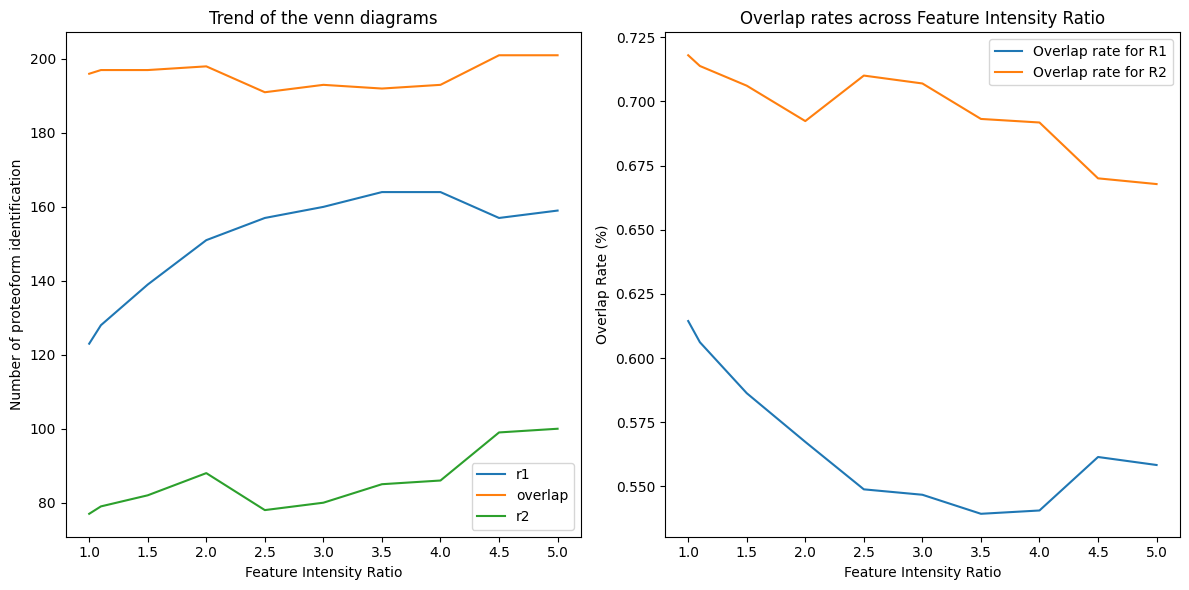

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

r1 = [123, 128, 139, 151, 157, 160, 164, 164, 157, 159]
overlap = [196, 197, 197, 198, 191, 193, 192, 193, 201, 201]
r2 = [77, 79, 82, 88, 78, 80, 85, 86, 99, 100]

x = [1, 1.1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

overlaprate1 = [o / (r1_val + o) for r1_val, o in zip(r1, overlap)]
overlaprate2 = [o / (r2_val + o) for r2_val, o in zip(r2, overlap)]

# Create a figure with side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot with r1, overlap, r2
sns.lineplot(x=x, y=r1, label='r1', ax=ax1)
sns.lineplot(x=x, y=overlap, label='overlap', ax=ax1)
sns.lineplot(x=x, y=r2, label='r2', ax=ax1)
ax1.set_title('Trend of the venn diagrams')
ax1.set_xlabel('Feature Intensity Ratio')
ax1.set_ylabel('Number of proteoform identification')

# Second plot with the generated lists
sns.lineplot(x=x, y=overlaprate1, label='Overlap rate for R1', ax=ax2)
sns.lineplot(x=x, y=overlaprate2, label='Overlap rate for R2', ax=ax2)
ax2.set_title('Overlap rates across Feature Intensity Ratio')
ax2.set_xlabel('Feature Intensity Ratio')
ax2.set_ylabel('Overlap Rate (%)')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np

dir = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/"

msdeplex = pd.read_csv(dir + "merged_results.tsv", sep="\t")
toppic = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2_toppic_proteoform_single.tsv", sep="\t", skiprows=26)

r1 = toppic
r2 = msdeplex

r1["Origin"] = 1
r2["Origin"] = 2

combined = pd.concat([r1, r2], ignore_index=True)

combined.sort_values(by="E-value")

combined["1"] = np.where(combined["Origin"] == 1, True, False)
combined["2"] = np.where(combined["Origin"] == 2, True, False)

resultlist = pd.DataFrame(columns=combined.columns).astype(combined.dtypes)

for i, row in combined.iterrows():
    is_duplicate = False
    for j, result in resultlist.iterrows():
        if row['Protein accession'] == result['Protein accession'] and abs(row['Precursor mass'] - result['Precursor mass']) < 1.2:
            if row["Origin"] == 1:
                resultlist.loc[j, "1"] = True
            elif row["Origin"] == 2:
                resultlist.loc[j, "2"] = True
            is_duplicate = True
            break
    
    if not is_duplicate:
        resultlist.loc[0 if pd.isnull(resultlist.index.max()) else resultlist.index.max() + 1] = row

# Calculate the sizes for the Venn diagram
# only_set1 = resultlist[(resultlist["1"] == True) & (resultlist["2"] == False)]
only_set2 = resultlist[(resultlist["1"] == False) & (resultlist["2"] == True)]
# intersection = resultlist[(resultlist["1"] == True) & (resultlist["2"] == True)]

newproteoforms = only_set2.drop(columns=["Origin", "1", "2"])
newproteoforms

replicate1 = msdeplex
replicate2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_3_MSDeplex/merged_results.tsv", sep="\t")

r1 = replicate1
r2 = replicate2

r1["Origin"] = 1
r2["Origin"] = 2

combined = pd.concat([r1, r2], ignore_index=True)

combined.sort_values(by="E-value")

combined["1"] = np.where(combined["Origin"] == 1, True, False)
combined["2"] = np.where(combined["Origin"] == 2, True, False)

resultlist = pd.DataFrame(columns=combined.columns).astype(combined.dtypes)

for i, row in combined.iterrows():
    is_duplicate = False
    for j, result in resultlist.iterrows():
        if row['Protein accession'] == result['Protein accession'] and abs(row['Precursor mass'] - result['Precursor mass']) < 1.2:
            if row["Origin"] == 1:
                resultlist.loc[j, "1"] = True
            elif row["Origin"] == 2:
                resultlist.loc[j, "2"] = True
            is_duplicate = True
            break
    
    if not is_duplicate:
        resultlist.loc[0 if pd.isnull(resultlist.index.max()) else resultlist.index.max() + 1] = row

# Calculate the sizes for the Venn diagram
only_set1 = resultlist[(resultlist["1"] == True) & (resultlist["2"] == False)]
# only_set2 = resultlist[(resultlist["1"] == False) & (resultlist["2"] == True)]
intersection = resultlist[(resultlist["1"] == True) & (resultlist["2"] == True)]

interestset = pd.concat([only_set1, intersection], ignore_index=True)

result = newproteoforms.merge(interestset, on=["Protein accession", "Precursor mass"], how="left")

print(result.shape[0], result[result["2"] == True].shape[0] / result.shape[0])

result.to_csv(dir + "newproteoformoverlapanalysis.tsv", sep="\t", index=False)

397 0.345088161209068


In [13]:
import pandas as pd
import read_msalign

newproteoforms = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/newproteoformoverlapanalysis.tsv", sep="\t")

results = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/Result_final.tsv", sep="\t")

results = results[~((results["F1 Con"] == "True") & (results["F2 Con"] == "True") & (results["A+B_1 peaks"] + results["A+B_2 peaks"] == results["B+A_1 peaks"] + results["B+A_2 peaks"]))]

interestset = newproteoforms.merge(results["Scan"], left_on="Scan(s)_x", right_on="Scan", how="left")

interestset.dropna(subset="Scan").to_csv("interestset.tsv", sep="\t", index=False)

In [57]:
def drop_custom_duplicates(group):
    threshold = 1.2

    group["Single"] = "True"

    # Sort the group by E-value to prioritize rows with the lowest value in E-value
    group = group.sort_values(by='E-value')
    
    # Initialize a list to store indices of rows to keep
    keep_indices = []

    # Iterate through the sorted group
    for index, row in group.iterrows():
        # Check if this row is a duplicate of any previously kept row
        is_duplicate = False
        for keep_index in keep_indices:
            if abs(row['Precursor mass'] - group.loc[keep_index, 'Precursor mass']) < threshold:
                is_duplicate = True
                group.loc[keep_index, "Single"] = "False"
                break
        # If not a duplicate, add it to the list of indices to keep
        if not is_duplicate:
            keep_indices.append(index)
    
    # Return only the rows to keep
    return group.loc[keep_indices]

def calculate_q_values(df):
    """
    Calculates q-values for a target-decoy search.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing protein accession and score columns.
    protein_column (str): The name of the column containing protein accession data (default: 'Protein accession').
    score_column (str): The name of the column containing identification scores (default: 'Score').
    decoy_identifier (str): The string that identifies decoy entries in the protein accession column (default: 'DECOY').
    
    Returns:
    pd.DataFrame: DataFrame with additional columns for cumulative decoy/target counts, FDR, and q-values.
    """
    # Copy the input DataFrame to avoid modifying the original data
    df = df.copy()

    # Add a column to indicate if the protein is a decoy
    df['IsDecoy'] = df["Protein accession"].str.contains("DECOY")

    # Sort by score (assuming higher score means better identification)
    df = df.sort_values(by="E-value")

    # Initialize counters for decoy and target counts
    df['Cumulative_Decoy'] = df['IsDecoy'].cumsum()
    df['Cumulative_Target'] = (~df['IsDecoy']).cumsum()

    # Calculate FDR: FDR = (# decoys / # total)
    df['FDR'] = df['Cumulative_Decoy'] / (df['Cumulative_Decoy'] + df['Cumulative_Target'])

    # Calculate q-value: the minimum FDR at or above this score
    df['q-value'] = df['FDR'][::-1].cummin()[::-1]  # Reverse cummin to get the minimum FDR for each score

    df.sort_index()

    return df["q-value"]

In [59]:
import pandas as pd

df = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/Result_final.tsv", sep="\t")

modifieddf = df[~(df["A+B_1"] == df["B+A_1"])]

modifieddf = modifieddf[modifieddf["choice"] == "B"]

# modifieddf = modifieddf[~(modifieddf["A+B_1"] == "-")]

scanlist = modifieddf["Scan"].tolist()

rawtoppicprsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
rawtoppicproteoform = rawtoppicprsm.sort_values(by='E-value').drop_duplicates(subset='Feature ID', keep='first').groupby('Protein accession', group_keys=False).apply(drop_custom_duplicates).sort_values(by="Scan(s)")

rawtoppicprsm["Spectrum-level Q-value"] = calculate_q_values(rawtoppicprsm)
rawtoppicproteoform["Proteoform-level Q-value"] = calculate_q_values(rawtoppicproteoform)

toppicprsm = rawtoppicprsm[(rawtoppicprsm["Spectrum-level Q-value"] < 0.01)].sort_values(by="Scan(s)")
toppicproteoform = rawtoppicproteoform[(rawtoppicproteoform["Proteoform-level Q-value"] < 0.01)].sort_values(by="Scan(s)")

toppicprsm = toppicprsm[~(toppicprsm["Protein accession"].str.contains("DECOY"))]
toppicproteoform = toppicproteoform[~(toppicproteoform["Protein accession"].str.contains("DECOY"))]
print(toppicproteoform.shape[0])

toppicscanlist = toppicprsm[toppicprsm["Scan(s)"].isin(scanlist)]["Scan(s)"].tolist()

deplexprsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/prsm1.tsv", sep="\t")

sharedlist = deplexprsm[deplexprsm["Scan(s)"].isin(toppicscanlist)]["Scan(s)"].tolist()

print(len(sharedlist))

# toppicproteoform[(toppicproteoform["Scan(s)"].isin(sharedlist)) & (toppicproteoform["Single"] == "False")]

# dropbyfeature = rawtoppicprsm.sort_values(by='E-value').drop_duplicates(subset='Feature ID', keep='first')

# dropbyfeature[dropbyfeature["Scan(s)"].isin(sharedlist)]

headproteoforms = toppicproteoform[toppicproteoform["Scan(s)"].isin(sharedlist)]["Scan(s)"].tolist()

filteredproteoform = rawtoppicprsm[~(rawtoppicprsm["Scan(s)"].isin(sharedlist))].sort_values(by='E-value').drop_duplicates(subset='Feature ID', keep='first').groupby('Protein accession', group_keys=False).apply(drop_custom_duplicates).sort_values(by="Scan(s)")

filteredproteoform["Proteoform-level Q-value"] = 0
filteredproteoform["Proteoform-level Q-value"] = calculate_q_values(filteredproteoform)
filteredproteoform = filteredproteoform[(filteredproteoform["Proteoform-level Q-value"] < 0.01)].sort_values(by="Scan(s)")
filteredproteoform = filteredproteoform[~(filteredproteoform["Protein accession"].str.contains("DECOY"))]
filteredproteoform




2059
264


/tmp/ipykernel_4873/3505956306.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rawtoppicproteoform = rawtoppicprsm.sort_values(by='E-value').drop_duplicates(subset='Feature ID', keep='first').groupby('Protein accession', group_keys=False).apply(drop_custom_duplicates).sort_values(by="Scan(s)")


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value,Single
4614,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,4614,5063,HCD,6875,3032.07,48,3,2901.59896,2901.600416,...,NaN,0,NaN,-,15,12,0.00001,0.0,0.0,False


In [52]:
deplexproteoform = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/proteoform1.tsv", sep="\t")
print(deplexproteoform.shape[0])

result_a = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=26)
result_b = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=26)

scanlist = []
rawdeplexprsm = pd.DataFrame(columns=result_a.columns).astype(result_a.dtypes)
for index, row in df.iterrows():
    scan = row["Scan"]
    if int(scan) not in scanlist:
        o1 = pd.Series()

        A1 = result_a[result_a["Scan(s)"] == scan]
        B1 = result_b[result_b["Scan(s)"] == scan]
        
        if (row["choice"] == "-"):
            o1 = A1.iloc[0]
        elif ((row["choice"] == "A")):
            if A1.shape[0] > 0:
                o1 = A1.iloc[0]
        elif (row["choice"] == "B"):
            if B1.shape[0] > 0:
                o1 = B1.iloc[0]

        if not o1.empty:
            rawdeplexprsm.loc[0 if pd.isnull(rawdeplexprsm.index.max()) else rawdeplexprsm.index.max() + 1] = o1
    # else:
    #     A1 = result_a[result_a["Scan(s)"] == scan]
    #     if A1.shape[0] > 0:
    #         output1.loc[0 if pd.isnull(output1.index.max()) else output1.index.max() + 1] = A1.iloc[0]

print(df.shape[0])
filtereddeplexproteoform = rawdeplexprsm[~(rawdeplexprsm["Scan(s)"].isin(sharedlist))].sort_values(by='E-value').drop_duplicates(subset='Feature ID', keep='first').groupby('Protein accession', group_keys=False).apply(drop_custom_duplicates).sort_values(by="Scan(s)")

filtereddeplexproteoform["Proteoform-level Q-value"] = 0
filtereddeplexproteoform["Proteoform-level Q-value"] = calculate_q_values(filtereddeplexproteoform)
filtereddeplexproteoform = filtereddeplexproteoform[(filtereddeplexproteoform["Proteoform-level Q-value"] < 0.01)].sort_values(by="Scan(s)")
filtereddeplexproteoform = filtereddeplexproteoform[~(filtereddeplexproteoform["Protein accession"].str.contains("DECOY"))]
filtereddeplexproteoform


2150
6092


/tmp/ipykernel_4873/1124164345.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtereddeplexproteoform = rawdeplexprsm[~(rawdeplexprsm["Scan(s)"].isin(sharedlist))].sort_values(by='E-value').drop_duplicates(subset='Feature ID', keep='first').groupby('Protein accession', group_keys=False).apply(drop_custom_duplicates).sort_values(by="Scan(s)")


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
1,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,1,249,HCD,1095,1078.69,41,9,5707.03881,5707.14881,...,1,+110.2700:[32-49],0,NaN,-,11,6,0.01866,0.001182,0.003897
5,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,4,253,HCD,1100,1080.73,39,7,4434.53873,4435.49608,...,1,+354.2906:[12-29],0,NaN,-,10,6,0.056719,0.004804,0.007907
14,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,12,269,HCD,1120,1088.99,61,7,6054.09513,6055.07748,...,1,+384.1531:[1-2],0,NaN,-,14,9,0.002852,0.000253,0.000515
26,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,23,305,HCD,1164,1106.58,30,11,6631.64594,6631.70094,...,1,+56.0189:[25-34],0,NaN,-,5,5,0.012841,0.001196,0.002979
43,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,35,337,HCD,1203,1121.93,84,9,5389.0302,5388.022966,...,0,NaN,0,NaN,-,6,5,0.002963,0.000253,0.000515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6057,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,4461,6735,HCD,8882,3748.55,42,3,2770.28287,2770.286137,...,0,NaN,0,NaN,-,7,5,0.000211,0.0,0.000000
6059,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5949,6737,HCD,8884,3749.01,15,2,2338.12945,2338.132871,...,0,NaN,0,NaN,-,9,9,0.000292,0.0,0.000000
6060,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5950,6738,HCD,8886,3750.25,37,3,3038.3635,3038.367994,...,0,NaN,0,NaN,-,9,9,0.0,0.0,0.000000
6064,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5952,6746,HCD,8895,3753.19,33,4,3578.69253,3578.695141,...,0,NaN,0,NaN,-,7,6,0.0,0.0,0.000000


In [30]:
import pandas as pd
import numpy as np

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm = prsm[prsm["E-value"] < 0.01]

filteredprsm = prsm.sort_values(["Feature ID", "E-value", "Protein accession"]).drop_duplicates(subset=["Feature ID", "Protein accession"], keep="first")

# filteredprsm.to_csv("FeatureID.tsv", sep="\t", index=False)

scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")

# filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].to_csv("Scan.tsv", sep="\t", index=False)

otherprsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

otherprsm = otherprsm[(otherprsm["Scan(s)"].isin(scanlist)) & (otherprsm["E-value"] < 0.01)]

joined = filteredprsm.merge(otherprsm, on="Scan(s)", how="inner")

joined[(joined["Protein accession_x"] == joined["Protein accession_y"]) & (joined["E-value_x"] < joined["E-value_y"])]

# otherprsm.to_csv("otherscan.tsv", sep="\t", index=False)

# otherprsm[otherprsm["Scan(s)"] == 4371]

# sharedlist = otherprsm["Scan(s)"].tolist()

# prsmfiltered = prsm[prsm["Scan(s)"].isin(sharedlist)].sort_values(by="Scan(s)").reset_index()

# prsmfiltered["Delta E-value"] = np.log10(otherprsm["E-value"]) - np.log10(prsmfiltered["E-value"])

# prsmfiltered







# df_sorted.groupby('Feature ID')

# # For groups with size >= 2, return the 'Scan(s)' column for each row excluding the first row
# result = grouped.apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

/tmp/ipykernel_7190/1840675852.py:12: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)
/tmp/ipykernel_7190/1840675852.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)


,Data file name_x,Prsm ID_x,Spectrum ID_x,Fragmentation_x,Scan(s),Retention time_x,#peaks_x,Charge_x,Precursor mass_x,Adjusted precursor mass_x,...,#unexpected modifications_y,unexpected modifications_y,#variable PTMs_y,variable PTMs_y,MIScore_y,#matched peaks_y,#matched fragment ions_y,E-value_y,Spectrum-level Q-value_y,Proteoform-level Q-value_y
4,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,2158,2542,HCD,3849,2003.47,85,6,5116.63520,5116.635698,...,1,-214.9381:[31-34],0,NaN,-,9,9,4.701725e-03,0.0,0.0
7,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,2744,3130,HCD,4555,2240.38,67,5,4026.99162,4026.004270,...,1,-127.0664:[1-2],0,NaN,-,14,14,3.635082e-05,0.0,0.0
13,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,1923,2306,HCD,3566,1908.81,99,7,5967.14078,5968.208130,...,1,+267.4562:[35-42],0,NaN,-,16,13,9.776596e-04,0.0,0.0
32,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,4519,4960,HCD,6751,2988.95,72,4,4335.21481,4335.299810,...,1,+100.1094:[41],0,NaN,-,20,15,8.684294e-07,0.0,0.0
65,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,4885,5367,HCD,7239,3159.42,49,6,6838.15502,6838.290020,...,0,NaN,0,NaN,-,14,13,1.256675e-05,0.0,0.0


In [5]:
import read_msalign

speclist = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2.msalign")

featureID_dict = {
    801: 0,
    1498: 0,
    6142: 0,
    2527: 0,
    1936: 0,
    10085: 0,
    4908: 0,
    1821: 0,
    3889: 0,
    1519: 0,
    3429: 0,
    2044: 0,
    8909: 0,
    5973: 0,
    8310: 0,
    11553: 0,
    9434: 0,
    13123: 0,
    12683: 0,
    14205: 0,
    14571: 0,
    15342: 0,
    12674: 0
}

for spec in speclist:
    if not spec.header.pre_id_list[0] == "" and int(spec.header.pre_id_list[0]) in featureID_dict.keys():
        featureID_dict[int(spec.header.pre_id_list[0])] += 1
    if len(spec.header.pre_id_list) > 1 and int(spec.header.pre_id_list[1]) in featureID_dict.keys():
        featureID_dict[int(spec.header.pre_id_list[1])] += 1

print(featureID_dict)

{801: 2, 1498: 1, 6142: 1, 2527: 1, 1936: 2, 10085: 1, 4908: 4, 1821: 6, 3889: 6, 1519: 1, 3429: 3, 2044: 1, 8909: 1, 5973: 2, 8310: 1, 11553: 1, 9434: 6, 13123: 2, 12683: 1, 14205: 1, 14571: 7, 15342: 3, 12674: 3}


In [28]:
import read_msalign
import copy
import json

def getMatchedPeaks(prsmID, dir, spec):
    with open(dir + "prsm" + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        matched_list = []
        nonmatched_list = []
        if len(spec.peak_list) == 1:
            matched_list.append(copy.deepcopy(spec.peak_list[0]))
        else:
            for idx in range(0, len(peak_list)):
                if "matched_ions" in peak_list[idx]:
                    matched_list.append(copy.deepcopy(spec.peak_list[idx]))
                else:
                    nonmatched_list.append(copy.deepcopy(spec.peak_list[idx]))
        return matched_list, nonmatched_list

scans = [
    2307, 2429, 2921, 3231, 3450, 3566, 3625, 3677, 3691, 3704, 3729, 3782, 
    3849, 3900, 4013, 4070, 4109, 4235, 4262, 4275, 4295, 4332, 4353, 4371, 
    4419, 4441, 4484, 4555, 4599, 4737, 4746, 4827, 4845, 4957, 5055, 5169, 
    5245, 5342, 5372, 5430, 5481, 5820, 5903, 5909, 6021, 6035, 6071, 6201, 
    6252, 6255, 6405, 6573, 6603, 6725, 6751, 7107, 7127, 7158, 7239, 7470, 
    7485, 7523, 7652, 7681, 8619, 8643
]

a_dir = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/" + "A_html/toppic_prsm_cutoff/data_js/prsms/"
b_dir = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/" + "B_html/toppic_prsm_cutoff/data_js/prsms/"

result_a = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/" + "A_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=26)
result_b = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/" + "B_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=26)

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2.msalign")

spec_dict = {}
for spec in spec_list:
    spec_dict[str(spec.header.spec_scan)] = spec

data = {
    "Protein": [False] * len(scans),
    "Shared Peaks": [False] * len(scans)
}

df = pd.DataFrame(data, index=scans)
for scan in scans:
    df.loc[scan, "Protein"] = result_a[result_a["Scan(s)"] == int(scan)].iloc[0]["Protein accession"] == result_b[result_b["Scan(s)"] == int(scan)].iloc[0]["Protein accession"]

    main_spec = copy.deepcopy((spec_dict[str(scan)]))
    matchedList_a, nonMatchedList = getMatchedPeaks(result_a[result_a["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], a_dir, main_spec)
    matchedList_b, nonMatchedList = getMatchedPeaks(result_b[result_b["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], b_dir, main_spec)

    seta = set(matchedList_a)
    setb = set(matchedList_b)

    df.loc[scan, "Shared Peaks"] = len(seta.intersection(setb)) / min(float(len(seta)), float(len(setb))) >= 0.65

df

,Protein,Shared Peaks
2307,True,True
2429,True,True
2921,False,False
3231,False,False
3450,True,True
...,...,...
7523,True,True
7652,False,False
7681,True,True
8619,True,True


In [11]:
import pandas as pd
import read_msalign

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm = prsm[(prsm["E-value"] < 0.01) & ~(prsm["Protein accession"].str.contains("DECOY"))]

grouped = prsm.groupby("Feature ID")
consistent_groups = grouped.filter(lambda x: x["Protein accession"].nunique() == 1)

grouped_again = consistent_groups.groupby(["Feature ID", "Protein accession"])
filtered_groups = grouped_again.filter(lambda x: len(x) > 1)

unique_feature_ids_count = filtered_groups["Feature ID"].nunique()
print(unique_feature_ids_count)

scan_list = filtered_groups["Scan(s)"].tolist()

spec_list = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2.msalign")

possiblelist = [spec for spec in spec_list if spec.header.spec_scan in scan_list]

print(len(possiblelist))

masslist = []

for spec in possiblelist:
    masslist.append(float(spec.header.pre_mass_list[0]))

averagemass = sum(masslist) / len(masslist)

outputlist = []
for spec in possiblelist:
    if abs(float(spec.header.pre_mass_list[0]) - averagemass) < 500:
        continue
     
    spec.header.pre_mz_list = spec.header.pre_mz_list[:1]
    spec.header.pre_charge_list = spec.header.pre_charge_list[:1]
    spec.header.pre_mass_list = spec.header.pre_mass_list[:1]
    spec.header.pre_inte_list = spec.header.pre_inte_list[:1]
    spec.header.pre_id_list = spec.header.pre_id_list[:1]

    spec.header.pre_mass_list.append(str(averagemass))
    spec.header.pre_charge_list.append(spec.header.pre_charge_list[0])
    spec.header.pre_mz_list.append(str(averagemass / int(spec.header.pre_charge_list[1])))
    spec.header.pre_inte_list.append(spec.header.pre_inte_list[0])
    spec.header.pre_id_list.append("-1")

    outputlist.append(spec)

print(len(outputlist))

read_msalign.write_spec_file("simulation_ms2.msalign", outputlist)

942
2892
2405


In [90]:
import pandas as pd
import numpy as np

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/testinsideiso/new/Yeast_1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm = prsm[prsm["E-value"] < 0.01]

newuniquefeatures = prsm.drop_duplicates("Feature ID")["Feature ID"].tolist()

print(prsm.drop_duplicates("Feature ID").shape[0])

filteredprsm = prsm.sort_values(["Feature ID", "E-value", "Protein accession"]).drop_duplicates(subset=["Feature ID", "Protein accession"], keep="first")

# # filteredprsm.to_csv("FeatureID.tsv", sep="\t", index=False)

scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

print(len(scanlist))

filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")

1941
76


/tmp/ipykernel_7804/3357113800.py:16: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)
/tmp/ipykernel_7804/3357113800.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
2783,../../../../data/zwang64/yeast/test/Yeast_1_ms...,2783,3167,HCD,4599,2254.87,82,7,4932.44810,4932.543100,...,1,-387.1272:[21-30],0,NaN,-,17,13,1.118224e-04,0.000000,0.0
3316,../../../../data/zwang64/yeast/test/Yeast_1_ms...,3316,3705,HCD,5245,2472.81,75,5,4613.25242,4613.342420,...,1,-440.1966:[31-49],0,NaN,-,20,14,6.998942e-05,0.000000,0.0
1829,../../../../data/zwang64/yeast/test/Yeast_1_ms...,1829,2209,HCD,3450,1871.65,92,8,5527.94083,5528.050830,...,1,+365.3472:[32-48],0,NaN,-,23,18,5.940262e-09,0.000000,0.0
2161,../../../../data/zwang64/yeast/test/Yeast_1_ms...,2161,2542,HCD,3849,2003.47,85,6,5116.63520,5116.635698,...,0,NaN,0,NaN,-,25,21,9.853335e-17,0.000000,0.0
3161,../../../../data/zwang64/yeast/test/Yeast_1_ms...,3161,3548,HCD,5057,2409.80,74,5,4467.32942,4466.367192,...,0,NaN,0,NaN,-,17,13,8.452394e-06,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,../../../../data/zwang64/yeast/test/Yeast_1_ms...,4982,5468,HCD,7361,3203.30,60,5,5181.70167,5181.706027,...,0,NaN,0,NaN,-,9,8,5.081438e-04,0.000000,0.0
5033,../../../../data/zwang64/yeast/test/Yeast_1_ms...,5033,5521,HCD,7424,3225.55,61,3,3020.52415,3019.486800,...,1,-409.1957:[22-30],0,NaN,-,6,6,1.691676e-03,0.000255,0.0
4952,../../../../data/zwang64/yeast/test/Yeast_1_ms...,4952,5433,HCD,7319,3188.12,56,5,5561.46912,5561.579120,...,1,-219.2227:[1-17],0,NaN,-,9,9,1.206381e-05,0.000000,0.0
5537,../../../../data/zwang64/yeast/test/Yeast_1_ms...,5537,6094,HCD,8112,3471.80,36,4,3620.93425,3621.004250,...,1,+419.2757:[19-31],0,NaN,-,13,12,2.946908e-04,0.000000,0.0


In [23]:
import pandas as pd
import numpy as np

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

# prsm = prsm[prsm["E-value"] < 0.01]

oldfeaturelist = prsm.drop_duplicates("Feature ID")["Feature ID"].tolist()

print(prsm.drop_duplicates("Feature ID").shape[0])

filteredprsm = prsm.sort_values(["Feature ID", "E-value", "Protein accession"]).drop_duplicates(subset=["Feature ID", "Protein accession"], keep="first")

# # filteredprsm.to_csv("FeatureID.tsv", sep="\t", index=False)

scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

print(len(scanlist))

filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")

# # filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].to_csv("Scan.tsv", sep="\t", index=False)

# otherprsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

# otherprsm = otherprsm[(otherprsm["Scan(s)"].isin(scanlist)) & (otherprsm["E-value"] < 0.01)]

# joined = filteredprsm.merge(otherprsm, on="Scan(s)", how="inner")

# joined[(joined["Protein accession_x"] == joined["Protein accession_y"]) & (joined["E-value_x"] < joined["E-value_y"])]

# otherprsm.to_csv("otherscan.tsv", sep="\t", index=False)

# otherprsm[otherprsm["Scan(s)"] == 4371]

# sharedlist = otherprsm["Scan(s)"].tolist()

# prsmfiltered = prsm[prsm["Scan(s)"].isin(sharedlist)].sort_values(by="Scan(s)").reset_index()

# prsmfiltered["Delta E-value"] = np.log10(otherprsm["E-value"]) - np.log10(prsmfiltered["E-value"])

# prsmfiltered







# df_sorted.groupby('Feature ID')

# # For groups with size >= 2, return the 'Scan(s)' column for each row excluding the first row
# result = grouped.apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

2147
148


/tmp/ipykernel_11361/2391317668.py:16: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)
/tmp/ipykernel_11361/2391317668.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
195,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,195,869,HCD,1842,1343.92,140,14,8413.35003,8412.427680,...,1,-489.1563:[70-82],0,NaN,-,10,10,0.094715,0.004484,0.009255
1888,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,1888,2977,HCD,4371,2178.32,53,4,3545.01121,3545.081210,...,1,-474.0153:[31-35],0,NaN,-,16,13,0.000002,0.000000,0.000000
2569,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,2569,3776,HCD,5330,2501.46,50,3,2292.24514,2292.290140,...,1,-1.8834:[1-2],0,NaN,-,13,10,0.031942,0.002098,0.000000
2052,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,2052,3167,HCD,4599,2254.87,82,7,4932.44810,4932.543100,...,1,-387.1272:[21-30],0,NaN,-,17,13,0.000112,0.000000,0.000000
2507,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,2507,3705,HCD,5245,2472.81,75,5,4613.25242,4613.342420,...,1,-440.1966:[31-49],0,NaN,-,20,14,0.000070,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,4348,6236,HCD,8282,3533.48,35,2,1747.98219,1748.959540,...,1,+69.1077:[14-15],0,NaN,-,4,6,0.080772,0.003611,0.007353
3867,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,3867,5500,HCD,7399,3216.69,40,3,3404.35156,3403.319210,...,1,-35.2705:[6-28],0,NaN,-,9,7,0.061809,0.003187,0.002112
7,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,7,302,HCD,1161,1105.89,70,11,6846.83685,6846.856850,...,1,+182.1449:[1],0,NaN,-,5,5,0.057754,0.002969,0.006442
3707,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,3707,5279,HCD,7134,3123.01,31,3,2857.46941,2857.471787,...,0,NaN,0,NaN,-,7,7,0.008901,0.001212,0.000000


In [24]:
import json
import copy

def getMatchedPeaks(prsmID, dir, spec):
    with open(dir + "prsm" + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        matched_list = []
        nonmatched_list = []
        if len(spec.peak_list) == 1:
            matched_list.append(copy.deepcopy(spec.peak_list[0]))
        else:
            for idx in range(0, len(peak_list)):
                if "matched_ions" in peak_list[idx]:
                    matched_list.append(copy.deepcopy(spec.peak_list[idx]))
                else:
                    nonmatched_list.append(copy.deepcopy(spec.peak_list[idx]))
        return matched_list, nonmatched_list

1786
1908
     Scan(s)  log_diff
636     3271 -5.305793
637     3277 -5.705778
638     3278 -8.535990
639     3279 -5.014349
640     3281 -5.940878
808     3864 -7.546117
868     4097 -7.073419
870     4104 -5.141880
-8.53598977273457


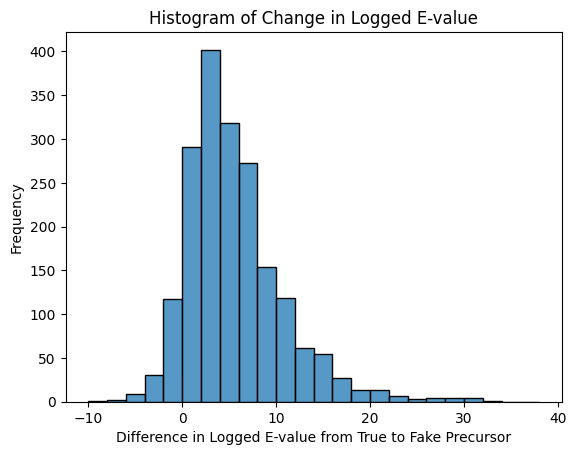

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import read_msalign


spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/simulation/new/simulation_ms2.msalign")

spec_dict = {}
for spec in spectra:
    spec_dict[str(spec.header.spec_scan)] = spec

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/simulation/new/simulation_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
dir = "/home/daniel/Desktop/datafiles/RealData/yeast/simulation/new/simulation_html/toppic_prsm_cutoff/data_js/prsms/"
trueprsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
truedir = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_html/toppic_prsm_cutoff/data_js/prsms/"

merge = prsm.merge(trueprsm, on="Scan(s)", how="left")

totalscans = merge["Scan(s)"].tolist()

sameproteinscans = merge[merge["Protein accession_x"] == merge["Protein accession_y"]]["Scan(s)"].tolist()

print(len(sameproteinscans))

for scan in totalscans:
    if scan not in sameproteinscans:
        matchedList_simulation, nonMatchedList = getMatchedPeaks(prsm[prsm["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], dir, spec_dict[str(scan)])
        matchedList_true, nonMatchedList = getMatchedPeaks(trueprsm[trueprsm["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], truedir, spec_dict[str(scan)])
        setsimulation = set(matchedList_simulation)
        settrue = set(matchedList_true)
        if (len(setsimulation.intersection(settrue)) / min(float(len(settrue)), float(len(setsimulation))) >= 0.8):
            sameproteinscans.append(scan)

print(len(sameproteinscans))

merge = merge[merge["Scan(s)"].isin(sameproteinscans)]

# Step 1: Apply log10 to both columns
merge['log_E-value_x'] = np.log10(merge['E-value_x'])
merge['log_E-value_y'] = np.log10(merge['E-value_y'])

# Step 2: Subtract logged values
merge['log_diff'] = merge['log_E-value_x'] - merge['log_E-value_y']

print(merge[(merge['log_diff'] < -5)][["Scan(s)", "log_diff"]])

bin_width = 2  # Adjust the bin width as desired
min_val = merge['log_diff'].min()
print(min_val)
max_val = merge['log_diff'].max()

# Create bins that are symmetrical around 0, with consistent width
bins = np.arange(min_val // bin_width * bin_width, max_val // bin_width * bin_width + bin_width, bin_width)

# Step 3: Create a histogram using seaborn
sns.histplot(merge['log_diff'], bins=bins, kde=False, edgecolor='black')

# Customize plot
plt.title('Histogram of Change in Logged E-value')
plt.xlabel('Difference in Logged E-value from True to Fake Precursor')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [73]:
import pandas as pd

result1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
result2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

result1 = result1[(result1["E-value"] < 0.01)]
result2 = result2[(result2["E-value"] < 0.01)]

spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2.msalign")

spec_dict = {}
for spec in spectra:
    spec_dict[str(spec.header.spec_scan)] = spec

dir_1 = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_html/toppic_prsm_cutoff/data_js/prsms/"
dir_2 = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_html/toppic_prsm_cutoff/data_js/prsms/"

merge = result1.merge(result2, on="Scan(s)", how="inner")

totalscans = merge["Scan(s)"].tolist()

sameproteinscans = merge[merge["Protein accession_x"] == merge["Protein accession_y"]]["Scan(s)"].tolist()

print(len(sameproteinscans))

for scan in totalscans:
    if scan not in sameproteinscans:
        matchedList_1, nonMatchedList = getMatchedPeaks(result1[result1["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], dir_1, spec_dict[str(scan)])
        matchedList_2, nonMatchedList = getMatchedPeaks(result2[result2["Scan(s)"] == int(scan)].iloc[0]["Prsm ID"], dir_2, spec_dict[str(scan)])
        set1 = set(matchedList_1)
        set2 = set(matchedList_2)
        if (len(set1.intersection(set2)) / min(float(len(set1)), float(len(set2))) >= 0.8):
            sameproteinscans.append(scan)

print(len(sameproteinscans))

merge = merge[merge["Scan(s)"].isin(sameproteinscans)]

# Step 1: Apply log10 to both columns
merge['log_E-value_x'] = np.log10(merge['E-value_x'])
merge['log_E-value_y'] = np.log10(merge['E-value_y'])

# Step 2: Subtract logged values
merge['log_diff'] = merge['log_E-value_x'] - merge['log_E-value_y']

print(len(merge[(merge['log_diff'] > 5)]))

currlist = merge[(merge['log_diff'] > 5)]["Scan(s)"].tolist()

1573
1613
58


In [78]:
setcurr = set(currlist)
setall = set(scanlist)

print(len(setall.intersection(setcurr)))

print(setcurr - setall)

16
{4097, 6657, 3206, 3207, 4104, 4105, 4106, 4107, 2965, 3864, 3621, 3241, 3756, 3245, 5168, 3249, 5042, 4659, 3257, 4796, 7613, 3776, 3783, 1865, 4941, 6864, 3281, 4307, 5972, 4310, 1752, 6746, 6750, 5473, 5474, 3692, 3693, 6767, 2161, 2420, 3320, 6013}


In [75]:
outputresult = pd.Series(result1.columns)

totalscanlist = result1["Scan(s)"].tolist()

outputresult = pd.concat([result1[~(result1["Scan(s)"].isin(currlist))], result2[result2["Scan(s)"].isin(currlist)]], ignore_index=True).sort_values(by="Scan(s)")

newfeatureID = outputresult.drop_duplicates("Feature ID")["Feature ID"].tolist()

print(outputresult.drop_duplicates("Feature ID").shape[0])

filteredprsm = outputresult.sort_values(["Feature ID", "E-value", "Protein accession"]).drop_duplicates(subset=["Feature ID", "Protein accession"], keep="first")

# # filteredprsm.to_csv("FeatureID.tsv", sep="\t", index=False)

scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

print(len(scanlist))

print(len(filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")))

1939
76
73


/tmp/ipykernel_7804/694792379.py:15: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)
/tmp/ipykernel_7804/694792379.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)


In [93]:
from matplotlib_venn import venn2

setold = set(oldfeaturelist)
setnew = set(newuniquefeatures)

interestingfeatures = setnew - setold

interestingfeatures

{358,
 560,
 1050,
 1727,
 2165,
 2492,
 2672,
 3215,
 3231,
 4678,
 5973,
 6143,
 7571,
 7575,
 8496,
 8625,
 8867,
 10374,
 10858,
 11611,
 12076,
 13123,
 14451,
 14545,
 14912,
 16067,
 16467,
 16985,
 18689,
 19142,
 19179}

In [95]:
features = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Feature ID'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

set(interestingfeatures).intersection(set(features))

/tmp/ipykernel_7804/2566201855.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  features = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Feature ID'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)
/tmp/ipykernel_7804/2566201855.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Feature ID'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)


{14451}

2011 141


/tmp/ipykernel_1765291/2517195971.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df.groupby('group')['multiplexed'].mean()


0.2101477975312969


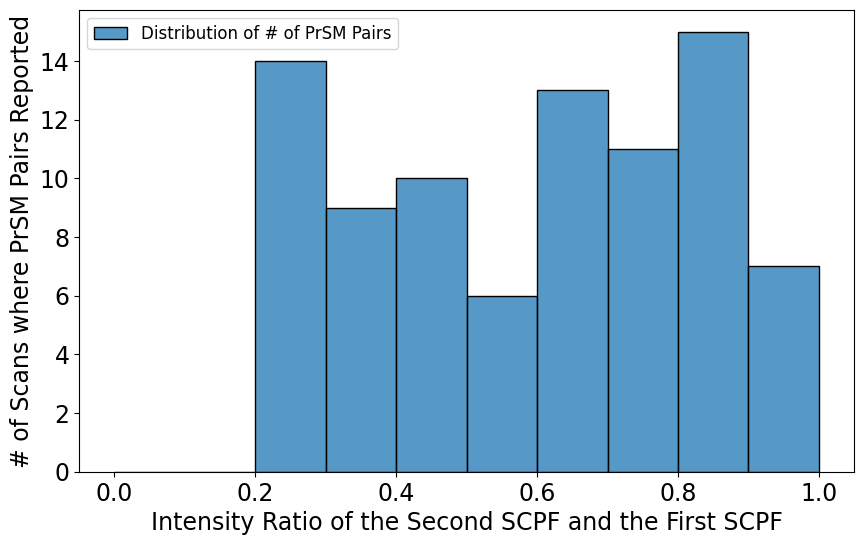

In [3]:
def calculate_q_values(df):
    """
    Calculates q-values for a target-decoy search.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing protein accession and score columns.
    protein_column (str): The name of the column containing protein accession data (default: 'Protein accession').
    score_column (str): The name of the column containing identification scores (default: 'Score').
    decoy_identifier (str): The string that identifies decoy entries in the protein accession column (default: 'DECOY').
    
    Returns:
    pd.DataFrame: DataFrame with additional columns for cumulative decoy/target counts, FDR, and q-values.
    """
    # Copy the input DataFrame to avoid modifying the original data
    df = df.copy()

    # Add a column to indicate if the protein is a decoy
    df['IsDecoy'] = df["Protein accession"].str.contains("DECOY")

    # Sort by score (assuming higher score means better identification)
    df = df.sort_values(by="E-value")

    # Initialize counters for decoy and target counts
    df['Cumulative_Decoy'] = df['IsDecoy'].cumsum()
    df['Cumulative_Target'] = (~df['IsDecoy']).cumsum()

    # Calculate FDR: FDR = (# decoys / # total)
    df['FDR'] = df['Cumulative_Decoy'] / (df['Cumulative_Decoy'] + df['Cumulative_Target'])

    # Calculate q-value: the minimum FDR at or above this score
    df['q-value'] = df['FDR'][::-1].cummin()[::-1]  # Reverse cummin to get the minimum FDR for each score

    df.sort_index()

    return df["q-value"]

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex_fdr0.01/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)
r2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex_fdr0.01/AB_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

print(r1.shape[0], r2.shape[0])

pairs = r1.merge(r2, on="Scan(s)", how="inner")

print(pairs.shape[0])

scans = pairs["Scan(s)"].tolist()

df = pd.DataFrame({
    'scan': pd.Series(dtype='int'),
    'multiplexed': pd.Series(dtype='bool'),
    'ratio': pd.Series(dtype='float')
})

spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_MSDeplex/A_ms2.msalign")

totalscans = [int(spec.header.spec_scan) for spec in spectra]

multiplexed = [True if int(spec.header.spec_scan) in scans else False for spec in spectra]

ratio = [float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]) if not (spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0)) else 0 for spec in spectra]

df["scan"] = totalscans
df["multiplexed"] = multiplexed
df["ratio"] = ratio

# Define the bins for the ratio column
bins = np.linspace(0, 1, 11)  # 10 bins from 0 to 1 (inclusive)
labels = [f"{round(bins[i], 1)} - {round(bins[i+1], 1)}" for i in range(len(bins) - 1)]

# Add a 'group' column to categorize each row into the appropriate bin
df['group'] = pd.cut(df['ratio'], bins=bins, labels=labels, include_lowest=True)

# Calculate the proportion of True values in the 'multiplexed' column for each group
proportions = df.groupby('group')['multiplexed'].mean()

# Convert the proportions into a list
proportions_list = proportions.tolist()

# Display the resulting list of proportions
proportions_list

proportions_percentage = [p * 100 for p in proportions_list]


outputdf = df[df["multiplexed"] == True]

print(outputdf['ratio'].min())

fig, ax1 = plt.subplots(figsize=(10, 6))

bins = np.arange(0.0, 1.1, 0.1)

sns.histplot(outputdf['ratio'], bins=bins, kde=False, edgecolor='black', label="Distribution of # of PrSM Pairs")

ax1.set_xlabel('Intensity Ratio of the Second SCPF and the First SCPF')
ax1.set_ylabel('# of Scans where PrSM Pairs Reported')
# ax1.set_title('Histogram of Ratio with Proportion of Multiplexed=True')

# bin_centers = np.arange(0.25, 1.05, 0.1)

# ax2 = ax1.twinx()
# ax2.plot(bin_centers, proportions_percentage[2:], color='red', label="Distribution of % of PrSM Pairs")
# ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))
# ax2.set_ylabel("% of Scans where PrSM Pairs Reported")

plt.rcParams.update({'font.size': 17})

lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1, labels_1, loc='upper left', fontsize=12)

plt.savefig("PrSM Pairs vs Intensity Ratio.svg", format="svg", dpi=800)
plt.savefig("PrSM Pairs vs Intensity Ratio.png", format="png", dpi=800)

plt.show()



In [85]:
import pandas as pd
import read_msalign
import random
import copy

random.seed(0)

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", sep="\t")
spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2.msalign")

r1 = r1[r1["E-value"] < 10E-6]

print(r1.shape[0])

multiplexscans = [int(spec.header.spec_scan) for spec in spectra if (not (spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0))) and (float(spec.header.pre_inte_list[0]) / sum(map(float, spec.header.pre_inte_list)) > 0.85)]

r1 = r1[r1["Scan(s)"].isin(multiplexscans)]

print(r1.shape[0])

match = r1[r1["#unexpected modifications"] == 0]["Scan(s)"].tolist()
shift = r1[r1["#unexpected modifications"] == 1]["Scan(s)"].tolist()

print(len(match), len(shift))


matcherror = []
shifterror = []
for spec in spectra:
    if int(spec.header.spec_scan) in r1["Scan(s)"].tolist():
        modifiedspec = copy.deepcopy(spec)
        
        modifiedspec.header.pre_charge_list[0] = str(int(modifiedspec.header.pre_charge_list[0]) + random.choice([1, -1]))
        modifiedspec.header.pre_mass_list[0] = str(float(modifiedspec.header.pre_mz_list[0]) * int(modifiedspec.header.pre_charge_list[0]) + 79.966)

        if int(spec.header.spec_scan) in match:
            matcherror.append(modifiedspec)
        elif int(spec.header.spec_scan) in shift:
            shifterror.append(modifiedspec)
        else:
            print("What? smn is wrong")

read_msalign.write_spec_file("matcherror_ms2.msalign", matcherror)
read_msalign.write_spec_file("shifterror_ms2.msalign", shifterror)

1094
358
199 159


112 47
112 47
110 47


/tmp/ipykernel_7823/265507902.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newmatchmerge["matched peaks diff"] = newmatchmerge["#matched peaks_x"] - newmatchmerge["#matched peaks_y"]
/tmp/ipykernel_7823/265507902.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newmatchmerge["matched ions diff"] = newmatchmerge["#matched fragment ions_x"] - newmatchmerge["#matched fragment ions_y"]
/tmp/ipykernel_7823/265507902.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

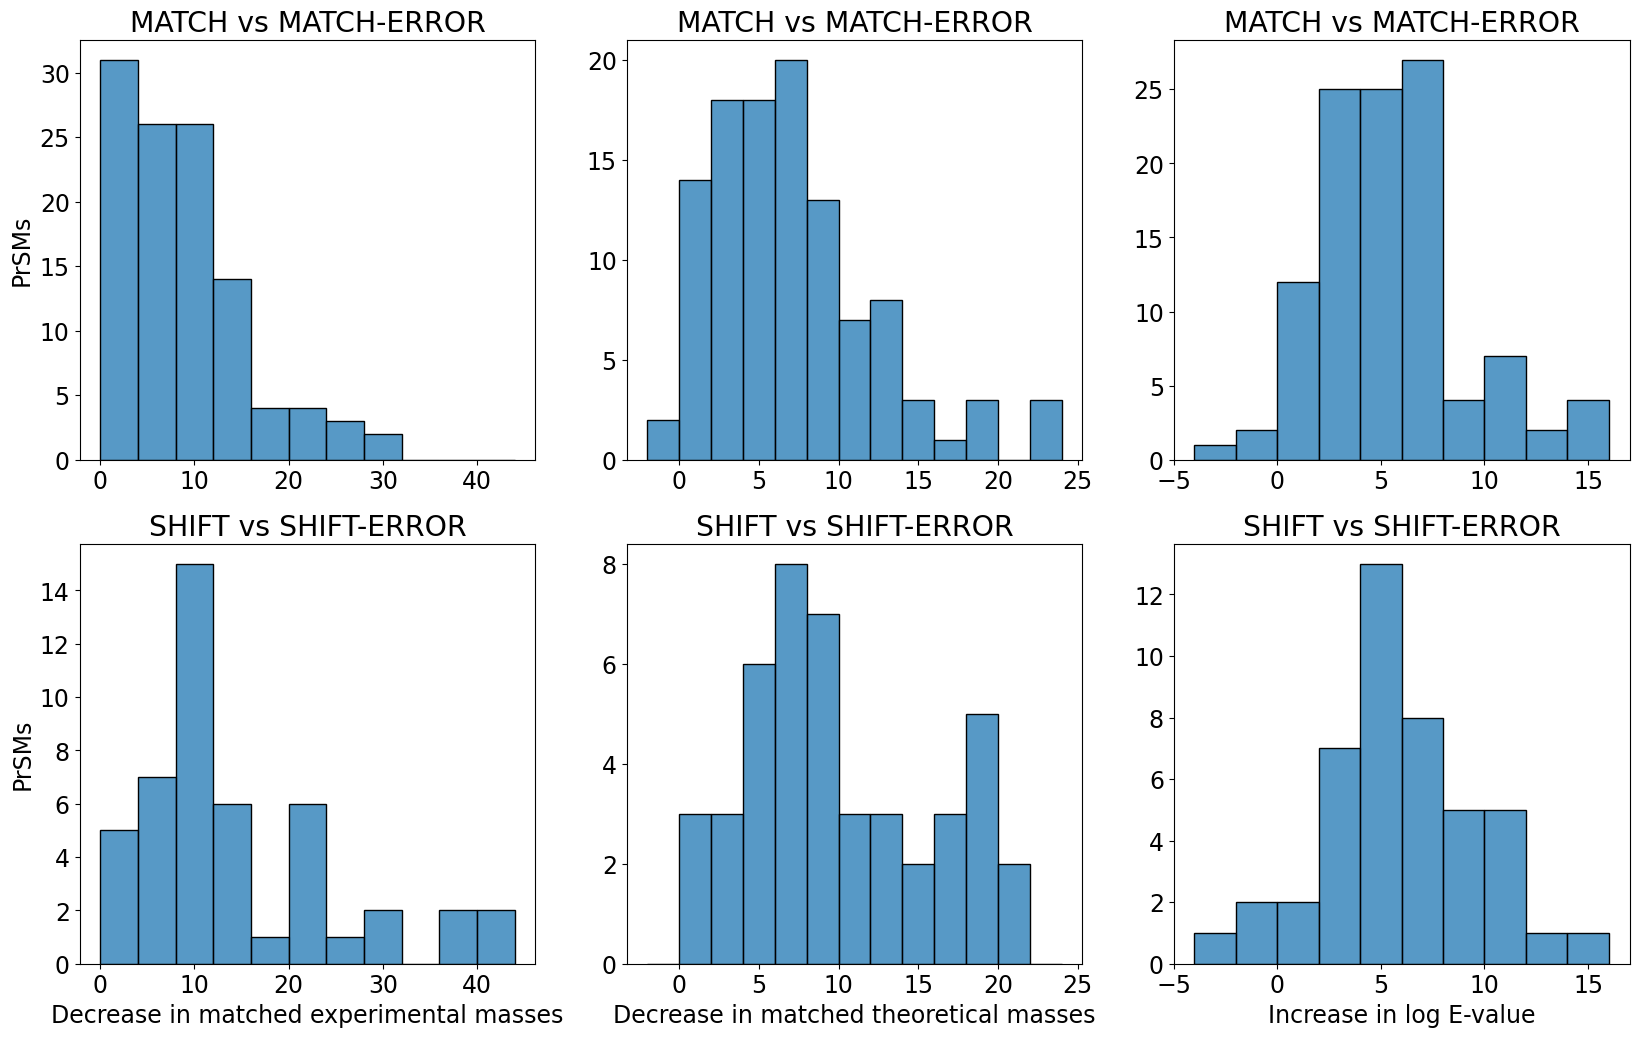

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

r1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", sep="\t")

matcherror = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/precursorselect/matcherror_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

shifterror = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/precursorselect/shifterror_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=29)

print(matcherror.shape[0], shifterror.shape[0])

matchmerge = r1.merge(matcherror, on="Scan(s)", how="inner")
shiftmerge = r1.merge(shifterror, on="Scan(s)", how="inner")

print(matchmerge.shape[0], shiftmerge.shape[0])

newmatchmerge = matchmerge[matchmerge["Protein accession_x"] == matchmerge["Protein accession_y"]]
newshiftmerge = shiftmerge[shiftmerge["Protein accession_x"] == shiftmerge["Protein accession_y"]]

print(newmatchmerge.shape[0], newshiftmerge.shape[0])

newmatchmerge["matched peaks diff"] = newmatchmerge["#matched peaks_x"] - newmatchmerge["#matched peaks_y"]
newmatchmerge["matched ions diff"] = newmatchmerge["#matched fragment ions_x"] - newmatchmerge["#matched fragment ions_y"]
newmatchmerge["E-value diff"] = np.log10(newmatchmerge["E-value_y"]) - np.log10(newmatchmerge["E-value_x"])
# print(newmatchmerge["matched peaks diff"].max())
newshiftmerge["matched peaks diff"] = newshiftmerge["#matched peaks_x"] - newshiftmerge["#matched peaks_y"]
newshiftmerge["matched ions diff"] = newshiftmerge["#matched fragment ions_x"] - newshiftmerge["#matched fragment ions_y"]
newshiftmerge["E-value diff"] = np.log10(newshiftmerge["E-value_y"]) - np.log10(newshiftmerge["E-value_x"])

# print(newshiftmerge["matched ions diff"].max())

# bins = np.arange(-2, 26, 2)

# fig, ax1 = plt.subplots(figsize=(10, 6))

# sns.histplot(r1merge['matched ions diff'], bins=bins, kde=False, edgecolor='black', alpha=0.6, label="Distribution of ECOLI-MATCH vs ECOLI ERROR")
# sns.histplot(shiftmerge['matched ions diff'], bins=bins, kde=False, edgecolor='black', alpha=0.6, label="Distribution of ECOLI-SHIFT vs ECOLI ERROR")

# plt.xlabel("Change in # of Matched Theoretical Fragments")
# plt.ylabel("# of PrSMs")
# # plt.legend(loc='upper left', fontsize=12)
plt.rcParams.update({'font.size': 17})

# Define bins for the histogram
# bins = np.arange(-2, 28, 2)

bins_col1 = np.arange(0, 44+1, 4)
bins_col2 = np.arange(-2, 24+1, 2)
bins_col3 = np.arange(-4, 16+1, 2)

# Create the subplots
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2, 3, figsize=(20, 12))

# Plot the histograms for the first column
sns.histplot(newmatchmerge['matched peaks diff'], ax=ax1, bins=bins_col1)
ax1.set_title("MATCH vs MATCH-ERROR")
ax1.set_ylabel("PrSMs")
ax1.set_xlabel("")

sns.histplot(newshiftmerge['matched peaks diff'], ax=ax4, bins=bins_col1)
ax4.set_title("SHIFT vs SHIFT-ERROR")
ax4.set_xlabel("Decrease in matched experimental masses")
ax4.set_ylabel("PrSMs")

# Plot the histograms for the second column
sns.histplot(newmatchmerge['matched ions diff'], ax=ax2, bins=bins_col2)
ax2.set_title("MATCH vs MATCH-ERROR")
ax2.set_ylabel("")
ax2.set_xlabel("")

sns.histplot(newshiftmerge['matched ions diff'], ax=ax5, bins=bins_col2)
ax5.set_title("SHIFT vs SHIFT-ERROR")
ax5.set_xlabel("Decrease in matched theoretical masses")
ax5.set_ylabel("")

# Plot the histograms for the third column
sns.histplot(newmatchmerge['E-value diff'], ax=ax3, bins=bins_col3)
ax3.set_title("MATCH vs MATCH-ERROR")
ax3.set_ylabel("")
ax3.set_xlabel("")

sns.histplot(newshiftmerge['E-value diff'], ax=ax6, bins=bins_col3)
ax6.set_title("SHIFT vs SHIFT-ERROR")
ax6.set_xlabel("Increase in log E-value")
ax6.set_ylabel("")


plt.savefig("PrecursorSelection.svg", format="svg", dpi=800)
plt.savefig("PrecursorSelection.png", format="png", dpi=800)

In [241]:
import pandas as pd
import read_msalign

prsms = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", sep="\t")
scans = prsms["Scan(s)"].tolist()

spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2.msalign")

nonmultiplexedprsm = [spec for spec in spectra if ((int(spec.header.spec_scan) in scans) and (float(spec.header.pre_inte_list[0]) / sum(map(float, spec.header.pre_inte_list)) > 0.85))]

print(len(nonmultiplexedprsm))

pairs = []
for idx, prsm in enumerate(nonmultiplexedprsm[:-1]):
    for idxother, prsmother in enumerate(nonmultiplexedprsm[idx:]):
        if (not (int(prsm.header.pre_charge_list[0]) == int(prsmother.header.pre_charge_list[0]))) and (abs(float(prsm.header.pre_mz_list[0]) - float(prsmother.header.pre_mz_list[0])) < 1.5):
            if not (prsms[prsms["Scan(s)"] == int(prsm.header.spec_scan)].iloc[0]["Protein accession"] == prsms[prsms["Scan(s)"] == int(prsmother.header.spec_scan)].iloc[0]["Protein accession"]):
                if prsms[prsms["Scan(s)"] == int(prsm.header.spec_scan)].iloc[0]["#matched peaks"] >= prsms[prsms["Scan(s)"] == int(prsmother.header.spec_scan)].iloc[0]["#matched peaks"]:
                    pairs.append((prsm.header.spec_scan, prsmother.header.spec_scan))
                else:
                    pairs.append((prsmother.header.spec_scan, prsm.header.spec_scan))

print(len(pairs))

498
725


In [236]:
spec_dict = {}
for spec in nonmultiplexedprsm:
    spec_dict[str(spec.header.spec_scan)] = spec

output_list = []
for pair in pairs:
    mainSpec = copy.deepcopy(spec_dict[str(pair[0])])
    sideSpec = spec_dict[str(pair[1])]
    mainSpec.header.title = str(sideSpec.header.spec_scan)
    mainSpec.header.pre_mz_list = [mainSpec.header.pre_mz_list[0], sideSpec.header.pre_mz_list[0]]
    mainSpec.header.pre_charge_list = [mainSpec.header.pre_charge_list[0], sideSpec.header.pre_charge_list[0]]
    mainSpec.header.pre_mass_list = [mainSpec.header.pre_mass_list[0], sideSpec.header.pre_mass_list[0]]
    mainSpec.header.pre_inte_list = [mainSpec.header.pre_inte_list[0], sideSpec.header.pre_inte_list[0]]
    mainSpec.header.pre_id_list = [mainSpec.header.pre_id_list[0], sideSpec.header.pre_id_list[0]]
    mainSpec.peak_list = mainSpec.peak_list + sideSpec.peak_list
    output_list.append(mainSpec)

sortedlist = read_msalign.sortScans(output_list)

print(len(sortedlist))

read_msalign.write_spec_file("A_ms2.msalign", sortedlist)

for spec in sortedlist:
    pre_mz_list = spec.header.pre_mz_list
    pre_charge_list = spec.header.pre_charge_list
    pre_mass_list = spec.header.pre_mass_list
    pre_inte_list = spec.header.pre_inte_list
    pre_id_list = spec.header.pre_id_list

    pre_mz_list[0], pre_mz_list[1] = pre_mz_list[1], pre_mz_list[0]
    pre_charge_list[0], pre_charge_list[1] = pre_charge_list[1], pre_charge_list[0]
    pre_mass_list[0], pre_mass_list[1] = pre_mass_list[1], pre_mass_list[0]
    pre_inte_list[0], pre_inte_list[1] = pre_inte_list[1], pre_inte_list[0]
    pre_id_list[0], pre_id_list[1] = pre_id_list[1], pre_id_list[0]

    spec.header.pre_mz_list = pre_mz_list
    spec.header.pre_charge_list = pre_charge_list
    spec.header.pre_mass_list = pre_mass_list
    spec.header.pre_inte_list = pre_inte_list
    spec.header.pre_id_list = pre_id_list

read_msalign.write_spec_file("B_ms2.msalign", sortedlist)

725


In [199]:
import json
import copy

def getMatchedPeaks(prsmID, dir, spec):
    with open(dir + "prsm" + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        matched_list = []
        nonmatched_list = []
        if len(spec.peak_list) == 1:
            matched_list.append(copy.deepcopy(spec.peak_list[0]))
        else:
            for idx in range(0, len(peak_list)):
                if "matched_ions" in peak_list[idx]:
                    matched_list.append(copy.deepcopy(spec.peak_list[idx]))
                else:
                    nonmatched_list.append(copy.deepcopy(spec.peak_list[idx]))
        return matched_list, nonmatched_list

import pandas as pd
import read_msalign

A = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
B = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2.msalign")

spec_dict = {}
for spec in spectra:
    spec_dict[str(spec.header.spec_scan)] = spec

dirA = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_html/toppic_prsm_cutoff/data_js/prsms/"
dirB = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_html/toppic_prsm_cutoff/data_js/prsms/"

merge = A.merge(B, on="Scan(s)", how="inner")
bothscanlist = merge["Scan(s)"].tolist()

sameproteinscans = merge[merge["Protein accession_x"] == merge["Protein accession_y"]]["Scan(s)"].tolist()

print(len(sameproteinscans))

for spec in spectra:
    scan = int(spec.header.spec_scan)
    if scan not in sameproteinscans and scan in bothscanlist:
        matchedListA, nonMatchedList = getMatchedPeaks(merge[merge["Scan(s)"] == int(scan)].iloc[0]["Prsm ID_x"], dirA, spec_dict[str(scan)])
        matchedListB, nonMatchedList = getMatchedPeaks(merge[merge["Scan(s)"] == int(scan)].iloc[0]["Prsm ID_y"], dirB, spec_dict[str(scan)])
        setA = set(matchedListA)
        setB = set(matchedListB)
        if (len(setA.intersection(setB)) / min(int(len(setA)), int(len(setB))) >= 0.9):
            sameproteinscans.append(scan)

print(len(sameproteinscans))

filteredmerge = merge[merge["Scan(s)"].isin(sameproteinscans)]
# chargemerge = filteredmerge[~(filteredmerge["Charge_x"] == filteredmerge["Charge_y"])]
completemerge = filteredmerge[filteredmerge["#unexpected modifications_x"] - filteredmerge["#unexpected modifications_y"] >= 0]
completemerge["difference # ions"] = completemerge["#matched fragment ions_y"] - completemerge["#matched fragment ions_x"]
completemerge["difference logged E-value"] = np.log10(completemerge["E-value_y"]) - np.log10(completemerge["E-value_x"])

2165
2252


/tmp/ipykernel_11361/4186889636.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completemerge["difference # ions"] = completemerge["#matched fragment ions_y"] - completemerge["#matched fragment ions_x"]
/tmp/ipykernel_11361/4186889636.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completemerge["difference logged E-value"] = np.log10(completemerge["E-value_y"]) - np.log10(completemerge["E-value_x"])


In [39]:
import pandas as pd

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm = prsm[prsm["E-value"] < 0.01]

filtered_df = prsm[prsm['Feature ID'].isin(
    prsm.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() != 1
    )['Feature ID']
)]

# notreportedscans = prsm["Scan(s)"].tolist()

# oldfeaturelist = prsm.drop_duplicates("Feature ID")["Feature ID"].tolist()

# unique_values = prsm[prsm.groupby('Feature ID')['Feature ID'].transform('size') == 1]

oldinconfeaturedict = dict(zip(filtered_df['Scan(s)'], filtered_df['Feature ID']))


# print(prsm.drop_duplicates("Feature ID").shape[0])

# filteredprsm = prsm.sort_values(["Feature ID", "E-value", "Protein accession"]).drop_duplicates(subset=["Feature ID", "Protein accession"], keep="first")

# # # filteredprsm.to_csv("FeatureID.tsv", sep="\t", index=False)

# scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

# inconscans = scanlist

# filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")
# oldinconfeatures = filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")["Feature ID"].tolist()
# len(oldinconfeatures)

In [200]:

print(completemerge[completemerge["difference # ions"] >= 3].shape[0])
correctedscanlist = completemerge[completemerge["difference # ions"] >= 3]["Scan(s)"].tolist()

114


In [201]:
prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

replaceprsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/B_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm.set_index('Scan(s)', inplace=True)
replaceprsm.set_index('Scan(s)', inplace=True)

prsm.update(replaceprsm[replaceprsm.index.isin(correctedscanlist)])

prsm.reset_index(inplace=True)

prsm = prsm[prsm["E-value"] < 0.01]

prsm.to_csv("switched>=3.tsv", sep="\t", index=False)

print(prsm.shape[0])

oldfeaturelist = prsm.drop_duplicates("Feature ID")["Feature ID"].tolist()

print(prsm.drop_duplicates("Feature ID").shape[0])

filteredprsm = prsm.sort_values(["Feature ID", "E-value", "Protein accession"]).drop_duplicates(subset=["Feature ID", "Protein accession"], keep="first")

# # filteredprsm.to_csv("FeatureID.tsv", sep="\t", index=False)

scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)

print(filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID").shape[0])
newinconfeatures = filteredprsm[filteredprsm["Scan(s)"].isin(scanlist)].drop_duplicates(subset="Feature ID")["Feature ID"].tolist()

4182
1948
60


/tmp/ipykernel_11361/3363399380.py:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)
/tmp/ipykernel_11361/3363399380.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scanlist = filteredprsm.groupby('Feature ID').apply(lambda x: x.iloc[1:]['Scan(s)'] if len(x) >= 2 else pd.Series([])).reset_index(drop=True)


In [20]:
import pandas as pd

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", sep="\t")

unique_values = prsm[prsm.groupby('Feature ID')['Feature ID'].transform('size') == 1]

newfeaturedict = dict(zip(unique_values['Feature ID'], unique_values['Scan(s)']))

In [16]:
singlefeatures = {24,
 165,
 222,
 356,
 1047,
 1050,
 1125,
 1243,
 1403,
 1498,
 1821,
 1938,
 2003,
 2044,
 2143,
 2165,
 2423,
 2662,
 2775,
 3245,
 3261,
 3479,
 3543,
 4149,
 4390,
 5047,
 5216,
 5973,
 7529,
 8625,
 8909,
 9158,
 9209,
 10374,
 12674,
 13803,
 14205,
 14705,
 16467,
 18689}

In [40]:
count = 0
case4 = []
for value in singlefeatures:
    if newfeaturedict[value] in oldinconfeaturedict:
        case4.append(value)

case4

[12674,
 1938,
 24,
 1050,
 1821,
 4390,
 3245,
 5047,
 9158,
 8909,
 2003,
 5973,
 1498,
 1243,
 222,
 5216,
 2662,
 7529,
 9209,
 2044,
 14205]

In [41]:
case3

[165, 3261, 2143, 356, 1125, 14705]

In [137]:
prsm1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", sep="\t")
prsm2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
prsm3 = pd.read_csv("/home/daniel/Desktop/secondprsm/SecondPrSMAddRandom_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
prsm4 = pd.read_csv("/home/daniel/Desktop/secondprsm/SecondPrSMRandom_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

# old = prsm1.merge(prsm2, on="Scan(s)", how="inner")
# new1 = prsm1.merge(prsm3, on="Scan(s)", how="inner")

# scanlist = old[old["Protein accession_x"] != old["Protein accession_y"]]["Scan(s)"].tolist()

# new1[(new1["Protein accession_x"] == new1["Protein accession_y"]) & (new1["Scan(s)"].isin(scanlist))]

merge = prsm2.merge(prsm3, on="Scan(s)", how="inner")

len(set(prsm3["Scan(s)"].tolist()) - set(merge["Scan(s)"].tolist()))

11

In [136]:
prsm1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", sep="\t")
prsm2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
prsm3 = pd.read_csv("/home/daniel/Desktop/secondprsm/SecondPrSMAddRandom_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
prsm4 = pd.read_csv("/home/daniel/Desktop/secondprsm/SecondPrSMRandom_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

new1 = prsm1.merge(prsm3, on="Scan(s)", how="inner")

new1

,Data file name_x,Prsm ID_x,Spectrum ID_x,Fragmentation_x,Scan(s),Retention time_x,#peaks_x,Charge_x,Precursor mass_x,Adjusted precursor mass_x,...,#unexpected modifications_y,unexpected modifications_y,#variable PTMs_y,variable PTMs_y,MIScore_y,#matched peaks_y,#matched fragment ions_y,E-value_y,Spectrum-level Q-value_y,Proteoform-level Q-value_y
0,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,259,637,HCD,1563,1250.06,111,7,4268.32268,4268.328790,...,0,NaN,0,NaN,-,6,5,1.658360e-03,-,-
1,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,325,703,HCD,1643,1277.59,149,11,6588.59128,6589.598413,...,0,NaN,0,NaN,-,22,20,5.331180e-12,-,-
2,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,329,707,HCD,1647,1278.50,149,11,6588.59128,6589.598413,...,0,NaN,0,NaN,-,20,19,2.882987e-10,-,-
3,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,341,721,HCD,1664,1284.39,136,10,6850.70344,6850.715114,...,0,NaN,0,NaN,-,16,13,6.866400e-04,-,-
4,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,372,752,HCD,1701,1296.77,132,6,3968.09804,3968.103040,...,0,NaN,0,NaN,-,23,20,2.312200e-16,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5852,6513,HCD,8616,3654.64,55,3,2680.44997,2680.453477,...,0,NaN,0,NaN,-,13,9,1.482959e-05,-,-
761,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5858,6520,HCD,8624,3657.20,46,3,2761.45543,2761.453811,...,1,+99.8152:[25-26],0,NaN,-,14,13,7.469855e-11,-,-
762,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5860,6523,HCD,8628,3658.83,46,3,2761.45543,2761.453811,...,1,-56.2859:[25-27],0,NaN,-,11,11,1.143166e-05,-,-
763,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5864,6528,HCD,8634,3660.95,64,4,3856.75825,3856.748250,...,0,NaN,0,NaN,-,10,10,4.414272e-06,-,-


In [151]:
prsm1.merge(prsm2, on="Scan(s)", how="inner")


,Data file name_x,Prsm ID_x,Spectrum ID_x,Fragmentation_x,Scan(s),Retention time_x,#peaks_x,Charge_x,Precursor mass_x,Adjusted precursor mass_x,...,#unexpected modifications_y,unexpected modifications_y,#variable PTMs_y,variable PTMs_y,MIScore_y,#matched peaks_y,#matched fragment ions_y,E-value_y,Spectrum-level Q-value_y,Proteoform-level Q-value_y
0,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,259,637,HCD,1563,1250.06,111,7,4268.32268,4268.328790,...,0,NaN,0,NaN,-,6,5,8.604000e-04,-,-
1,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,325,703,HCD,1643,1277.59,149,11,6588.59128,6589.598413,...,0,NaN,0,NaN,-,21,19,1.637328e-12,-,-
2,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,329,707,HCD,1647,1278.50,149,11,6588.59128,6589.598413,...,0,NaN,0,NaN,-,20,19,8.341145e-11,-,-
3,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,341,721,HCD,1664,1284.39,136,10,6850.70344,6850.715114,...,0,NaN,0,NaN,-,16,13,1.233720e-04,-,-
4,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,372,752,HCD,1701,1296.77,132,6,3968.09804,3968.103040,...,0,NaN,0,NaN,-,23,20,1.621780e-16,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5852,6513,HCD,8616,3654.64,55,3,2680.44997,2680.453477,...,0,NaN,0,NaN,-,13,9,8.960351e-06,-,-
680,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5858,6520,HCD,8624,3657.20,46,3,2761.45543,2761.453811,...,1,+99.8152:[25-26],0,NaN,-,14,13,4.924485e-12,-,-
681,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5860,6523,HCD,8628,3658.83,46,3,2761.45543,2761.453811,...,1,-56.2859:[25-27],0,NaN,-,11,11,4.496700e-07,-,-
682,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5864,6528,HCD,8634,3660.95,64,4,3856.75825,3856.748250,...,0,NaN,0,NaN,-,10,10,2.712860e-07,-,-


In [20]:
import pandas as pd

prsm = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm = prsm[~prsm['Protein accession'].str.contains("DECOY")]

prsm

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
0,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,0,250,HCD,1096,1078.92,31,6,3595.98458,3594.982728,...,0,NaN,0,NaN,-,6,5,5.501050e-02,0.002976,0.006461
3,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,3,257,HCD,1105,1082.83,50,6,3796.17350,3796.248500,...,1,+298.2354:[29],0,NaN,-,6,5,1.999076e-01,0.009465,0.019175
4,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,4,269,HCD,1120,1088.99,61,7,6054.09513,6055.077480,...,1,+384.1531:[1-2],0,NaN,-,14,9,2.851968e-03,0.000253,0.000548
5,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,5,298,HCD,1156,1103.80,56,11,6846.83685,6845.769500,...,1,+181.0576:[26-36],0,NaN,-,6,5,7.816320e-02,0.003391,0.006442
7,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,7,302,HCD,1161,1105.89,70,11,6846.83685,6846.856850,...,1,+182.1449:[1],0,NaN,-,5,5,5.775360e-02,0.002969,0.006442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,4584,6737,HCD,8884,3749.01,15,2,2338.12945,2338.132871,...,0,NaN,0,NaN,-,9,9,2.918465e-04,0.000000,0.000000
4585,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,4585,6738,HCD,8886,3750.25,37,3,3038.36350,3038.367994,...,0,NaN,0,NaN,-,9,9,3.454950e-10,0.000000,0.000000
4586,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,4586,6742,HCD,8890,3751.17,20,3,2765.23231,2765.235523,...,0,NaN,0,NaN,-,8,8,4.681800e-09,0.000000,0.000000
4587,../../../../data/zwang64/yeast/Yeast_1_ms2.msa...,4587,6746,HCD,8895,3753.19,33,4,3578.69253,3578.695141,...,0,NaN,0,NaN,-,7,6,4.290840e-07,0.000000,0.000000


In [38]:
import pandas as pd

prsm1 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", sep="\t")
prsm2 = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

prsm1 = prsm1[~prsm1['Protein accession'].str.contains("DECOY")]
prsm2 = prsm2[~prsm2['Protein accession'].str.contains("DECOY")]

prsm2 = prsm2[prsm2["Spectrum-level Q-value"] < 0.001]


# prsm2 = prsm2[prsm2["E-value"] < 0.001]

total = pd.concat([prsm1, prsm2], ignore_index=True)

total

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
0,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,2,250,HCD,1096,1078.92,31,6,3595.98458,3594.982728,...,0,NaN,0,NaN,-,6,5,5.501050e-02,0.002933,0.006461
1,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,9,257,HCD,1105,1082.83,50,6,3796.17350,3796.248500,...,1,+298.2354:[29],0,NaN,-,6,5,1.999076e-01,0.009336,0.019175
2,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,12,269,HCD,1120,1088.99,61,7,6054.09513,6055.077480,...,1,+384.1531:[1-2],0,NaN,-,14,9,2.851968e-03,0.000242,0.000548
3,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,18,298,HCD,1156,1103.80,56,11,6846.83685,6845.769500,...,1,+181.0576:[26-36],0,NaN,-,6,5,7.816320e-02,0.003357,0.006442
4,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,21,302,HCD,1161,1105.89,70,11,6846.83685,6846.856850,...,1,+182.1449:[1],0,NaN,-,5,5,5.775360e-02,0.002933,0.006442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,../../../../data/zwang64/secondprsm/SecondPrSM...,1146,6675,HCD,8810,3723.18,36,3,2214.19036,2214.193621,...,0,NaN,0,NaN,-,9,8,7.560184e-04,0.000000,0.000000
5424,../../../../data/zwang64/secondprsm/SecondPrSM...,1147,6689,HCD,8827,3729.31,28,3,2302.21549,2302.220899,...,0,NaN,0,NaN,-,7,5,1.628056e-04,0.000000,0.000000
5425,../../../../data/zwang64/secondprsm/SecondPrSM...,1148,6733,HCD,8880,3748.09,35,3,2699.43826,2699.442184,...,0,NaN,0,NaN,-,9,9,4.710420e-10,0.000000,0.000000
5426,../../../../data/zwang64/secondprsm/SecondPrSM...,1149,6735,HCD,8882,3748.55,42,3,2770.28287,2770.286137,...,0,NaN,0,NaN,-,7,5,2.112270e-04,0.000000,0.000000


In [22]:
prsm1

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
0,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,2,250,HCD,1096,1078.92,31,6,3595.98458,3594.982728,...,0,NaN,0,NaN,-,6,5,5.501050e-02,0.002933,0.006461
3,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,9,257,HCD,1105,1082.83,50,6,3796.17350,3796.248500,...,1,+298.2354:[29],0,NaN,-,6,5,1.999076e-01,0.009336,0.019175
4,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,12,269,HCD,1120,1088.99,61,7,6054.09513,6055.077480,...,1,+384.1531:[1-2],0,NaN,-,14,9,2.851968e-03,0.000242,0.000548
5,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,18,298,HCD,1156,1103.80,56,11,6846.83685,6845.769500,...,1,+181.0576:[26-36],0,NaN,-,6,5,7.816320e-02,0.003357,0.006442
7,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,21,302,HCD,1161,1105.89,70,11,6846.83685,6846.856850,...,1,+182.1449:[1],0,NaN,-,5,5,5.775360e-02,0.002933,0.006442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4604,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5949,6737,HCD,8884,3749.01,15,2,2338.12945,2338.132871,...,0,NaN,0,NaN,-,9,9,2.918465e-04,0.000000,0.000000
4605,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5950,6738,HCD,8886,3750.25,37,3,3038.36350,3038.367994,...,0,NaN,0,NaN,-,9,9,3.454950e-10,0.000000,0.000000
4606,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5951,6742,HCD,8890,3751.17,20,3,2765.23231,2765.235523,...,0,NaN,0,NaN,-,8,8,4.681800e-09,0.000000,0.000000
4607,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5952,6746,HCD,8895,3753.19,33,4,3578.69253,3578.695141,...,0,NaN,0,NaN,-,7,6,4.290840e-07,0.000000,0.000000


In [27]:
print(prsm.drop_duplicates("Feature ID").shape[0])


2117


In [24]:
print(prsm1.drop_duplicates("Feature ID").shape[0])


2128


In [39]:
print(total.drop_duplicates("Feature ID").shape[0])


2379


In [26]:
len(prsm[prsm['Feature ID'].isin(
    prsm.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() != 1
    )['Feature ID']
)].drop_duplicates("Feature ID")["Feature ID"].tolist())

123

In [28]:
len(prsm1[prsm1['Feature ID'].isin(
    prsm1.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() != 1
    )['Feature ID']
)].drop_duplicates("Feature ID")["Feature ID"].tolist())

87

In [40]:
len(total[total['Feature ID'].isin(
    total.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() != 1
    )['Feature ID']
)].drop_duplicates("Feature ID")["Feature ID"].tolist())

111

In [146]:
print(total.drop_duplicates("Feature ID").shape[0])


2218


In [120]:
prsm1[prsm1.groupby('Feature ID')['Feature ID'].transform('size') == 1]


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
0,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,12,269,HCD,1120,1088.99,61,7,6054.09513,6055.077480,...,1,+384.1531:[1-2],0,NaN,-,14,9,2.851968e-03,0.000253,0.000548
1,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,19,299,HCD,1157,1104.03,85,11,6846.83685,6846.806850,...,1,-309.2543:[9-12],0,NaN,-,6,7,6.950720e-03,0.000489,0.001064
2,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,35,337,HCD,1203,1121.93,84,9,5389.03020,5388.022966,...,0,NaN,0,NaN,-,6,5,2.962540e-03,0.000253,0.000547
13,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,94,430,HCD,1315,1164.09,46,7,4736.55359,4736.558015,...,0,NaN,0,NaN,-,5,5,3.746620e-04,0.000000,0.000000
16,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,99,438,HCD,1325,1168.01,47,5,3124.68267,3124.686714,...,0,NaN,0,NaN,-,10,9,5.582577e-05,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5943,6726,HCD,8871,3744.50,31,3,2634.19078,2634.195038,...,0,NaN,0,NaN,-,8,7,3.448912e-05,0.000000,0.000000
4176,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5944,6729,HCD,8875,3746.21,24,3,2699.43826,2699.442184,...,0,NaN,0,NaN,-,11,11,6.418503e-12,0.000000,0.000000
4178,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5949,6737,HCD,8884,3749.01,15,2,2338.12945,2338.132871,...,0,NaN,0,NaN,-,9,9,2.918465e-04,0.000000,0.000000
4179,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,5950,6738,HCD,8886,3750.25,37,3,3038.36350,3038.367994,...,0,NaN,0,NaN,-,9,9,3.454950e-10,0.000000,0.000000


In [147]:
total[total.groupby('Feature ID')['Feature ID'].transform('size') == 1]


,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
0,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,12,269,HCD,1120,1088.99,61,7,6054.09513,6055.077480,...,1,+384.1531:[1-2],0,NaN,-,14,9,2.851968e-03,0.000253,0.000548
1,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,19,299,HCD,1157,1104.03,85,11,6846.83685,6846.806850,...,1,-309.2543:[9-12],0,NaN,-,6,7,6.950720e-03,0.000489,0.001064
2,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,35,337,HCD,1203,1121.93,84,9,5389.03020,5388.022966,...,0,NaN,0,NaN,-,6,5,2.962540e-03,0.000253,0.000547
13,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,94,430,HCD,1315,1164.09,46,7,4736.55359,4736.558015,...,0,NaN,0,NaN,-,5,5,3.746620e-04,0.0,0.0
16,../../../../data/zwang64/yeast/Yeast_1_MSDeple...,99,438,HCD,1325,1168.01,47,5,3124.68267,3124.686714,...,0,NaN,0,NaN,-,10,9,5.582577e-05,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,../../../../data/zwang64/secondprsm/SecondPrSM...,1142,6470,HCD,8564,3636.53,39,3,2382.18463,2382.179630,...,1,+21.9784:[8-12],0,NaN,-,14,14,1.694131e-05,-,-
5088,../../../../data/zwang64/secondprsm/SecondPrSM...,1154,6541,HCD,8649,3665.90,34,3,3096.35428,3096.344280,...,1,+79.9545:[3-5],0,NaN,-,12,11,4.032658e-08,-,-
5089,../../../../data/zwang64/secondprsm/SecondPrSM...,1155,6585,HCD,8702,3685.58,25,2,1284.65429,1284.656146,...,0,NaN,0,NaN,-,9,7,7.730791e-04,-,-
5094,../../../../data/zwang64/secondprsm/SecondPrSM...,1162,6735,HCD,8882,3748.55,42,3,2770.28287,2770.286137,...,0,NaN,0,NaN,-,7,5,8.449080e-05,-,-


In [148]:
total[total['Feature ID'].isin(
    total.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() == 1
    )['Feature ID']
)].drop_duplicates("Feature ID").shape[0]

1122

In [18]:
r1incofeatures = prsm1[prsm1['Feature ID'].isin(
    prsm.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() != 1
    )['Feature ID']
)].drop_duplicates("Feature ID")["Feature ID"].tolist()

len(r1incofeatures)

122

In [19]:
totalincofeatures = total[total['Feature ID'].isin(
    total.groupby('Feature ID').filter(
        lambda group: len(group) > 1 and group['Protein accession'].nunique() != 1
    )['Feature ID']
)].drop_duplicates("Feature ID")["Feature ID"].tolist()

len(totalincofeatures)

126

In [150]:
len(totalincofeatures)

85

In [126]:
set(totalincofeatures) - set(r1incofeatures)

{24,
 81,
 161,
 253,
 294,
 337,
 621,
 826,
 841,
 939,
 1243,
 1244,
 1537,
 1631,
 2461,
 2782,
 3303,
 3835,
 7059,
 8547,
 10496,
 14840,
 15229}

In [87]:
len(set(totalincofeatures) - set(r1incofeatures))

25

In [36]:
non_unique_due_to_filetemp = file2[
    (~file2['Feature ID'].isin(feature_ids_file1)) & 
    (file2['Feature ID'].duplicated(keep=False))
]

non_unique_due_to_filetemp

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
12,../../../../data/zwang64/secondprsm/SecondPrSM...,12,703,HCD,1643,1277.59,122,6,3591.94370,3591.947190,...,0,NaN,0,NaN,-,21,19,3.273662e-12,0.000000,0.000000
13,../../../../data/zwang64/secondprsm/SecondPrSM...,13,707,HCD,1647,1278.50,130,6,3591.94370,3591.947190,...,0,NaN,0,NaN,-,20,19,1.667723e-10,0.000000,0.000000
25,../../../../data/zwang64/secondprsm/SecondPrSM...,25,865,HCD,1837,1342.11,108,11,7536.93780,7535.990450,...,1,-24.7685:[29-63],0,NaN,-,19,14,4.807603e-03,0.003071,0.001779
26,../../../../data/zwang64/secondprsm/SecondPrSM...,26,866,HCD,1838,1342.34,106,11,7536.93780,7535.980450,...,1,-24.7785:[30-63],0,NaN,-,22,14,1.736128e-03,0.001138,0.001779
28,../../../../data/zwang64/secondprsm/SecondPrSM...,28,886,HCD,1862,1350.27,126,8,5406.78539,5406.794067,...,0,NaN,0,NaN,-,15,14,1.901287e-06,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,../../../../data/zwang64/secondprsm/SecondPrSM...,1137,6523,HCD,8628,3658.83,33,3,2762.14564,2762.200640,...,1,-56.2859:[25-27],0,NaN,-,11,11,8.991301e-07,0.000000,0.000000
1143,../../../../data/zwang64/secondprsm/SecondPrSM...,1143,6598,HCD,8718,3691.49,19,11,7194.29055,7194.230550,...,1,+496.3566:[41-60],0,NaN,-,4,6,3.303540e-03,0.003185,0.000000
1145,../../../../data/zwang64/secondprsm/SecondPrSM...,1145,6672,HCD,8806,3721.58,32,3,2214.19036,2214.193621,...,0,NaN,0,NaN,-,9,8,7.987180e-04,0.000000,0.000000
1146,../../../../data/zwang64/secondprsm/SecondPrSM...,1146,6675,HCD,8810,3723.18,36,3,2214.19036,2214.193621,...,0,NaN,0,NaN,-,9,8,7.560184e-04,0.000000,0.000000


In [37]:
import pandas as pd

# Load the TSV files
file1 = pd.read_csv('/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv', sep='\t')
file2 = pd.read_csv('/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv', sep='\t', skiprows=26)

# Identify 'Feature ID' values in file1 and file2
feature_ids_file1 = set(file1['Feature ID'])
feature_ids_file2 = set(file2['Feature ID'])

# Unique rows in file2
unique_rows_file2 = file2[
    (~file2['Feature ID'].isin(feature_ids_file1)) & 
    (~file2['Feature ID'].duplicated(keep=False))
]

# Rows no longer unique due to another row in file2
non_unique_within_file2 = file2[
    (~file2['Feature ID'].isin(feature_ids_file1)) & 
    (file2['Feature ID'].duplicated(keep=False))
]

# Rows no longer unique due to a row in file1
non_unique_due_to_file1 = file2[
    (file2['Feature ID'].isin(feature_ids_file1))
]

# Count the rows
num_unique_rows = len(unique_rows_file2)
num_non_unique_within_file2 = len(non_unique_within_file2)
num_non_unique_due_to_file1 = len(non_unique_due_to_file1)

# Count the unique Feature IDs in each category
unique_feature_ids_in_unique_rows = unique_rows_file2['Feature ID'].nunique()
unique_feature_ids_in_non_unique_within_file2 = non_unique_within_file2['Feature ID'].nunique()
unique_feature_ids_in_non_unique_due_to_file1 = non_unique_due_to_file1['Feature ID'].nunique()

# Output the results
print(f"Number of rows in file2 where 'Feature ID' is still unique: {num_unique_rows}")
print(f"Number of unique Feature IDs in these rows: {unique_feature_ids_in_unique_rows}")

print(f"Number of rows in file2 where 'Feature ID' is no longer unique due to another row in file2: {num_non_unique_within_file2}")
print(f"Number of unique Feature IDs in these rows: {unique_feature_ids_in_non_unique_within_file2}")

print(f"Number of rows in file2 where 'Feature ID' is no longer unique due to a row in file1: {num_non_unique_due_to_file1}")
print(f"Number of unique Feature IDs in these rows: {unique_feature_ids_in_non_unique_due_to_file1}")


Number of rows in file2 where 'Feature ID' is still unique: 271
Number of unique Feature IDs in these rows: 271
Number of rows in file2 where 'Feature ID' is no longer unique due to another row in file2: 200
Number of unique Feature IDs in these rows: 83
Number of rows in file2 where 'Feature ID' is no longer unique due to a row in file1: 680
Number of unique Feature IDs in these rows: 381


In [38]:
import pandas as pd

# Identify rows in file2 where 'Feature ID' is no longer unique due to other rows in file2
non_unique_within_file2 = file2[
    (~file2['Feature ID'].isin(feature_ids_file1)) & 
    (file2['Feature ID'].duplicated(keep=False))
]

# Combine these rows with rows from file1 that share the same 'Feature ID'
shared_feature_ids = set(non_unique_within_file2['Feature ID'])
combined_rows = pd.concat([
    non_unique_within_file2,
    file1[file1['Feature ID'].isin(shared_feature_ids)]
], ignore_index=True)

# Group by 'Feature ID'
grouped_by_feature_id = combined_rows.groupby('Feature ID')

# Initialize counters
contradicting_accession_count = 0
total_rows_in_contradicting_groups = 0
contradicting_only_due_to_file1_count = 0

for feature_id, group in grouped_by_feature_id:
    unique_protein_accessions = group['Protein accession'].nunique()
    if unique_protein_accessions > 1:  # Check for contradicting accessions
        contradicting_accession_count += 1
        total_rows_in_contradicting_groups += len(group)
        
        # Check if contradiction is only due to rows in file1
        rows_from_file1 = group[group['Protein accession'].isin(file1['Protein accession'])]
        rows_from_file2 = group[group['Protein accession'].isin(file2['Protein accession'])]
        if len(rows_from_file1) > 0 and len(rows_from_file2) == 0:
            contradicting_only_due_to_file1_count += 1

# Output the results
print(f"Number of 'Feature ID' groups with contradicting 'Protein accession': {contradicting_accession_count}")
print(f"Total number of rows in those groups: {total_rows_in_contradicting_groups}")
print(f"Number of groups contradicting only because of rows in file1: {contradicting_only_due_to_file1_count}")


Number of 'Feature ID' groups with contradicting 'Protein accession': 5
Total number of rows in those groups: 11
Number of groups contradicting only because of rows in file1: 0


In [49]:
import pandas as pd

# Identify rows in file2 where 'Feature ID' is no longer unique due to file1
non_unique_due_to_file1 = file2[
    (file2['Feature ID'].isin(feature_ids_file1))
]

# Combine these rows with rows from file1 that share the same 'Feature ID'
shared_feature_ids = set(non_unique_due_to_file1['Feature ID'])
combined_rows = pd.concat([
    non_unique_due_to_file1,
    file1[file1['Feature ID'].isin(shared_feature_ids)]
], ignore_index=True)

# Group by 'Feature ID'
grouped_by_feature_id = combined_rows.groupby('Feature ID')

# Initialize counters
contradicting_accession_count = 0
total_rows_in_contradicting_groups = 0
contradicting_only_due_to_file1_count = 0

for feature_id, group in grouped_by_feature_id:
    unique_protein_accessions = group['Protein accession'].nunique()
    if unique_protein_accessions > 1:  # Check for contradicting accessions
        contradicting_accession_count += 1
        total_rows_in_contradicting_groups += len(group)
        
        # Check if contradiction is only due to rows in file1
        rows_from_file1 = group[group['Protein accession'].isin(file1['Protein accession'])]
        if len(rows_from_file1) > 0:
            contradicting_only_due_to_file1_count += 1

# Output the results
print(f"Number of 'Feature ID' groups with contradicting 'Protein accession': {contradicting_accession_count}")
print(f"Total number of rows in those groups: {total_rows_in_contradicting_groups}")
print(f"Number of groups contradicting only because of rows in file1: {contradicting_only_due_to_file1_count}")


Number of 'Feature ID' groups with contradicting 'Protein accession': 58
Total number of rows in those groups: 262
Number of groups contradicting only because of rows in file1: 58


In [52]:
# Combine these rows with rows from file1 that share the same 'Feature ID'
shared_feature_ids = set(non_unique_due_to_file1['Feature ID'])
combined_rows = pd.concat([
    non_unique_due_to_file1,
    file1[file1['Feature ID'].isin(shared_feature_ids)]
], ignore_index=True)

# Group by 'Feature ID'
grouped_by_feature_id = combined_rows.groupby('Feature ID')

# Initialize counters
contradicting_accession_count = 0
contradictory_due_to_file1_count = 0
temp = 0

for feature_id, group in grouped_by_feature_id:
    unique_protein_accessions = group['Protein accession'].nunique()
    if unique_protein_accessions > 1:  # Check for contradicting accessions
        contradicting_accession_count += 1
        
        # Check rows in file1 for this feature ID
        rows_in_file1 = file1[file1['Feature ID'] == feature_id]
        
        if len(rows_in_file1) == 1:
            # Case 1: Single row in file1 with this feature ID
            contradictory_due_to_file1_count += 1
        elif rows_in_file1['Protein accession'].nunique() > 1:
            # Case 2: Contradictions within file1
            temp += 1

# Output the results
print(f"Number of 'Feature ID' groups with contradicting 'Protein accession': {contradicting_accession_count}")
print(f"Number of groups contradictory due to a row in file1: {contradictory_due_to_file1_count}")

Number of 'Feature ID' groups with contradicting 'Protein accession': 58
Number of groups contradictory due to a row in file1: 18


In [70]:
# Combine these rows with rows from file1 that share the same 'Feature ID'
shared_feature_ids = set(non_unique_due_to_file1['Feature ID'])
combined_rows = pd.concat([
    non_unique_due_to_file1,
    file1[file1['Feature ID'].isin(shared_feature_ids)]
], ignore_index=True)

# Group by 'Feature ID'
grouped_by_feature_id = combined_rows.groupby('Feature ID')

# Initialize list for `Scan(s)`
scans_file2_contradictory_with_non_contradictory_file1 = []
templist = []

for feature_id, group in grouped_by_feature_id:
    unique_protein_accessions = group['Protein accession'].nunique()
    if unique_protein_accessions > 1:  # Check for contradicting accessions
        # Check rows in file1 for this feature ID
        rows_in_file1 = file1[file1['Feature ID'] == feature_id]
        
        if (len(rows_in_file1['Protein accession'].unique()) == 1) and rows_in_file1.shape[0] > 1:  # Not contradictory in file1
            # Collect 'Scan(s)' values from file2 for this feature ID
            scans = non_unique_due_to_file1.loc[(non_unique_due_to_file1['Feature ID'] == feature_id) & ~(non_unique_due_to_file1["Protein accession"] == rows_in_file1['Protein accession'].unique()[0]), 'Scan(s)']
            temp = non_unique_due_to_file1.loc[non_unique_due_to_file1['Feature ID'] == feature_id, '#unexpected modifications']
            scans_file2_contradictory_with_non_contradictory_file1.extend(scans.tolist())
            templist.extend(temp.tolist())

# Output the result
print("Scan(s) values in file2 for contradictory groups with non-contradictory rows in file1:")
print(sorted(scans_file2_contradictory_with_non_contradictory_file1))
print(sum(templist) / len(templist))

Scan(s) values in file2 for contradictory groups with non-contradictory rows in file1:
[2019, 2268, 2424, 2549, 2551, 2671, 2990, 3085, 3357, 3385, 3494, 4097, 5450, 5617, 6084, 6085, 6087, 6095, 7110, 7265, 7281, 7373, 8574, 8577]
0.75


In [71]:
file2[file2["Scan(s)"].isin(scans_file2_contradictory_with_non_contradictory_file1)].sort_values("E-value")

,Data file name,Prsm ID,Spectrum ID,Fragmentation,Scan(s),Retention time,#peaks,Charge,Precursor mass,Adjusted precursor mass,...,#unexpected modifications,unexpected modifications,#variable PTMs,variable PTMs,MIScore,#matched peaks,#matched fragment ions,E-value,Spectrum-level Q-value,Proteoform-level Q-value
283,../../../../data/zwang64/secondprsm/SecondPrSM...,283,2155,HCD,3385,1849.85,107,9,8724.55368,8723.656330,...,1,+87.3331:[54-60],0,NaN,-,34,24,3.103454e-12,0.000000,0.000000
218,../../../../data/zwang64/secondprsm/SecondPrSM...,218,1826,HCD,2990,1718.58,109,12,9357.02392,9357.208920,...,1,-53.6545:[37-65],0,NaN,-,32,19,5.297749e-08,0.000000,0.000000
423,../../../../data/zwang64/secondprsm/SecondPrSM...,423,2748,HCD,4097,2086.81,65,6,5535.08888,5535.090236,...,0,NaN,0,NaN,-,18,16,5.928778e-07,0.000000,0.000000
112,../../../../data/zwang64/secondprsm/SecondPrSM...,112,1354,HCD,2424,1533.38,118,7,5150.50195,5149.599600,...,1,+181.9586:[13],0,NaN,-,20,12,1.241768e-06,0.000000,0.000000
943,../../../../data/zwang64/secondprsm/SecondPrSM...,943,5259,HCD,7110,3114.46,20,3,2810.22667,2810.281670,...,1,+116.8640:[1-2],0,NaN,-,8,7,5.687465e-06,0.000000,0.000000
968,../../../../data/zwang64/secondprsm/SecondPrSM...,968,5388,HCD,7265,3168.99,46,3,3119.78233,3119.842330,...,1,+159.3977:[1-7],0,NaN,-,10,10,7.611807e-05,0.000000,0.000000
785,../../../../data/zwang64/secondprsm/SecondPrSM...,785,4404,HCD,6084,2759.16,45,3,2582.38339,2582.433390,...,1,+2.0535:[24-25],0,NaN,-,16,12,1.175573e-04,0.000000,0.000000
971,../../../../data/zwang64/secondprsm/SecondPrSM...,971,5402,HCD,7281,3174.15,38,3,3242.62033,3241.667980,...,1,+285.1642:[1-5],0,NaN,-,9,11,1.729497e-04,0.000000,0.000000
154,../../../../data/zwang64/secondprsm/SecondPrSM...,154,1560,HCD,2671,1614.15,65,6,4607.29280,4607.382800,...,1,-330.1655:[35-47],0,NaN,-,14,11,1.911153e-04,0.000000,0.000000
789,../../../../data/zwang64/secondprsm/SecondPrSM...,789,4413,HCD,6095,2763.10,38,4,3688.56181,3688.631810,...,1,-0.2810:[1-4],0,NaN,-,8,7,2.504210e-04,0.000000,0.000000


In [144]:
import sys
import pandas as pd
import read_msalign
import json
import copy
import numpy as np

def getMatchedPeaks(prsmID, dir, spec):
    with open(dir + "prsm" + str(prsmID) + ".js") as file:
        file.readline()
        toppic = json.loads(file.read())
        peak_list = toppic["prsm"]["ms"]["peaks"]["peak"]
        matched_list = []
        nonmatched_list = []
        if len(spec.peak_list) == 1:
            matched_list.append(copy.deepcopy(spec.peak_list[0]))
        else:
            for idx in range(0, len(peak_list)):
                if "matched_ions" in peak_list[idx]:
                    matched_list.append(copy.deepcopy(spec.peak_list[idx]))
                else:
                    nonmatched_list.append(copy.deepcopy(spec.peak_list[idx]))
        return matched_list, nonmatched_list
    
def calculate_q_values(df):
    """
    Calculates q-values for a target-decoy search.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing protein accession and score columns.
    protein_column (str): The name of the column containing protein accession data (default: 'Protein accession').
    score_column (str): The name of the column containing identification scores (default: 'Score').
    decoy_identifier (str): The string that identifies decoy entries in the protein accession column (default: 'DECOY').
    
    Returns:
    pd.DataFrame: DataFrame with additional columns for cumulative decoy/target counts, FDR, and q-values.
    """
    # Copy the input DataFrame to avoid modifying the original data
    df = df.copy()

    # Add a column to indicate if the protein is a decoy
    df['IsDecoy'] = df["Protein accession"].str.contains("DECOY")

    # Sort by score (assuming higher score means better identification)
    df = df.sort_values(by="E-value")

    # Initialize counters for decoy and target counts
    df['Cumulative_Decoy'] = df['IsDecoy'].cumsum()
    df['Cumulative_Target'] = (~df['IsDecoy']).cumsum()

    # Calculate FDR: FDR = (# decoys / # total)
    df['FDR'] = df['Cumulative_Decoy'] / (df['Cumulative_Decoy'] + df['Cumulative_Target'])

    # Calculate q-value: the minimum FDR at or above this score
    df['q-value'] = df['FDR'][::-1].cummin()[::-1]  # Reverse cummin to get the minimum FDR for each score

    df.sort_index()

    return df["q-value"]

args = "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_3_MSDeplex/"

A = pd.read_csv(args + "/A_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)
B = pd.read_csv(args + "/B_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

spectra = read_msalign.read_spec_file(args + "/A_ms2.msalign")

spec_dict = {}
for spec in spectra:
    spec_dict[str(spec.header.spec_scan)] = spec

multiplexedspectra = [int(spec.header.spec_scan) for spec in spectra if (not (spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0))) and float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]) > 0.2]

print("We have " + str(len(multiplexedspectra)) + " multiplexed spectra out of total of " + str(len(spectra)) + " spectra")

dirA = args + "/A_html/toppic_prsm_cutoff/data_js/prsms/"
dirB = args + "/B_html/toppic_prsm_cutoff/data_js/prsms/"

multiplexA = A[A["Scan(s)"].isin(multiplexedspectra)]
multiplexB = B[B["Scan(s)"].isin(multiplexedspectra)]

merge = multiplexA.merge(multiplexB, on="Scan(s)", how="inner")
bothscanlist = merge["Scan(s)"].tolist()

sameproteinscans = merge[merge["Protein accession_x"] == merge["Protein accession_y"]]["Scan(s)"].tolist()

print("We have " + str(len(sameproteinscans)) + " scans where both precursor reported the same protein")

for spec in spectra:
    scan = int(spec.header.spec_scan)
    if scan not in sameproteinscans and scan in bothscanlist:
        matchedListA, nonMatchedList = getMatchedPeaks(merge[merge["Scan(s)"] == int(scan)].iloc[0]["Prsm ID_x"], dirA, spec_dict[str(scan)])
        matchedListB, nonMatchedList = getMatchedPeaks(merge[merge["Scan(s)"] == int(scan)].iloc[0]["Prsm ID_y"], dirB, spec_dict[str(scan)])
        setA = set(matchedListA)
        setB = set(matchedListB)
        if (len(setA.intersection(setB)) / min(int(len(setA)), int(len(setB))) > 0.9):
            sameproteinscans.append(scan)

print("We have total of " + str(len(sameproteinscans)) + " candidates that are incosistent")

filteredmerge = merge[merge["Scan(s)"].isin(sameproteinscans)].copy().reset_index(drop=True)

filteredmerge["difference"] = filteredmerge["#matched peaks_y"] - filteredmerge["#matched peaks_x"] - 3

filteredmerge["balanceddifference"] = filteredmerge["difference"]

weight = 6

filteredmerge.loc[filteredmerge["#unexpected modifications_x"] > filteredmerge["#unexpected modifications_y"], "balanceddifference"] += weight

filteredmerge.loc[filteredmerge["#unexpected modifications_x"] < filteredmerge["#unexpected modifications_y"], "balanceddifference"] -= weight

correctedscanlist = filteredmerge[filteredmerge["balanceddifference"] >= 0]["Scan(s)"].tolist()

print("We have " + str(len(correctedscanlist)) + " scans based on matched peaks comparsions")

onlyB = set(multiplexB["Scan(s)"].tolist()) - set(multiplexA['Scan(s)'].tolist())

print("We also have " + str(len(onlyB)) + " spectra who only reported under second precuror")

switchlist = onlyB.union(set(correctedscanlist))

print("We will be switching precursor for a total of " + str(len(switchlist)) + " scans")

secondary = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

print("A total of " + str(secondary[secondary["Scan(s)"].isin(correctedscanlist)].shape[0]) + " prsms reported that was switched because it was inconsistent")
print("A total of " + str(secondary[secondary["Scan(s)"].isin(onlyB)].shape[0]) + " prsms reported that was switched because they were only reported under second precursor")


We have 4566 multiplexed spectra out of total of 9480 spectra
We have 1095 scans where both precursor reported the same protein
We have total of 1137 candidates that are incosistent
We have 220 scans based on matched peaks comparsions
We also have 101 spectra who only reported under second precuror
We will be switching precursor for a total of 321 scans
A total of 39 prsms reported that was switched because it was inconsistent
A total of 6 prsms reported that was switched because they were only reported under second precursor


In [131]:
import pandas as pd

A = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_3_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", sep="\t")
B = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_3_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=26)

A = A[~A["Protein accession"].str.contains("DECOY")]

A.merge(B, on="Scan(s)", how="inner").shape[0]

946

2 4
2 4
2 4
2 4
2 4
2 4
1 4
1 4
1 4
1 4


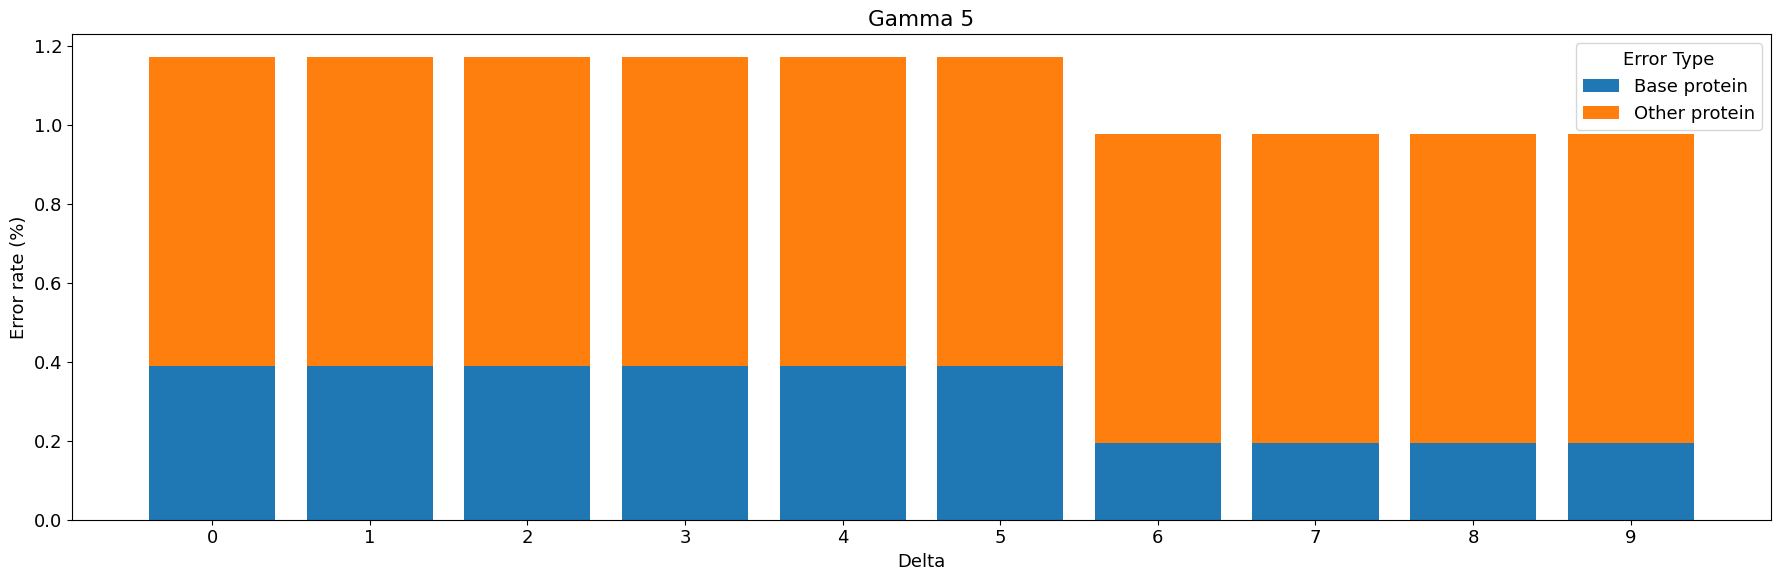

In [165]:
import pandas as pd
import read_msalign

def getparameterPercentage(foldername):
    verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", delimiter="\t")
    dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/delta+5/"
    result1 = pd.read_csv(dir + str(foldername) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/FirstPrSM_toppic_prsm_single.tsv", delimiter="\t")
    result2 = pd.read_csv(dir + str(foldername) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/SecondPrSM_ms2_toppic_prsm_single.tsv", delimiter="\t", skiprows=29)

    result1 = result1[~result1["Protein accession"].str.contains("DECOY")]

    spec_list = read_msalign.read_spec_file(dir + str(foldername) + "/20231215_ecoli_400ng_daniel_1_MSDeplex/FirstPrSM_ms2.msalign")

    switchlist = result1[result1["Data file name"].str.contains("B_ms2.msalign")]["Scan(s)"].tolist()

    spec_dict = {}
    for spec in spec_list:
        spec_dict[str(spec.header.spec_scan)] = spec

    result1 = result1[result1["Scan(s)"].isin(switchlist)]
    result2 = result2[~result2["Scan(s)"].isin(switchlist)]

    result = pd.concat([result1, result2]).sort_values("Scan(s)").reset_index(drop=True)
    
    for index, row in result.iterrows():
        result.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
        result.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)


    verifiedResult = pd.merge(result,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_First"))

    joined = pd.merge(verifiedResult,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Second"))

    joined["Verified_ProteinFirst"] = (joined["Protein accession"] == joined["Protein accession_First"])
    joined["Verified_ProteinSecond"] = (joined["Protein accession"] == joined["Protein accession_Second"])

    # mask = joined["Scan(s)"].isin(switchlist)  # Define the mask once
    # joined.loc[mask, "Verified_ProteinCorrect"] = (
    #     joined.loc[mask, "Protein accession"] == joined.loc[mask, "Protein accession_Other"]
    # )
    # joined.loc[mask, "Verified_ProteinOther"] = (
    #     joined.loc[mask, "Protein accession"] == joined.loc[mask, "Protein accession_True"]
    # )

    # print(joined[(joined["#unexpected modifications_Other"] == 1)])
    
    a1 = joined[(joined["Verified_ProteinFirst"] == True)].shape[0]
    f1 = joined[(joined["Verified_ProteinSecond"] == True)].shape[0]
    o1 = joined.shape[0] - a1 - f1
    return a1, o1



f, o = [[] for _ in range(2)]

for gamma in range(0, 10, 1):
    falsenum, othernum = getparameterPercentage(str(gamma) + "+5")
    print(falsenum, othernum)
    f.append(falsenum)
    o.append(othernum)


fp = [x / 512 * 100 for x in f]
op = [x / 512 * 100 for x in o]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data into a DataFrame for easier plotting
data = {
    'Category': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    'List1': fp,
    'List2': op
}
df = pd.DataFrame(data)

# Create the figure and subplots
fig, axes = plt.subplots(1, 1, figsize=(18, 6), sharey=True)

# Data for each subplot
subplots_data = [
    ('List1', 'List2'),
]

# Plot each subplot
for i, (col1, col2) in enumerate(subplots_data):
    ax = axes

    # Prepare data for stacked bar plot
    category = df['Category']
    base = df[col1]
    stack = df[col2]

    # Create stacked bar plot
    ax.bar(category, base, label='Base protein')
    ax.bar(category, stack, bottom=base, label='Other protein')

    # Set titles and labels
    ax.set_title(f'Gamma {i+5}')
    ax.set_xlabel("Delta")
    ax.set_ylabel('Error rate (%)' if i == 0 else '')

    # Add legend
    ax.legend(title='Error Type')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import read_msalign
import util

def getparameterPercentage(foldername):
    verifier = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/20231215_ecoli_400ng_daniel_1_ms2_toppic_prsm_single.tsv", sep="\t", skiprows=28)
    dir = "/home/daniel/Desktop/datafiles/RealData/ecoli/DDA/20231215_ecoli_400ng/delta+gamma/"
    result1 = util.read_tsv(dir + str(foldername) + "/20231215_ecoli_400ng_daniel_1_TopMPI/Primary_ms2_toppic_prsm_single.tsv")
    # result2 = util.read_tsv(dir + str(foldername) + "/20231215_ecoli_400ng_daniel_1_TopMPI/Secondary_ms2_toppic_prsm_single.tsv")

    spec_list = read_msalign.read_spec_file(dir + str(foldername) + "/20231215_ecoli_400ng_daniel_1_TopMPI/Primary_ms2.msalign")

    switchlist = result1[result1["Data file name"].str.contains("Second_ms2.msalign")]["Scan(s)"].tolist()

    spec_dict = {}
    for spec in spec_list:
        spec_dict[str(spec.header.spec_scan)] = spec

    result1A = result1[~result1["Scan(s)"].isin(switchlist)]
    result2A = result2[result2["Scan(s)"].isin(switchlist)]

    result1B = result1[result1["Scan(s)"].isin(switchlist)]
    result2B = result2[~result2["Scan(s)"].isin(switchlist)]

    resultA = pd.concat([result1A, result2A]).sort_values("Scan(s)").reset_index(drop=True)
    resultB = pd.concat([result1B, result2B]).sort_values("Scan(s)").reset_index(drop=True)
    
    for index, row in resultA.iterrows():
        resultA.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
        resultA.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)

    for index, row in resultB.iterrows():
        resultB.loc[index, "Scan_real"] = int(row["Scan(s)"]) % 100000
        resultB.loc[index, "Scan(other)"] = int(spec_dict[str(row["Scan(s)"])].header.title)

    verifiedResultA = pd.merge(resultA,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_First"))

    joinedA = pd.merge(verifiedResultA,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Second"))

    joinedA["Verified_ProteinFirst"] = (joinedA["Protein accession"] == joinedA["Protein accession_First"])
    joinedA["Verified_ProteinSecond"] = (joinedA["Protein accession"] == joinedA["Protein accession_Second"])

    verifiedResultB = pd.merge(resultB,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan_real', right_on="Scan(s)", how='left', suffixes=("", "_First"))

    joinedB = pd.merge(verifiedResultB,verifier[['Scan(s)','Proteoform', "Protein accession", "Proteoform mass", "#matched peaks", "#unexpected modifications", "E-value", "#peaks"]], left_on='Scan(other)', right_on="Scan(s)", how='left', suffixes=("", "_Second"))

    joinedB["Verified_ProteinFirst"] = (joinedB["Protein accession"] == joinedB["Protein accession_First"])
    joinedB["Verified_ProteinSecond"] = (joinedB["Protein accession"] == joinedB["Protein accession_Second"])
    
    a1 = joinedA[(joinedA["Verified_ProteinFirst"] == True)].shape[0]
    f1 = joinedA[(joinedA["Verified_ProteinSecond"] == True)].shape[0]
    o1 = joinedA.shape[0] - a1 - f1

    a2 = joinedB[(joinedB["Verified_ProteinSecond"] == True)].shape[0]
    f2 = joinedB[(joinedB["Verified_ProteinFirst"] == True)].shape[0]
    o2 = joinedB.shape[0] - a2 - f2
    return f1+f2, o1+o2




for delta in [15, 30, 50, 100]:
    for gamma in range(4, 9, 1):
        falsenum, othernum = getparameterPercentage(str(delta) + "+" + str(gamma))
        print(delta, gamma, falsenum, othernum)

15 4 2 8
15 5 2 8
15 6 1 8
15 7 1 8
15 8 2 9
30 4 2 8
30 5 2 8
30 6 1 8
30 7 1 8
30 8 2 9
50 4 2 8
50 5 2 8
50 6 1 8
50 7 1 8
50 8 2 9
100 4 2 8
100 5 2 8
100 6 1 8
100 7 1 8
100 8 2 9


In [3]:
import util 
import pandas as pd

for gamma in range(4, 9):
    dflist = []
    for idx, fraction in enumerate(range(1, 7)):
        df = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/SW480Noise/F" + str(fraction) + "/480_F" + str(fraction) + "_01_TopMPI/FirstPrSM_full" + str(gamma) + ".tsv")
        df["Spectrum ID"] += idx * 10000000
        df["Feature ID"] += idx * 10000000
        dflist.append(df)
    fullprsm = pd.concat(dflist, ignore_index=True)
    totalproteoform = util.getProteoforms(fullprsm)

    fullprsm["Spectrum-level Q-value"] = util.calculate_q_values(fullprsm)
    fullprsm = fullprsm[~fullprsm['Protein accession'].str.contains('DECOY')].reset_index(drop=True)
    combined_prsm_output = fullprsm[fullprsm["Spectrum-level Q-value"] < 0.01]
    combined_prsm_output.to_csv("/home/daniel/Desktop/datafiles/RealData/SW480Noise/TotalPrSMs" + str(gamma) + ".tsv", sep="\t", index=False)

    totalproteoform["Proteoform-level Q-value"] = util.calculate_q_values(totalproteoform)
    totalproteoform = totalproteoform[~totalproteoform['Protein accession'].str.contains('DECOY')].reset_index(drop=True)
    combined_proteoform_output = totalproteoform[totalproteoform["Proteoform-level Q-value"] < 0.01]
    combined_proteoform_output.to_csv("/home/daniel/Desktop/datafiles/RealData/SW480Noise/TotalProteoforms" + str(gamma) + ".tsv", sep="\t", index=False)
    

In [ ]:
import util
import re
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd

prsm = util.read_tsv("Figures/fig5-6Venndiagram/Yeast_1_TotalPrSM.tsv")

primary_prsm = prsm[~prsm['Data file name'].str.contains('SecondPrSM_ms2.msalign')].reset_index(drop=True)
secondary_prsm = prsm[prsm['Data file name'].str.contains('SecondPrSM_ms2.msalign')].reset_index(drop=True)

primary = primary_prsm[primary_prsm["#unexpected modifications"] == 1].reset_index(drop=True)
secondary = secondary_prsm[secondary_prsm["#unexpected modifications"] == 1].reset_index(drop=True)

print(primary.shape[0], primary_prsm.shape[0])
print(secondary.shape[0], secondary_prsm.shape[0])

def extract_number_before_colon(value):
    match = re.search(r"([-+]?\d*\.\d+|\d+):", value)
    return round(float(match.group(1))) if match else None

primary['mass shift'] = primary['unexpected modifications'].apply(extract_number_before_colon)
secondary['mass shift'] = secondary['unexpected modifications'].apply(extract_number_before_colon)

primarycount = primary["mass shift"].value_counts().tolist()
secondarycount = secondary["mass shift"].value_counts().tolist()

print(primary["mass shift"].value_counts(),  [count / 813 * 100 for count in primarycount])
print(secondary["mass shift"].value_counts(), [count / 262 * 100 for count in secondarycount])

changedprimary = primary[(primary['mass shift'] < 100) & (primary['mass shift'] > -50)].reset_index(drop=True)
changedsecondary = secondary[(secondary['mass shift'] < 100) & (secondary['mass shift'] > -50)].reset_index(drop=True)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # No limit on column width

with open("output.txt", "w") as f:
    # Redirect standard output to the file
    sys.stdout = f

    print(changedprimary.shape[0], changedsecondary.shape[0])

    primarycount = changedprimary["mass shift"].value_counts().tolist()
    secondarycount = changedsecondary["mass shift"].value_counts().tolist()

    print(changedprimary["mass shift"].value_counts(),  [count / 484 * 100 for count in primarycount])
    print(changedsecondary["mass shift"].value_counts(), [count / 163 * 100 for count in secondarycount])

print("")

# exit(0)

# bins = np.arange(min(primary["mass shift"].min(), secondary["mass shift"].min()),  max(primary["mass shift"].max(), secondary["mass shift"].max()), 1)

# plt.subplots(figsize=(12, 8))

# plt.hist(primary['mass shift'], bins = bins, label="Primary")
# plt.hist(secondary['mass shift'], bins = bins, label="Secondary", color="orange")
# plt.legend()

# plt.savefig("fig.svg", format='svg', dpi=500)


# print("")
# prsm = util.read_tsv("Figures/fig5-6Venndiagram/Yeast_3_TotalProteoform.tsv")

# primary_prsm = prsm[~prsm['Data file name'].str.contains('Secondary_ms2.msalign')].reset_index(drop=True) 
# secondary_prsm = prsm[prsm['Data file name'].str.contains('Secondary_ms2.msalign')].reset_index(drop=True)

# replicate3_primary = (primary_prsm[primary_prsm["#unexpected modifications"] == 1].shape[0] / primary_prsm.shape[0]) * 100
# replicate3_secondary = (secondary_prsm[secondary_prsm["#unexpected modifications"] == 1].shape[0] / secondary_prsm.shape[0]) * 100

17.6 

813 4622
262 1100
mass shift
 1      93
-2      72
 305    46
 16     17
 14     15
        ..
-139     1
-5       1
-368     1
 384     1
-421     1
Name: count, Length: 306, dtype: int64 [11.439114391143912, 8.856088560885608, 5.658056580565805, 2.091020910209102, 1.8450184501845017, 1.4760147601476015, 1.4760147601476015, 1.2300123001230012, 1.107011070110701, 0.984009840098401, 0.984009840098401, 0.8610086100861009, 0.8610086100861009, 0.8610086100861009, 0.7380073800738007, 0.7380073800738007, 0.6150061500615006, 0.6150061500615006, 0.6150061500615006, 0.6150061500615006, 0.6150061500615006, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.4920049200492005, 0.36900369003690037, 0.36900369003690037, 0.369003690036

954
83
23


(array([23., 20.,  8.,  7., 13.,  2.,  1.,  2.,  1.,  3.,  0.,  1.]),
 array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500., 5000., 5500., 6000.]),
 <BarContainer object of 12 artists>)

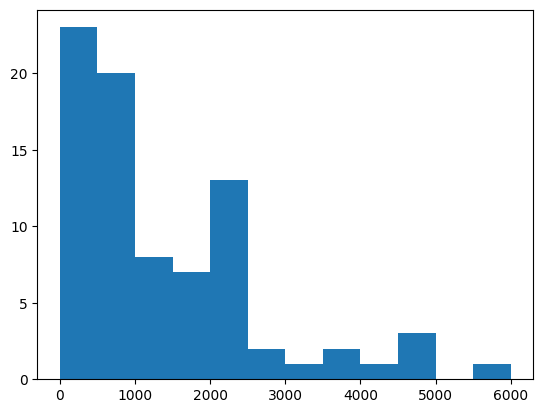

In [36]:
import util
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prsm = util.read_tsv("Figures/fig5-6Venndiagram/Yeast_1_TotalPrSM.tsv")

primary_prsm = prsm[~prsm['Data file name'].str.contains('SecondPrSM_ms2.msalign')].reset_index(drop=True)
secondary_prsm = prsm[prsm['Data file name'].str.contains('SecondPrSM_ms2.msalign')].reset_index(drop=True)

output = pd.merge(left=primary_prsm, right=secondary_prsm, on="Scan(s)", how="inner")

print(output.shape[0])

common = output[output["Protein accession_x"] == output['Protein accession_y']].reset_index(drop=True)
interest = output[output["Protein accession_x"] != output['Protein accession_y']].reset_index(drop=True)

interest["avglogEvalue"] = (np.log(interest["E-value_x"]) + np.log(interest["E-value_y"])) / 2
interest = interest.sort_values(by="avglogEvalue")


# interest.to_csv("interest.tsv", sep="\t", index=False)

common["diff"] = abs(common["Precursor mass_x"] - common["Precursor mass_y"])



print(common.shape[0])

print(common[common["diff"] < 500].shape[0])

bins = range(0, 6500, 500)

plt.hist(common["diff"], bins=bins)

# plt.close()

# plt.hist(common[common["diff"] < 500]["diff"])

# plt.title("Difference < 500 Da")


# leftscans = common["Scan(s)_x"].tolist()
# rightscans = common["Scan(s)_y"].tolist()

# final = interest[(~interest["Scan(s)_x"].isin(leftscans)) & (~interest["Scan(s)_y"].isin(rightscans))]
# print(final.shape[0])


In [47]:
import read_msalign
import util

spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_ms2.msalign")

spec_dict = {}
for spec in spectra:
    spec_dict[str(spec.header.spec_scan)] = spec

multiplexedspectra = [int(spec.header.spec_scan) for spec in spectra if (not (spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0))) and float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]) > 0.2]

print(len(multiplexedspectra))

filtered = [scan for scan in multiplexedspectra if abs(float(spec_dict[str(scan)].header.pre_mass_list[0]) - float(spec_dict[str(scan)].header.pre_mass_list[1])) < 5]

print(len(filtered))

difflist = {}
for scan in filtered:
    difflist[scan] = abs(float(spec_dict[str(scan)].header.pre_mass_list[0]) - float(spec_dict[str(scan)].header.pre_mass_list[1]))

prsm = util.read_tsv("Figures/fig5-6Venndiagram/Yeast_1_TotalPrSM.tsv")

primary_prsm = prsm[~prsm['Data file name'].str.contains('SecondPrSM_ms2.msalign')].reset_index(drop=True)
secondary_prsm = prsm[prsm['Data file name'].str.contains('SecondPrSM_ms2.msalign')].reset_index(drop=True)

print(secondary_prsm[secondary_prsm["Scan(s)"].isin(list(difflist.keys()))].shape[0])

def min_key_value(d):
    return min(d.items(), key=lambda x: x[1])

print(min_key_value(difflist))

3721
790
275
(9647, 0.00559999999950378)


In [53]:
import read_msalign

spectraold = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_MSDeplex/Second_ms2.msalign")
spectranew = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/Yeast_1_TopMPI/Second_ms2.msalign")

print(len(spectraold), len(spectranew))

5818 5056


4589 2895
3721
622
0.7058823529411765


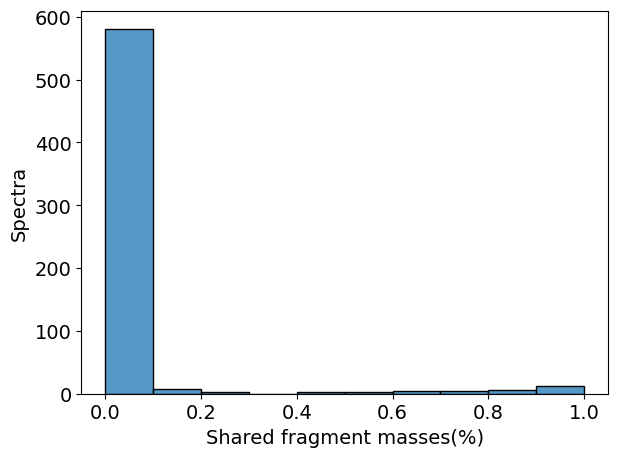

In [6]:
import util
import read_msalign
import numpy as np
import seaborn as sns

r1 = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/First_ms2_toppic_prsm_single.tsv")
r1["Spectrum-level Q-value"] = util.calculate_q_values(r1)
r1 = r1[r1["Spectrum-level Q-value"] < 0.01]
r2 = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/Second_ms2_toppic_prsm_single.tsv")
r2["Spectrum-level Q-value"] = util.calculate_q_values(r2)
r2 = r2[r2["Spectrum-level Q-value"] < 0.01]

print(r1.shape[0], r2.shape[0])

pairs = r1.merge(r2, on="Scan(s)", how="inner")

pairs = pairs[~(pairs["Protein accession_x"] == pairs["Protein accession_y"])]

scans = pairs["Scan(s)"].tolist()

spectra = read_msalign.read_spec_file("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/First_ms2.msalign")

spec_dict = {}
for spec in spectra:
    spec_dict[int(spec.header.spec_scan)] = spec

multiplexedspectra = [int(spec.header.spec_scan) for spec in spectra if (not (spec.header.pre_inte_list[0] == '' or float(spec.header.pre_inte_list[0]) == float(0) or len(spec.header.pre_inte_list) == 1 or float(spec.header.pre_inte_list[1]) == float(0))) and float(spec.header.pre_inte_list[1]) / float(spec.header.pre_inte_list[0]) > 0.2]

print(len(multiplexedspectra))

multiplexedscans = list(set(scans).intersection(set(multiplexedspectra)))
print(len(multiplexedscans))

percentage = []
for scan in multiplexedscans:
    matchedListA, nonMatchedList = util.getMatchedPeaks(pairs[pairs["Scan(s)"] == int(scan)].iloc[0]["Prsm ID_x"], "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/First_html/toppic_prsm_cutoff/data_js/prsms/", spec_dict[scan])
    matchedListB, nonMatchedList = util.getMatchedPeaks(pairs[pairs["Scan(s)"] == int(scan)].iloc[0]["Prsm ID_y"], "/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/Second_html/toppic_prsm_cutoff/data_js/prsms/", spec_dict[scan])
    setA = set(matchedListA)
    setB = set(matchedListB)
    percentage.append(len(setA.intersection(setB)) / min(int(len(setA)), int(len(setB))))

temp = [x for x in percentage if x > 0.7]
print(min(temp))

plt.rcParams.update({'font.size': 14})

bins = np.arange(0.0, 1.1, 0.1)
sns.histplot(percentage, bins=bins)
plt.xlabel('Shared fragment masses(%)')
plt.ylabel('Spectra')
plt.tight_layout()


plt.savefig("beta.svg", format="svg", dpi=800)

1649
283
modrounded
-2      35
 1      30
 16      9
 14      9
-30      5
 80      5
-1       5
 79      5
 97      4
 113     4
 101     4
-3       4
 129     4
 183     3
 199     3
 176     3
 94      3
 59      3
-17      3
 142     3
 31      2
-8       2
 85      2
 98      2
 124     2
 140     2
 114     2
 133     2
 0       2
 86      2
Name: count, dtype: int64


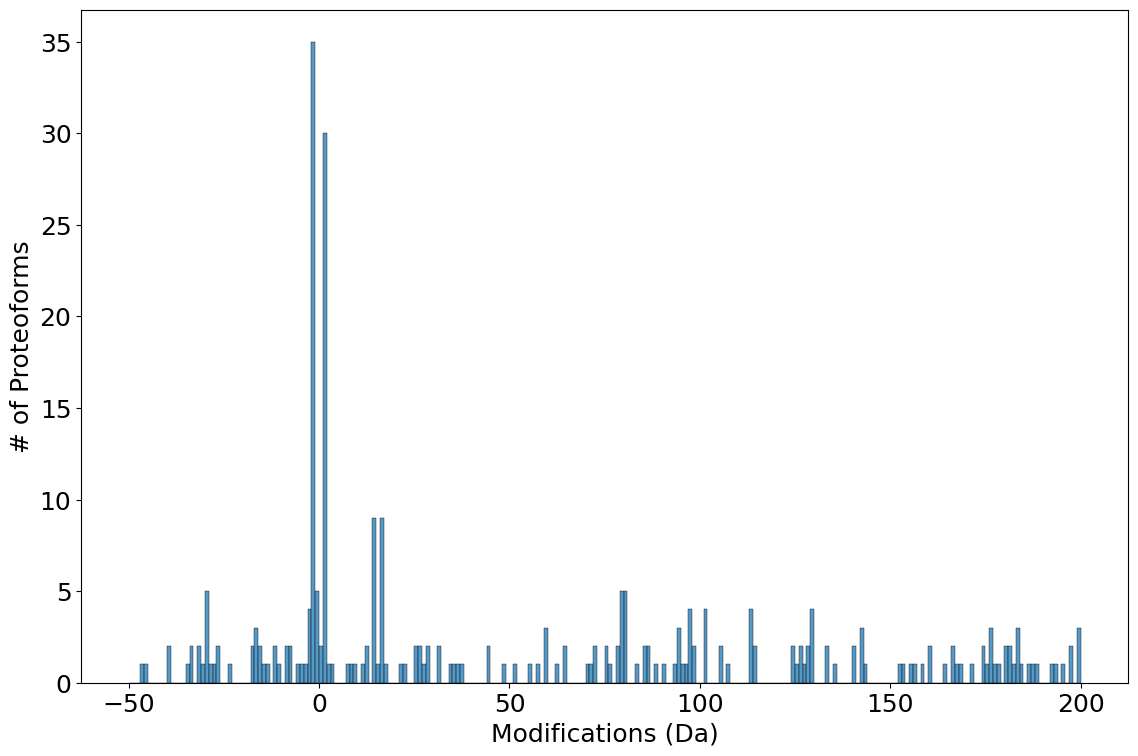

In [7]:
import util
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

primary = util.read_tsv("Figures/modifications/OnlyPrimary.tsv")
print(primary.shape[0])
primary = primary[primary["#unexpected modifications"] == 1]
primary['modvalue'] = primary['unexpected modifications'].str.extract(r'([+-]?\d+\.\d+)').astype(float).fillna(0)
primary['modrounded'] = primary['modvalue'].round().astype(int)
# primarymod = primary[(primary['modrounded'] > 0) & (primary['modrounded'] < 200)]

print(primary.shape[0])

print(primary['modrounded'].value_counts().head(30))

mod_counts = primary['modrounded'].value_counts().sort_index().reset_index()
mod_counts.columns = ["Modification(Da)", "Frequency"]

# Save to TSV
mod_counts.to_csv("primary_mod.tsv", sep="\t", index=False)

# print((primary['modrounded'] == 181).sum())

bins = np.arange(-50, 201, 1)

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(12, 8))
plt.xlabel('Modifications (Da)')
plt.ylabel('# of Proteoforms')
plt.tight_layout()

sns.histplot(primary['modrounded'], bins=bins)

plt.savefig("primary.svg", format="svg", dpi=800)

554
99
modrounded
 1      20
-2       6
 168     2
 80      2
 14      2
 25      2
 129     2
 16      2
 72      2
 5       2
 20      1
 175     1
 124     1
 56      1
 24      1
 62      1
 26      1
 2       1
-32      1
 193     1
Name: count, dtype: int64
0


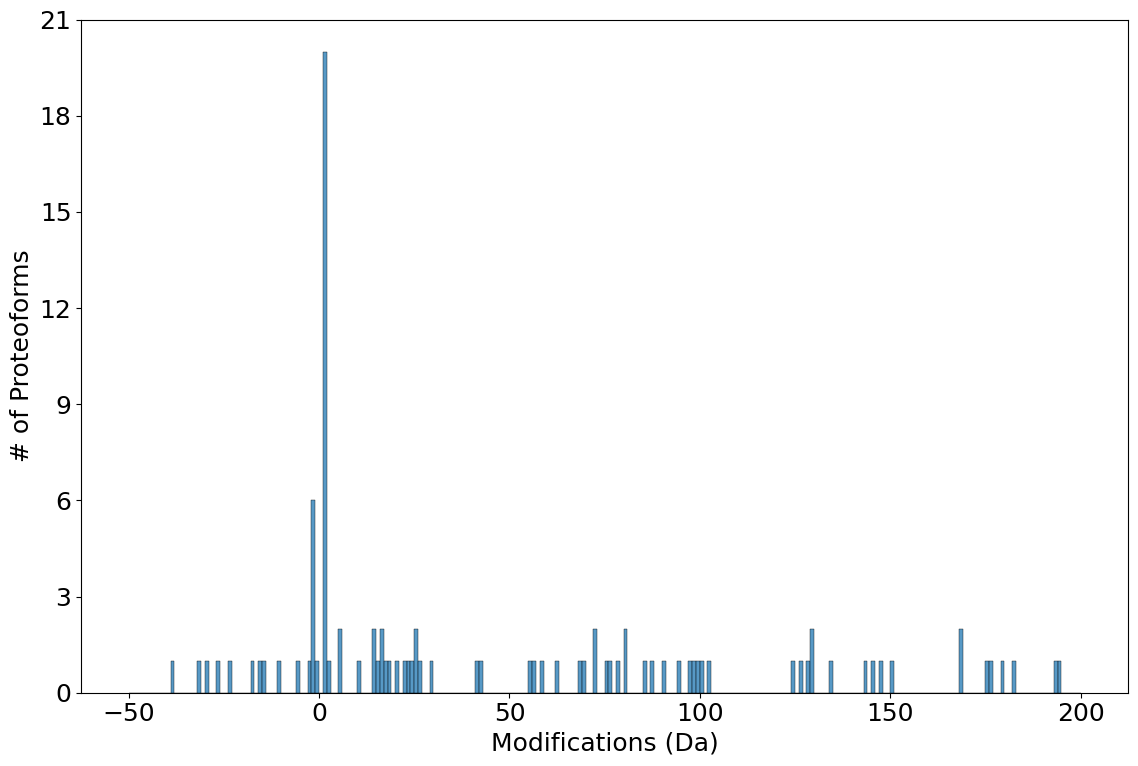

In [2]:
from matplotlib.ticker import MaxNLocator

secondary = util.read_tsv("Figures/modifications/OnlySecondary.tsv")
print(secondary.shape[0])
secondary = secondary[secondary["#unexpected modifications"] == 1]
print(secondary.shape[0])
secondary['modvalue'] = secondary['unexpected modifications'].str.extract(r'([+-]?\d+\.\d+)').astype(float).fillna(0)
secondary['modrounded'] = secondary['modvalue'].round().astype(int)

print(secondary['modrounded'].value_counts().head(20))

mod_counts = secondary['modrounded'].value_counts().sort_index().reset_index()
mod_counts.columns = ["Modification(Da)", "Frequency"]

# Save to TSV
mod_counts.to_csv("secondary_mod.tsv", sep="\t", index=False)

print((secondary['modrounded'] == 183).sum())

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(12, 8))
plt.xlabel('Modifications (Da)')
plt.ylabel('# of Proteoforms')
plt.tight_layout()
sns.histplot(secondary['modrounded'], bins=bins)
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("secondary.svg", format="svg", dpi=800)

360
modrounded
 0      270
 1        5
-299      2
-73       2
 237      2
-71       2
 305      2
-2        2
-99       2
 80       2
-235      2
 212      1
-345      1
 321      1
-90       1
 132      1
-113      1
 245      1
-97       1
-302      1
Name: count, dtype: int64
0
0


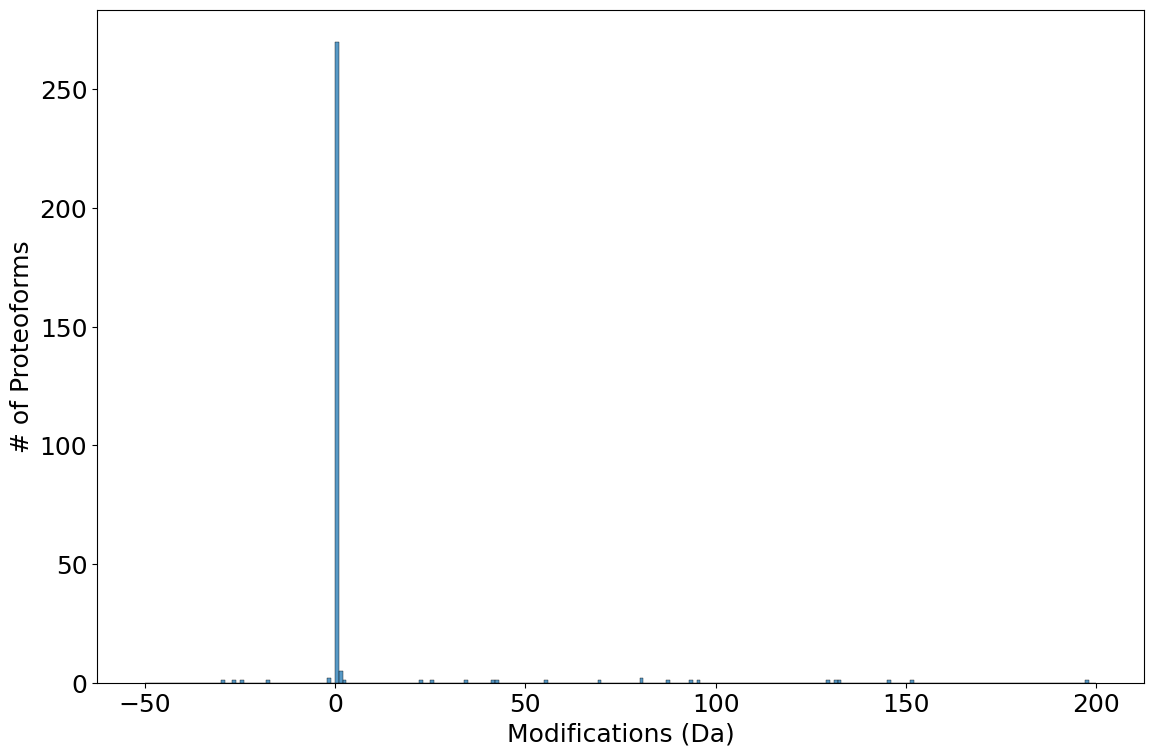

In [3]:
new = util.read_tsv("Figures/fig5-6Venndiagram/TopMPINewProteoforms.tsv")
print(new.shape[0])
# secondary = secondary[secondary["#unexpected modifications"] == 1]
new['modvalue'] = new['unexpected modifications'].str.extract(r'([+-]?\d+\.\d+)').astype(float).fillna(0)
new['modrounded'] = new['modvalue'].round().astype(int)

print(new['modrounded'].value_counts().head(20))
mod_counts = new['modrounded'].value_counts().sort_index().reset_index()
mod_counts.columns = ["Modification(Da)", "Frequency"]

# Save to TSV
mod_counts.to_csv("newproteoform_mod.tsv", sep="\t", index=False)

print((secondary['modrounded'] == 183).sum())

print((new['modrounded'] == 183).sum())
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(12, 8))
plt.xlabel('Modifications (Da)')
plt.ylabel('# of Proteoforms')
plt.tight_layout()
sns.histplot(new['modrounded'], bins=bins)
plt.savefig("new.svg", format="svg", dpi=800)

In [8]:
import pandas as pd

def processMSPathFinder(inputdf, threshold=1.2):
    combined_df = inputdf.copy(deep=True)
    # # Drop duplicates using feature IDs and keeping the one with the lowest E-value
    # keep_values = ['0', '1']

    # # Create mask for rows to preserve
    # mask = combined_df['Ms1Features'].isin(keep_values)

    # # Drop duplicates from the rest, then combine
    # result = pd.concat([
    #     combined_df[mask],
    #     combined_df[~mask].sort_values(by='EValue').drop_duplicates(subset='Ms1Features', keep='first')
    # ], ignore_index=True).reset_index(drop=True)
    
    # Function to find duplicates based on the condition
    def drop_custom_duplicates(group):
        # Sort the group by E-value to prioritize rows with the lowest value in E-value
        group = group.sort_values(by='EValue')
        
        # Initialize a list to store indices of rows to keep
        keep_indices = []

        # Iterate through the sorted group
        for index, row in group.iterrows():
            # Check if this row is a duplicate of any previously kept row
            is_duplicate = False
            for keep_index in keep_indices:
                if abs(row['Mass'] - group.loc[keep_index, 'Mass']) < threshold:
                    is_duplicate = True
                    break
            # If not a duplicate, add it to the list of indices to keep
            if not is_duplicate:
                keep_indices.append(index)
        
        # Return only the rows to keep
        return group.loc[keep_indices]

    # Apply the function to groups defined by 'ColumnA'
    result_df = combined_df.groupby('ProteinName', group_keys=False).apply(drop_custom_duplicates)

    result_df = result_df.sort_values(by="Scan").reset_index(drop=True)

    return result_df

prsms = pd.read_csv("/home/daniel/Desktop/datafiles/RealData/yeast/MSPathFinder/yeast/Yeast_1_IcTda.tsv", sep="\t")

prsms = prsms[prsms["QValue"] < 0.01].reset_index(drop=True)

proteoforms = processMSPathFinder(prsms)

print(proteoforms.shape[0])

proteoforms.to_csv("./PathFinderProteoform.tsv", sep="\t", index=False)

1194


/tmp/ipykernel_338366/40838879.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = combined_df.groupby('ProteinName', group_keys=False).apply(drop_custom_duplicates)


/tmp/ipykernel_6952/4281352495.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_numeric = df_numeric.applymap(safe_convert)


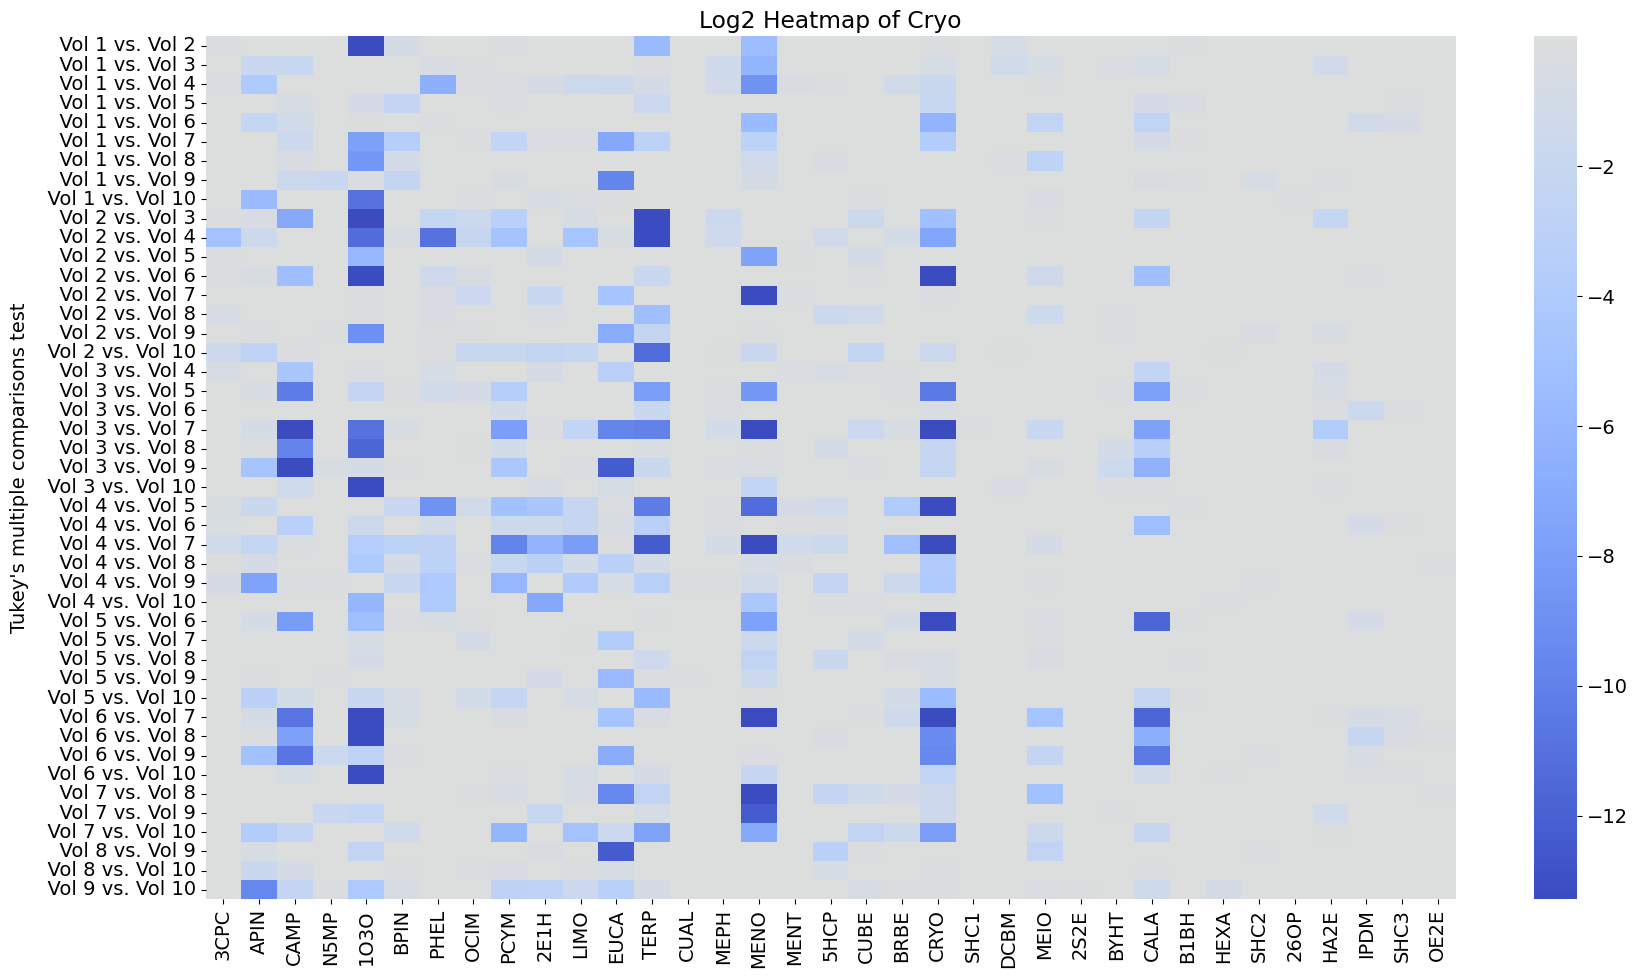

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and extract numeric portion of the DataFrame
Cyro = pd.read_csv("/home/daniel/Desktop/Cryo.csv", sep="\t")

df_numeric = Cyro.copy()
df_numeric.set_index(df_numeric.columns[0], inplace=True)

# Convert '>0.9999' and similar to float values
def safe_convert(val):
    if isinstance(val, str):
        val = val.strip()
        if val.startswith('>'):
            return float(val[1:])
        elif val.startswith('<'):
            return float(val[1:])
        else:
            try:
                return float(val)
            except ValueError:
                return np.nan
    return val

df_numeric = df_numeric.applymap(safe_convert)

# Replace zeros or very small numbers with a small constant to avoid log(0)
df_numeric = df_numeric.replace(0, 1e-10)
df_log2 = np.log2(df_numeric)

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df_log2, cmap='coolwarm', center=0, xticklabels=True, yticklabels=True)
plt.title("Log2 Heatmap of Cryo")
plt.tight_layout()
plt.savefig("Cryo.svg", format="svg", dpi=800)
plt.show()


/tmp/ipykernel_6952/2104432889.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_numeric = df_numeric.applymap(safe_convert)


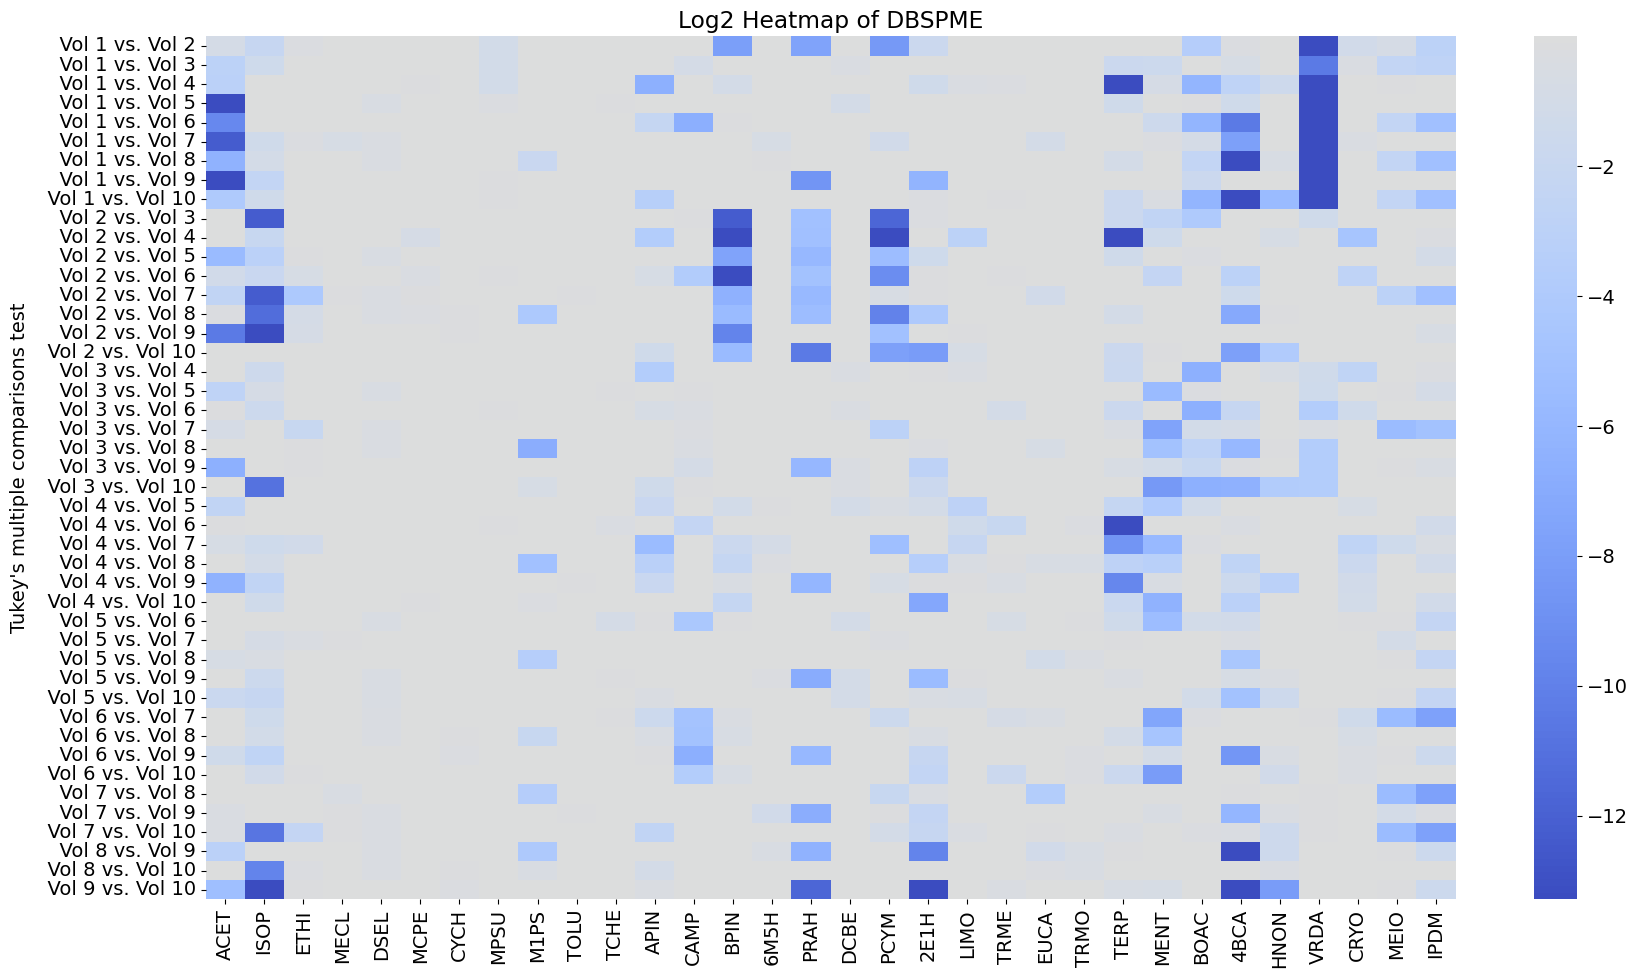

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and extract numeric portion of the DataFrame
DBSPME = pd.read_csv("/home/daniel/Desktop/DBSPME.csv", sep="\t")

df_numeric = DBSPME.copy()
df_numeric.set_index(df_numeric.columns[0], inplace=True)

# Convert '>0.9999' and similar to float values
def safe_convert(val):
    if isinstance(val, str):
        val = val.strip()
        if val.startswith('>'):
            return float(val[1:])
        elif val.startswith('<'):
            return float(val[1:])
        else:
            try:
                return float(val)
            except ValueError:
                return np.nan
    return val

df_numeric = df_numeric.applymap(safe_convert)

# Replace zeros or very small numbers with a small constant to avoid log(0)
df_numeric = df_numeric.replace(0, 1e-10)
df_log2 = np.log2(df_numeric)

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(df_log2, cmap='coolwarm', center=0, xticklabels=True, yticklabels=True)
plt.title("Log2 Heatmap of DBSPME")
plt.tight_layout()
plt.savefig("DBSPME.svg", format="svg", dpi=800)
plt.show()


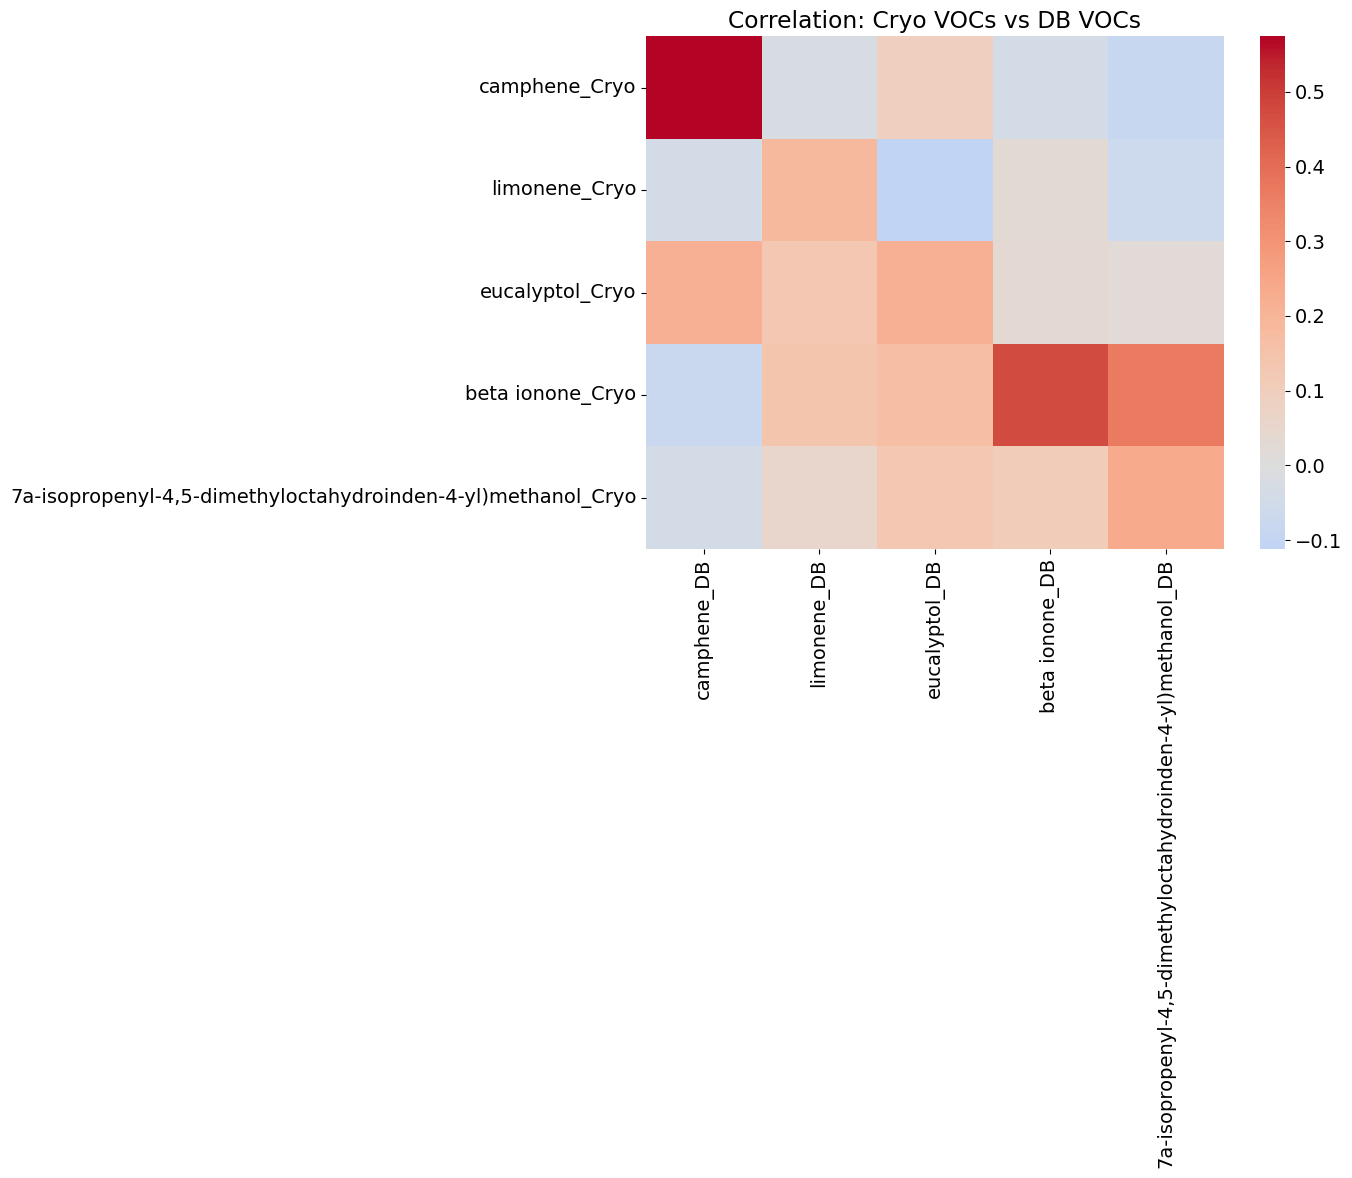

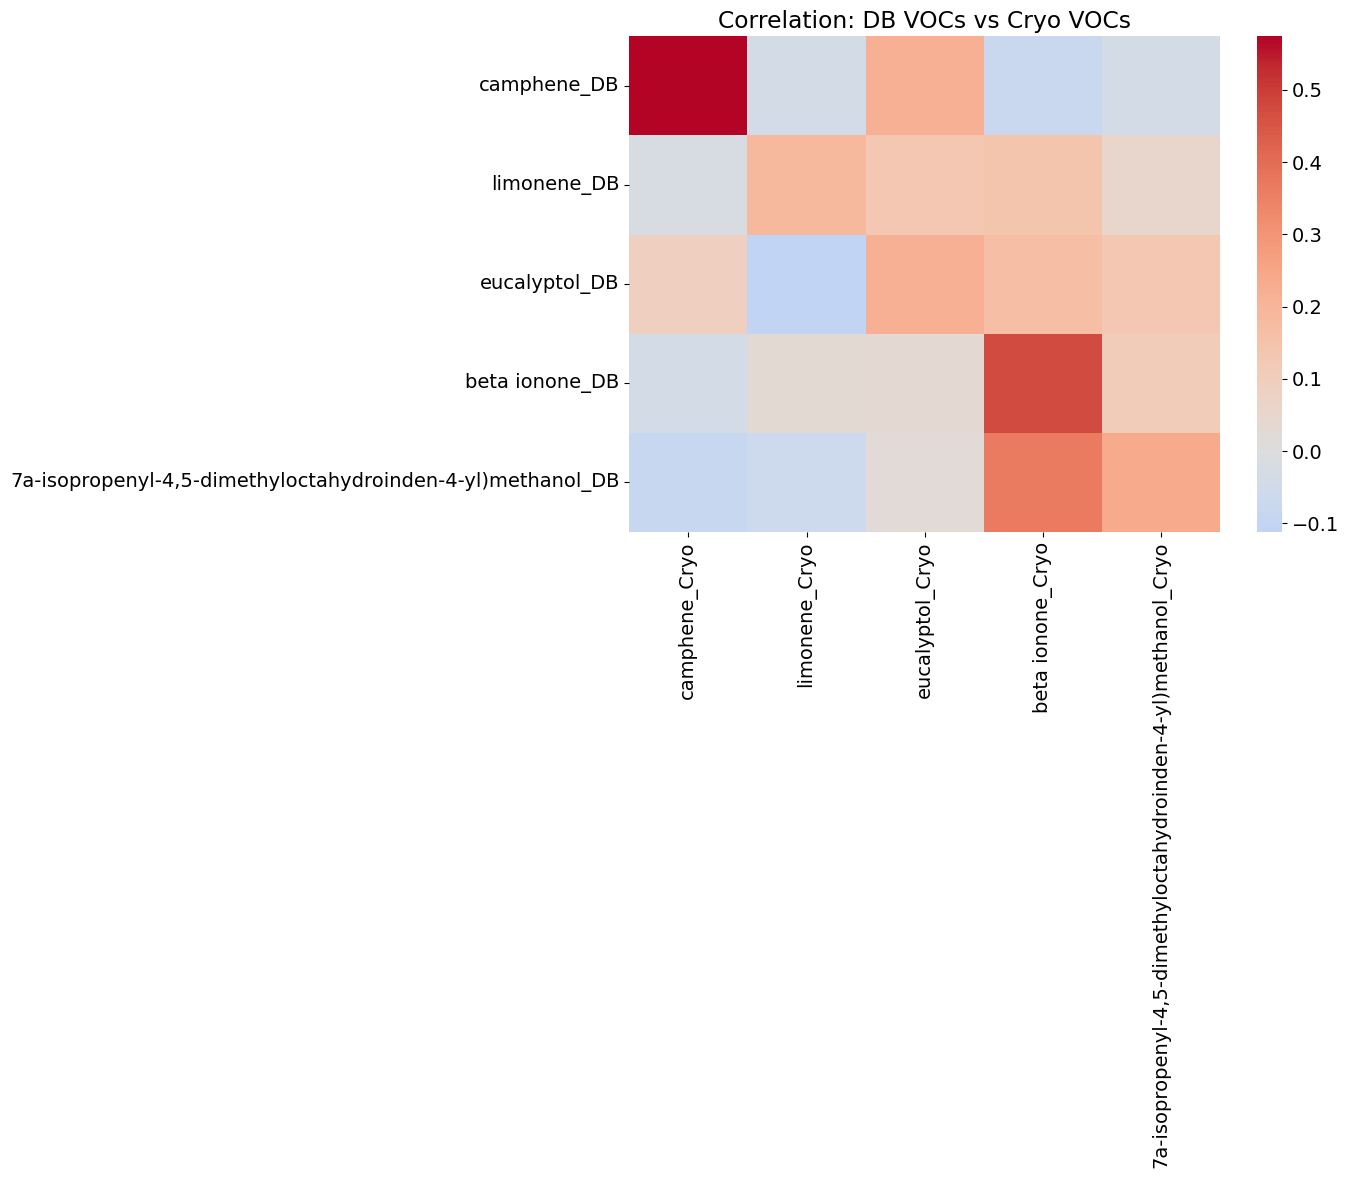

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/home/daniel/Desktop/DB and Cryo Commonalities for R matrix.xlsx"
xls = pd.ExcelFile(file_path)
cryo_df = xls.parse('Cryo')
db_df = xls.parse('DBSPME')

# Clean columns
cryo_df.columns = cryo_df.columns.str.strip()
db_df.columns = db_df.columns.str.strip()

# Clean VOC names
cryo_df['VOC_clean'] = cryo_df['VOC ID'].str.lower().str.strip()
db_df['VOC_clean'] = db_df['VOC'].str.lower().str.strip()

# Merge on VOC name
merged_df = pd.merge(cryo_df, db_df, on='VOC_clean', suffixes=('_cryo', '_db'))

# Extract patient columns
cryo_cols = [col for col in merged_df.columns if col.startswith('MCDC') and '_cryo' in col]
db_cols = [col for col in merged_df.columns if col.startswith('MCDC') and '_db' in col]

# Transpose and align
cryo_data = merged_df[cryo_cols].transpose()
db_data = merged_df[db_cols].transpose()
cryo_data.columns = merged_df['VOC_clean']
db_data.columns = merged_df['VOC_clean']

# Align samples
cryo_data.index = [idx.replace('_cryo', '') for idx in cryo_cols]
db_data.index = [idx.replace('_db', '') for idx in db_cols]
cryo_data = cryo_data.sort_index()
db_data = db_data.sort_index()

# Label columns
cryo_data.columns = [col + '_Cryo' for col in cryo_data.columns]
db_data.columns = [col + '_DB' for col in db_data.columns]

# Combine for correlation
combined_df = pd.concat([cryo_data, db_data], axis=1)
full_corr_matrix = combined_df.corr()

# Extract meaningful blocks
cryo_cols = [col for col in full_corr_matrix.columns if col.endswith('_Cryo')]
db_cols = [col for col in full_corr_matrix.columns if col.endswith('_DB')]
upper_right = full_corr_matrix.loc[cryo_cols, db_cols]
lower_left = full_corr_matrix.loc[db_cols, cryo_cols]

# Plot Cryo vs DB
plt.figure(figsize=(14, 12))
sns.heatmap(upper_right, cmap='coolwarm', center=0)
plt.title('Correlation: Cryo VOCs vs DB VOCs')
plt.tight_layout()
plt.show()

# Plot DB vs Cryo
plt.figure(figsize=(14, 12))
sns.heatmap(lower_left, cmap='coolwarm', center=0)
plt.title('Correlation: DB VOCs vs Cryo VOCs')
plt.tight_layout()
plt.show()


In [7]:
import util

primary = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/Primary_ms2_toppic_prsm_single.tsv")

secondary = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/Secondary_ms2_toppic_prsm_single.tsv")

print(primary[primary["#unexpected modifications"] == 1].shape[0] / primary.shape[0], secondary[secondary["#unexpected modifications"] == 1].shape[0] / secondary.shape[0])

0.16850053937432577 0.24199743918053776


/tmp/ipykernel_6952/1509934766.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = prsms.groupby('Score Bin')
/tmp/ipykernel_6952/1509934766.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(lambda g: (g['#unexpected modifications'] == 1).mean() * 100)


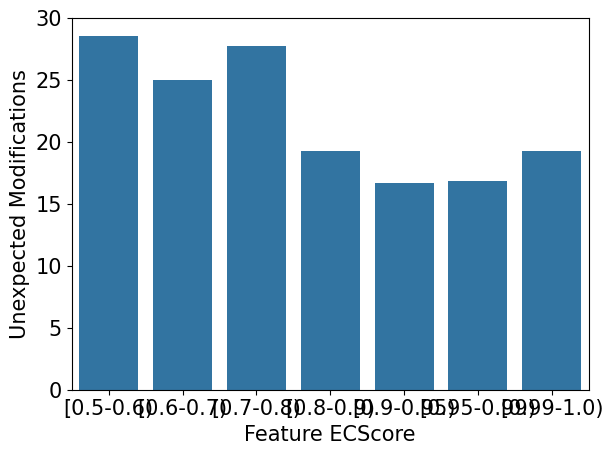

In [87]:
import util
import seaborn as sns
import pandas as pd
import numpy as np

prsms = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/TotalProteoform.tsv")


bins = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0]
labels = ['[0.5-0.6)', '[0.6-0.7)', '[0.7-0.8)', '[0.8-0.9)', '[0.9-0.95)', '[0.95-0.99)', '[0.99-1.0)']

# Create a new column with bin labels
prsms['Score Bin'] = pd.cut(prsms['Feature score'], bins=bins, labels=labels, right=False)

# Group by the bins
grouped = prsms.groupby('Score Bin')

# Calculate the percentage where "#unexpected modifications" == 1 in each group
result = grouped.apply(lambda g: (g['#unexpected modifications'] == 1).mean() * 100)
# result = grouped.apply(lambda g: ((g['#unexpected modifications'] == 0).count()))

# Convert to a clean DataFrame
result_df = result.reset_index(name='% unexpected modifications == 1')

import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 15})
# Create the bar plot
sns.barplot(data=result_df, x='Score Bin', y='% unexpected modifications == 1')

# Add labels and title
plt.xlabel('Feature ECScore')
plt.ylabel('Unexpected Modifications')
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_6952/789207817.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = prsms.groupby(['Score Bin', '#unexpected modifications']).size().unstack(fill_value=0)


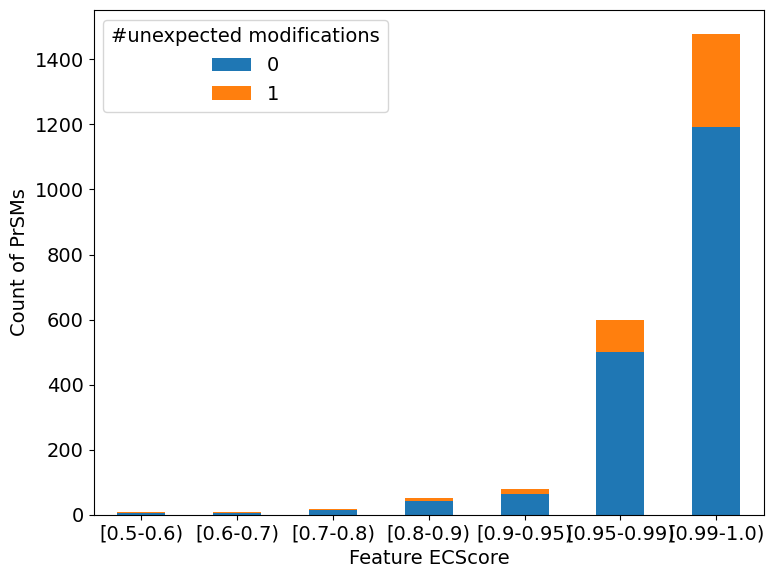

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data
prsms = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/TotalProteoform.tsv")

# Defining bins and labels
bins = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0]
labels = ['[0.5-0.6)', '[0.6-0.7)', '[0.7-0.8)', '[0.8-0.9)', '[0.9-0.95)', '[0.95-0.99)', '[0.99-1.0)']

# Create a new column with bin labels
prsms['Score Bin'] = pd.cut(prsms['Feature score'], bins=bins, labels=labels, right=False)

# Grouping by Score Bin and counting unexpected modifications (1 and 0)
grouped = prsms.groupby(['Score Bin', '#unexpected modifications']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
plt.rcParams.update({'font.size': 14})

grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding labels and title
plt.xlabel('Feature ECScore')
plt.ylabel('Count of PrSMs')
plt.xticks(rotation=0)  # Set x-axis labels to horizontal
plt.tight_layout()
plt.show()

In [125]:
prsms = util.read_tsv("/home/daniel/Desktop/datafiles/RealData/yeast/yeast/Yeast_1_TopMPI/TotalPrSM.tsv")

scan_counts = prsms["Scan(s)"].value_counts()
scans_with_two = scan_counts[scan_counts == 2].index
chimeric = prsms[prsms["Scan(s)"].isin(scans_with_two)]

chimeric = chimeric.copy()
chimeric["log10_E-value"] = np.log10(chimeric["E-value"])

# Step 3: Group by "Scan(s)" and average the log10 values
grouped = chimeric.groupby("Scan(s)")["log10_E-value"].mean()

# Step 4: Get top 5 Scan(s) with lowest average log10(E-value)
top_5 = grouped.nsmallest(20).reset_index()

print(top_5)

    Scan(s)  log10_E-value
0      2450     -19.730092
1      2451     -19.320259
2      2911     -18.929481
3      2449     -18.447026
4      3381     -18.227836
5      4061     -17.761686
6      5246     -16.969991
7      4836     -16.845472
8      3385     -16.734108
9      2906     -16.487085
10     2454     -16.421889
11     2604     -16.193542
12     2143     -15.644858
13     4835     -15.642698
14     2899     -15.581990
15     3803     -15.365646
16     3797     -15.193762
17     3801     -15.144176
18     2610     -15.141652
19     1991     -15.024803


In [5]:
import util
import pandas as pd

primary = util.read_tsv("Figures/fig5-6Venndiagram/Yeast_1_Primary_ms2_toppic_proteoform_single.tsv")
secondary = util.read_tsv("Figures/fig5-6Venndiagram/Yeast_1_Secondary_ms2_toppic_proteoform_single.tsv")

merged = pd.concat([primary, secondary]).reset_index(drop=True)

proteoforms = util.getProteoforms(merged)

print(proteoforms.shape[0])

proteoforms.to_csv("temp.tsv", sep="\t", index=False)

2296
